In [1]:
import os
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

INPUT_PARQUET = "/kaggle/input/topgun0/top_gun_opendata_0.parquet"
OUTPUT_DIR    = "/kaggle/working/"
BATCH_SIZE    = 10
NUM_HEATMAPS  = 5

def extract_and_plot(input_path, output_dir, batch_size, num_heatmaps):
    parquet = pq.ParquetFile(input_path)
    first_chunk = True
    plotted = 0

    image_path = os.path.join(output_dir, "Images")
    csv_path   = os.path.join(output_dir, "Output.csv")
    os.makedirs(image_path, exist_ok=True)

    for rg in range(10):
        table = parquet.read_row_group(rg)
        for batch in table.to_batches(max_chunksize=batch_size):
            df = batch.to_pandas()
            df.to_csv(csv_path, mode='a', index=False, header=first_chunk)
            first_chunk = False

            for local_idx in range(len(df)):
                if plotted >= num_heatmaps:
                    break

                arr = np.array(df.iloc[local_idx, 0])
                if arr.size == 125*125:
                    arr = arr.reshape(125, 125)

                if arr.shape == (125, 125):
                    plt.figure()
                    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
                    plt.axis('off')
                    plt.title(f"Row {plotted}")
                    plt.savefig(os.path.join(image_path, f"heatmap_row{plotted}.png"), bbox_inches="tight")
                    plt.close()
                else:
                    print(f"⚠️ Row {plotted} unexpected shape {arr.shape}")
                plotted += 1

            if plotted >= num_heatmaps:
                break
        if plotted >= num_heatmaps:
            break

    print(f"✅ CSV written to {csv_path}")
    print(f"✅ Saved {plotted} heatmaps in {image_path}")

if __name__ == "__main__":
    extract_and_plot(INPUT_PARQUET, OUTPUT_DIR, BATCH_SIZE, NUM_HEATMAPS)


⚠️ Row 0 unexpected shape (8,)
⚠️ Row 1 unexpected shape (8,)
⚠️ Row 2 unexpected shape (8,)
⚠️ Row 3 unexpected shape (8,)
⚠️ Row 4 unexpected shape (8,)
✅ CSV written to /kaggle/working/Output.csv
✅ Saved 5 heatmaps in /kaggle/working/Images


In [2]:
df=pd.read_csv("/kaggle/working/Output.csv")
df.shape

(5, 5)

In [3]:
import os
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

INPUT_DIR    = "/kaggle/input/topgun0/"
OUTPUT_DIR   = "/kaggle/working/"
BATCH_SIZE   = 10
NUM_HEATMAPS = 5

def extract_and_plot(input_path, output_dir, batch_size, num_heatmaps):
    parquet = pq.ParquetFile(input_path)
    first_chunk = True
    plotted = 0

    # Create a subfolder for each Parquet’s CSV + images
    image_path = os.path.join(output_dir, "Images")
    csv_path   = os.path.join(output_dir, "Output.csv")
    os.makedirs(image_path, exist_ok=True)

    for rg in range(parquet.num_row_groups):
        table = parquet.read_row_group(rg)
        for batch in table.to_batches(max_chunksize=batch_size):
            df = batch.to_pandas()

            # Append to CSV, writing header only for the first batch
            df.to_csv(csv_path, mode='a', index=False, header=first_chunk)
            first_chunk = False

            # Generate up to NUM_HEATMAPS from column 0
            for local_idx in range(len(df)):
                if plotted >= num_heatmaps:
                    break

                arr = np.array(df.iloc[local_idx, 0])
                if arr.size == 125 * 125:
                    arr = arr.reshape(125, 125)

                if arr.shape == (125, 125):
                    plt.figure()
                    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
                    plt.axis('off')
                    plt.savefig(
                        os.path.join(image_path, f"heatmap_row{plotted}.png"),
                        bbox_inches="tight"
                    )
                    plt.close()
                else:
                    print(f"⚠️ Row {plotted} has unexpected shape {arr.shape}")

                plotted += 1

            if plotted >= num_heatmaps:
                break
        if plotted >= num_heatmaps:
            break

    print(f"✅ Finished {os.path.basename(input_path)} → {csv_path}")
    print(f"   Heatmaps: {plotted} generated in {image_path}\n")

if __name__ == "__main__":
    # Loop over your 5 specific Parquet files
    for i in range(5):
        file_name = f"top_gun_opendata_{i}.parquet"
        parquet_file = os.path.join(INPUT_DIR, file_name)

        # Each file gets its own subfolder in /kaggle/working/
        # named after the Parquet file (without .parquet)
        base_name = os.path.splitext(file_name)[0]
        out_subdir = os.path.join(OUTPUT_DIR, base_name)

        os.makedirs(out_subdir, exist_ok=True)
        extract_and_plot(parquet_file, out_subdir, BATCH_SIZE, NUM_HEATMAPS)


⚠️ Row 0 has unexpected shape (8,)
⚠️ Row 1 has unexpected shape (8,)
⚠️ Row 2 has unexpected shape (8,)
⚠️ Row 3 has unexpected shape (8,)
⚠️ Row 4 has unexpected shape (8,)
✅ Finished top_gun_opendata_0.parquet → /kaggle/working/top_gun_opendata_0/Output.csv
   Heatmaps: 5 generated in /kaggle/working/top_gun_opendata_0/Images

⚠️ Row 0 has unexpected shape (8,)
⚠️ Row 1 has unexpected shape (8,)
⚠️ Row 2 has unexpected shape (8,)
⚠️ Row 3 has unexpected shape (8,)
⚠️ Row 4 has unexpected shape (8,)
✅ Finished top_gun_opendata_1.parquet → /kaggle/working/top_gun_opendata_1/Output.csv
   Heatmaps: 5 generated in /kaggle/working/top_gun_opendata_1/Images

⚠️ Row 0 has unexpected shape (8,)
⚠️ Row 1 has unexpected shape (8,)
⚠️ Row 2 has unexpected shape (8,)
⚠️ Row 3 has unexpected shape (8,)
⚠️ Row 4 has unexpected shape (8,)
✅ Finished top_gun_opendata_2.parquet → /kaggle/working/top_gun_opendata_2/Output.csv
   Heatmaps: 5 generated in /kaggle/working/top_gun_opendata_2/Images

⚠️ R

In [4]:
import pyarrow.parquet as pq

pf = pq.ParquetFile("/kaggle/input/topgun0/top_gun_opendata_0.parquet")
print(pf.schema)


required group field_id=-1 schema {
  optional group field_id=-1 X_jet (List) {
    repeated group field_id=-1 list {
      optional group field_id=-1 item (List) {
        repeated group field_id=-1 list {
          optional group field_id=-1 item (List) {
            repeated group field_id=-1 list {
              optional double field_id=-1 item;
            }
          }
        }
      }
    }
  }
  optional double field_id=-1 m;
  optional double field_id=-1 iphi;
  optional double field_id=-1 pt;
  optional double field_id=-1 ieta;
}



In [5]:
import os
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Adjust as needed
INPUT_DIR    = "/kaggle/input/topgun0/"
OUTPUT_DIR   = "/kaggle/working/"
BATCH_SIZE   = 10
NUM_HEATMAPS = 5

def extract_and_plot(input_path, output_dir, batch_size, num_heatmaps):
    """
    Reads the given Parquet in streaming fashion, appends all rows to 'Output.csv',
    and attempts to parse 'X_jet' as a 125×125 array (for demonstration).
    It prints any unexpected shapes so you can debug the actual structure.
    """
    parquet = pq.ParquetFile(input_path)
    first_chunk = True
    plotted = 0

    # We'll store one CSV + images folder per Parquet
    csv_path   = os.path.join(output_dir, "Output.csv")
    image_path = os.path.join(output_dir, "Images")
    os.makedirs(image_path, exist_ok=True)

    # Loop over all row groups
    for rg in range(parquet.num_row_groups):
        table = parquet.read_row_group(rg)
        # Break into smaller "batches" of rows
        for batch in table.to_batches(max_chunksize=batch_size):
            df = batch.to_pandas()

            # Append to CSV (header only on the very first batch)
            df.to_csv(csv_path, mode='a', index=False, header=first_chunk)
            first_chunk = False

            # Inspect/plot the "X_jet" column
            for local_idx in range(len(df)):
                if plotted >= num_heatmaps:
                    break

                # The "X_jet" column is presumably the first column:
                xjet_value = df.iloc[local_idx, 0]

                # Convert to NumPy array, but keep 'dtype=object' so we don't lose nested structure
                arr = np.array(xjet_value, dtype=object)

                # Print shape for debugging
                print(f"Row {plotted} top-level shape: {arr.shape}")

                # If it's 125×125, we can plot it
                if arr.shape == (125, 125):
                    plt.figure()
                    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
                    plt.axis('off')
                    plt.title(f"Row {plotted}")
                    out_file = os.path.join(image_path, f"heatmap_row{plotted}.png")
                    plt.savefig(out_file, bbox_inches="tight")
                    plt.close()
                    plotted += 1
                else:
                    # If it's (8,) or anything else, we just skip
                    # (You can add more logic here if you want to combine/reshape them)
                    print(f"⚠️ Unexpected shape {arr.shape}, skipping heatmap.")
                    plotted += 1

            if plotted >= num_heatmaps:
                break
        if plotted >= num_heatmaps:
            break

    print(f"\n✅ Finished {os.path.basename(input_path)} → {csv_path}")
    print(f"   Heatmaps: {plotted} saved in {image_path}\n")

if __name__ == "__main__":
    # Loop over your 5 specific Parquet files
    for i in range(5):
        file_name = f"top_gun_opendata_{i}.parquet"
        parquet_file = os.path.join(INPUT_DIR, file_name)

        # Each file gets its own subfolder in /kaggle/working/
        base_name = os.path.splitext(file_name)[0]
        out_subdir = os.path.join(OUTPUT_DIR, base_name)

        os.makedirs(out_subdir, exist_ok=True)
        extract_and_plot(parquet_file, out_subdir, BATCH_SIZE, NUM_HEATMAPS)


Row 0 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 1 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 2 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 3 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 4 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.

✅ Finished top_gun_opendata_0.parquet → /kaggle/working/top_gun_opendata_0/Output.csv
   Heatmaps: 5 saved in /kaggle/working/top_gun_opendata_0/Images

Row 0 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 1 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 2 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 3 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.
Row 4 top-level shape: (8,)
⚠️ Unexpected shape (8,), skipping heatmap.

✅ Finished top_gun_opendata_1.parquet → /kaggle/working/top_gun_opendata_1/Output.csv
   Heatmaps: 5 saved in /kaggle/working

In [6]:
import os
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Change these if needed
INPUT_DIR    = "/kaggle/input/topgun0/"
OUTPUT_DIR   = "/kaggle/working/"
BATCH_SIZE   = 2
NUM_HEATMAPS = 80

def extract_and_plot(input_path, output_dir, batch_size, num_heatmaps):
    """
    Reads the Parquet in streaming fashion, appends all rows to 'Output.csv',
    and attempts to handle nested arrays in the first column.
    If that column is shaped like (8,) each row, we loop over each sub-array,
    try to stack it if shape is (125,) and then plot it if shape is (125,125).
    """
    parquet = pq.ParquetFile(input_path)
    base_name = os.path.splitext(os.path.basename(input_path))[0]

    # Each Parquet file gets its own subfolder
    subfolder  = os.path.join(output_dir, base_name)
    os.makedirs(subfolder, exist_ok=True)

    # CSV path + Images folder
    csv_path   = os.path.join(subfolder, "Output.csv")
    image_path = os.path.join(subfolder, "Images")
    os.makedirs(image_path, exist_ok=True)

    first_chunk = True
    plotted = 0

    # Loop over row groups
    for rg in range(parquet.num_row_groups):
        table = parquet.read_row_group(rg)

        # Break into smaller batches
        for batch in table.to_batches(max_chunksize=batch_size):
            df = batch.to_pandas()

            # Append to CSV, writing header only on the first batch
            df.to_csv(csv_path, mode='a', index=False, header=first_chunk)
            first_chunk = False

            # Go row by row
            for local_idx in range(len(df)):
                if plotted >= num_heatmaps:
                    break

                # Grab the first column
                matrix = df.iloc[local_idx, 0]

                # Convert to object array to preserve nesting
                arr = np.array(matrix, dtype=object)

                # If arr is shape (8,) or (some_length,) we might loop over sub-items
                # Example: arr.shape == (8,)
                # Each sub-item might be shape (125,) => stack => (125,125).
                if arr.ndim == 1:
                    # Loop over each sub-array
                    for sub_idx, sub_val in enumerate(arr):
                        if plotted >= num_heatmaps:
                            break

                        sub_arr = np.array(sub_val, dtype=object)
                        # If shape is (125,) => stack => (125,125)
                        if sub_arr.shape == (125,) and sub_arr.dtype == object:
                            try:
                                sub_arr = np.stack(sub_arr)  # shape => (125,125)
                            except Exception as e:
                                print(f"⚠️ Failed to stack row {plotted}, sub_idx={sub_idx}: {e}")
                                plotted += 1
                                continue

                        # Now if sub_arr is (125,125), let's plot
                        if sub_arr.shape == (125,125):
                            plt.figure()
                            plt.imshow(sub_arr, cmap='gray', vmin=0, vmax=1)
                            plt.axis('off')
                            plt.title(f"{base_name} RG={rg}, Row={plotted}, sub={sub_idx}")
                            out_file = os.path.join(image_path, f"heatmap_rg{rg}_row{plotted}_sub{sub_idx}.png")
                            plt.savefig(out_file, bbox_inches="tight")
                            plt.close()
                        else:
                            print(f"⚠️ Row {plotted}, sub_idx={sub_idx} has shape {sub_arr.shape}, skipping.")
                        plotted += 1

                # If arr is already 2D => maybe it's (125,125) directly
                elif arr.shape == (125,125):
                    plt.figure()
                    plt.imshow(arr, cmap='gray', vmin=0, vmax=1)
                    plt.axis('off')
                    plt.title(f"{base_name} RG={rg}, Row={plotted}")
                    out_file = os.path.join(image_path, f"heatmap_rg{rg}_row{plotted}.png")
                    plt.savefig(out_file, bbox_inches="tight")
                    plt.close()
                    plotted += 1

                else:
                    # Some other shape => skip
                    print(f"⚠️ Row {plotted} top-level shape {arr.shape}, skipping.")
                    plotted += 1

            # Stop early if we have enough heatmaps
            if plotted >= num_heatmaps:
                break

        # Also stop if we have enough
        if plotted >= num_heatmaps:
            break

    print(f"\n✅ Finished {base_name} → {csv_path}")
    print(f"   Heatmaps: {plotted} saved in {image_path}\n")

if __name__ == "__main__":
    # Loop over your 5 known Parquet files
    for i in range(5):
        parquet_file = os.path.join(INPUT_DIR, f"top_gun_opendata_{i}.parquet")
        extract_and_plot(parquet_file, OUTPUT_DIR, BATCH_SIZE, NUM_HEATMAPS)



✅ Finished top_gun_opendata_0 → /kaggle/working/top_gun_opendata_0/Output.csv
   Heatmaps: 80 saved in /kaggle/working/top_gun_opendata_0/Images


✅ Finished top_gun_opendata_1 → /kaggle/working/top_gun_opendata_1/Output.csv
   Heatmaps: 80 saved in /kaggle/working/top_gun_opendata_1/Images


✅ Finished top_gun_opendata_2 → /kaggle/working/top_gun_opendata_2/Output.csv
   Heatmaps: 80 saved in /kaggle/working/top_gun_opendata_2/Images


✅ Finished top_gun_opendata_3 → /kaggle/working/top_gun_opendata_3/Output.csv
   Heatmaps: 80 saved in /kaggle/working/top_gun_opendata_3/Images


✅ Finished top_gun_opendata_4 → /kaggle/working/top_gun_opendata_4/Output.csv
   Heatmaps: 80 saved in /kaggle/working/top_gun_opendata_4/Images




=== Parquet file index 0 ===
Found 80 images in /kaggle/working/top_gun_opendata_0/Images


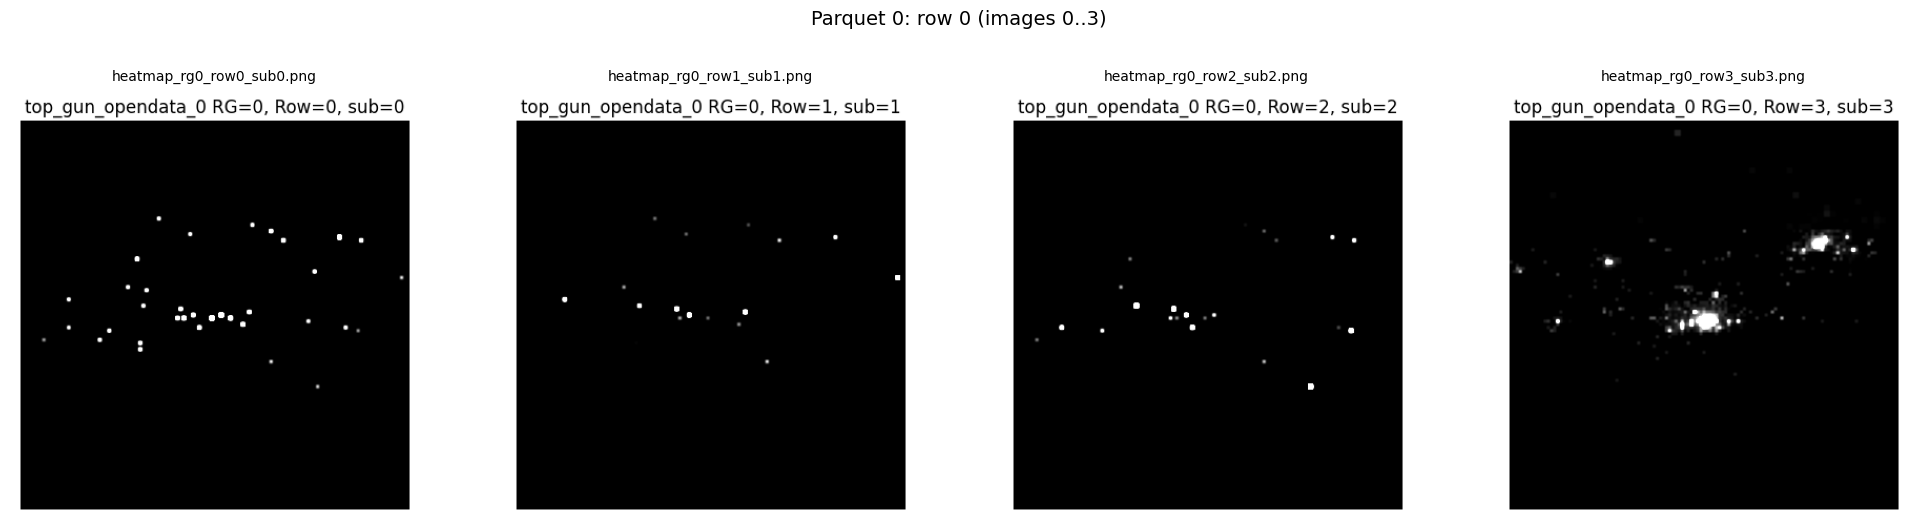

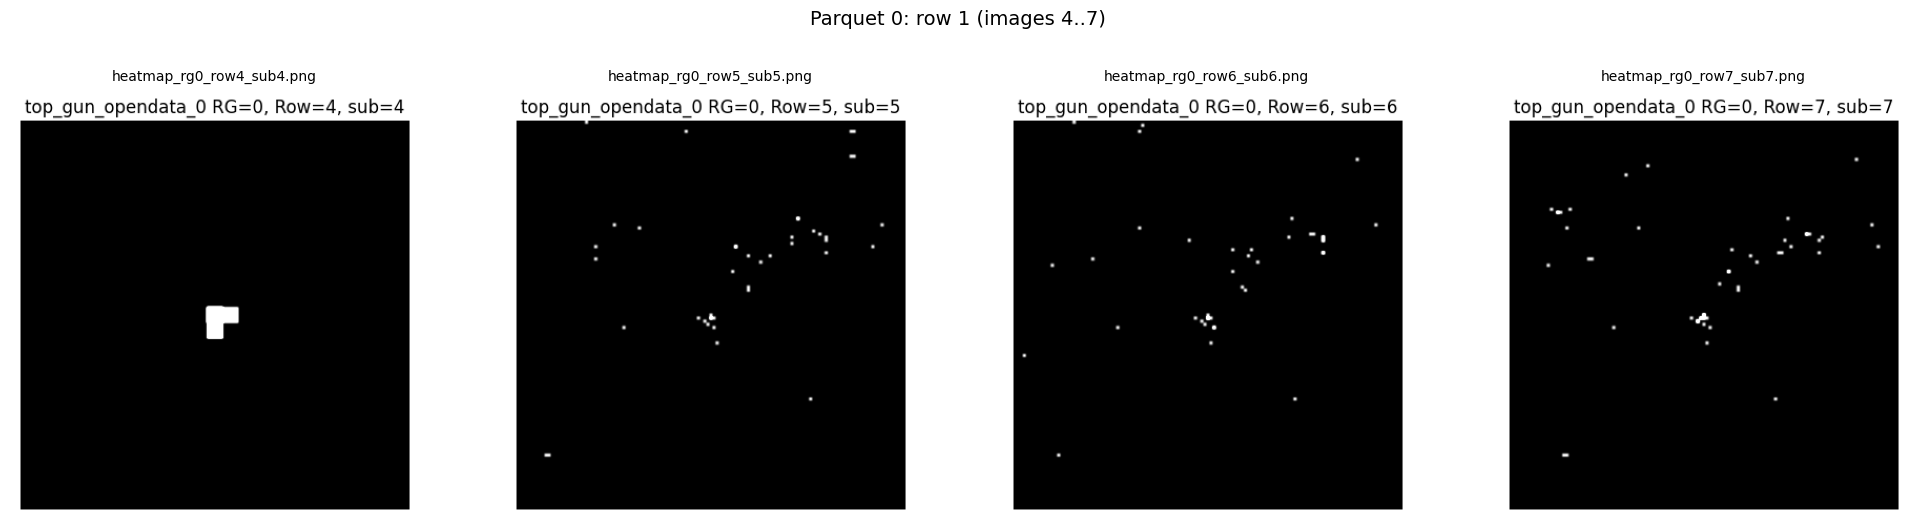

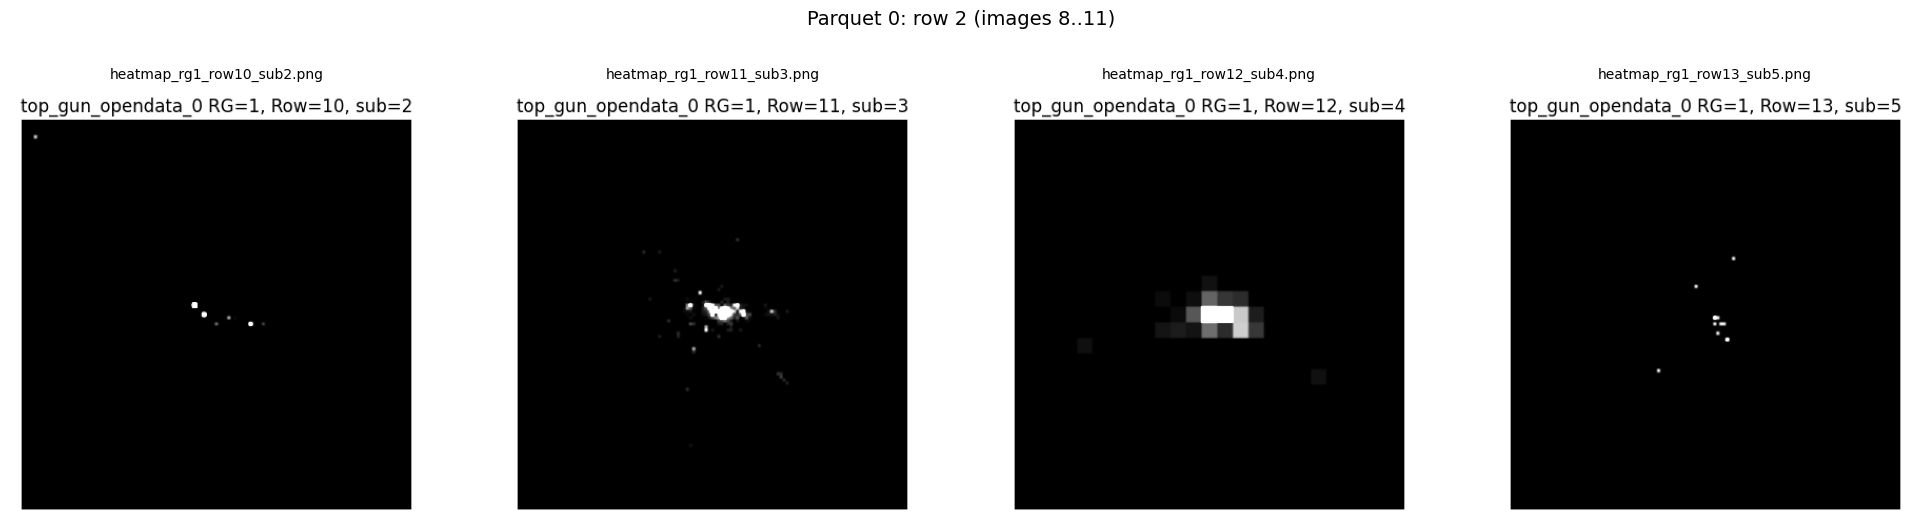

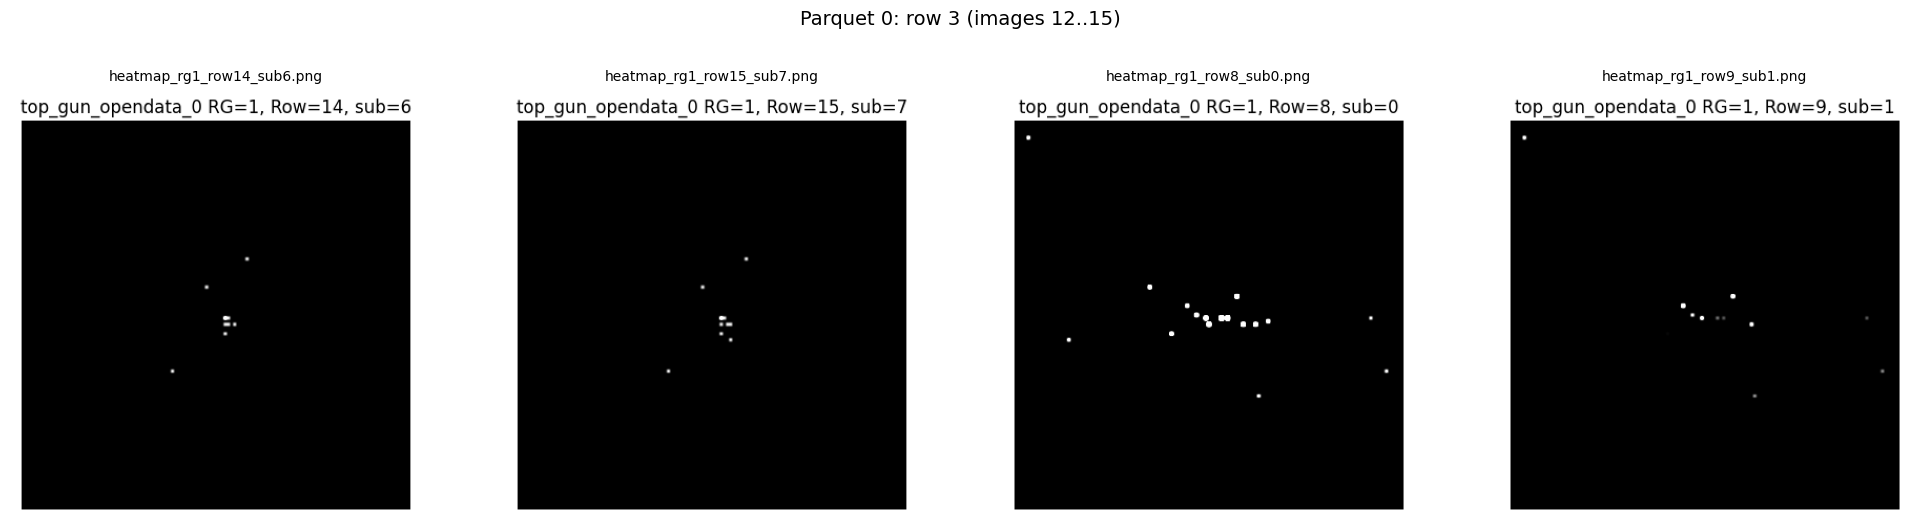

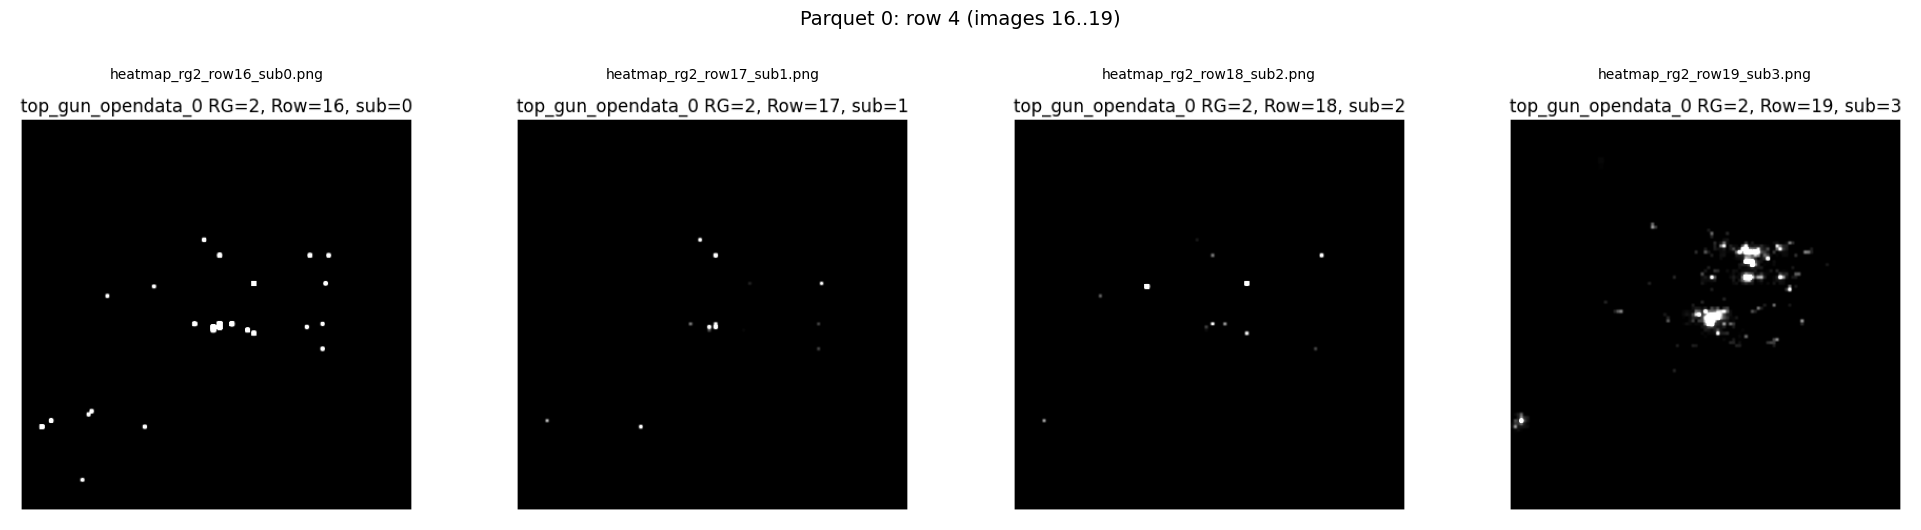

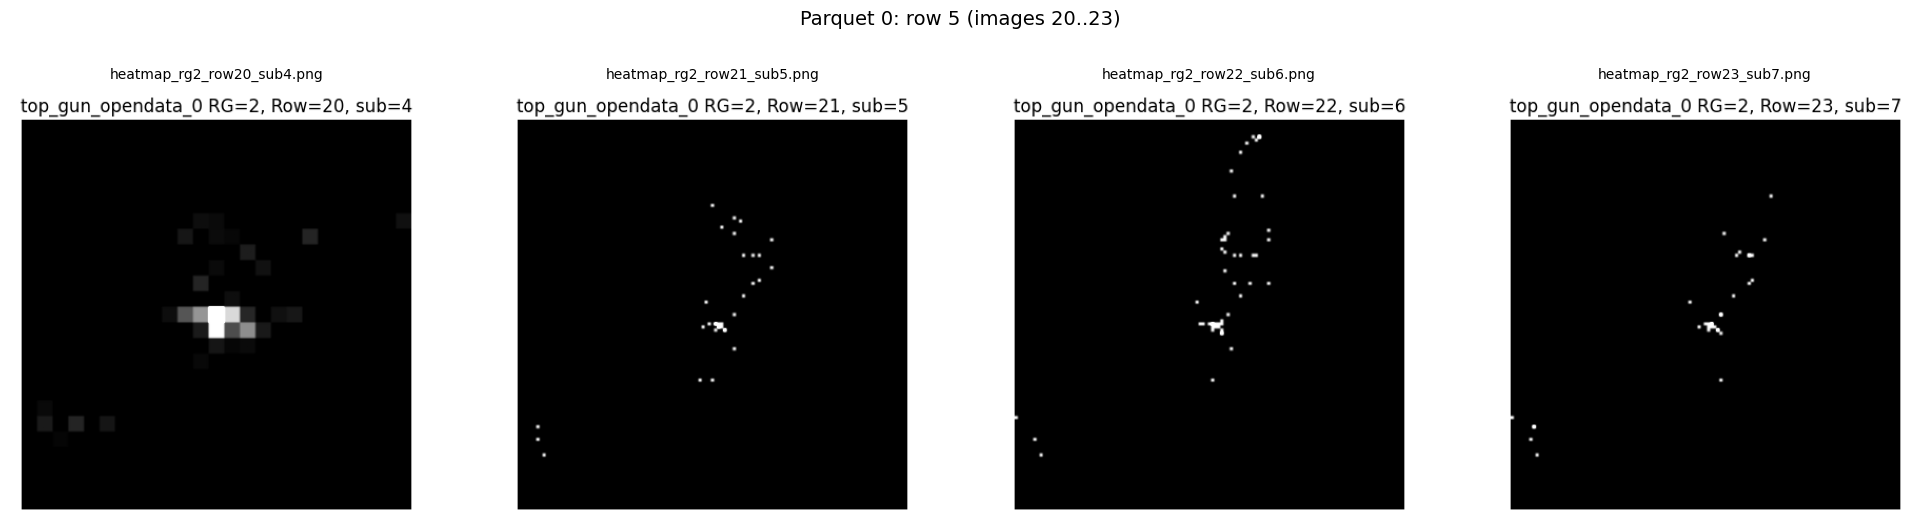

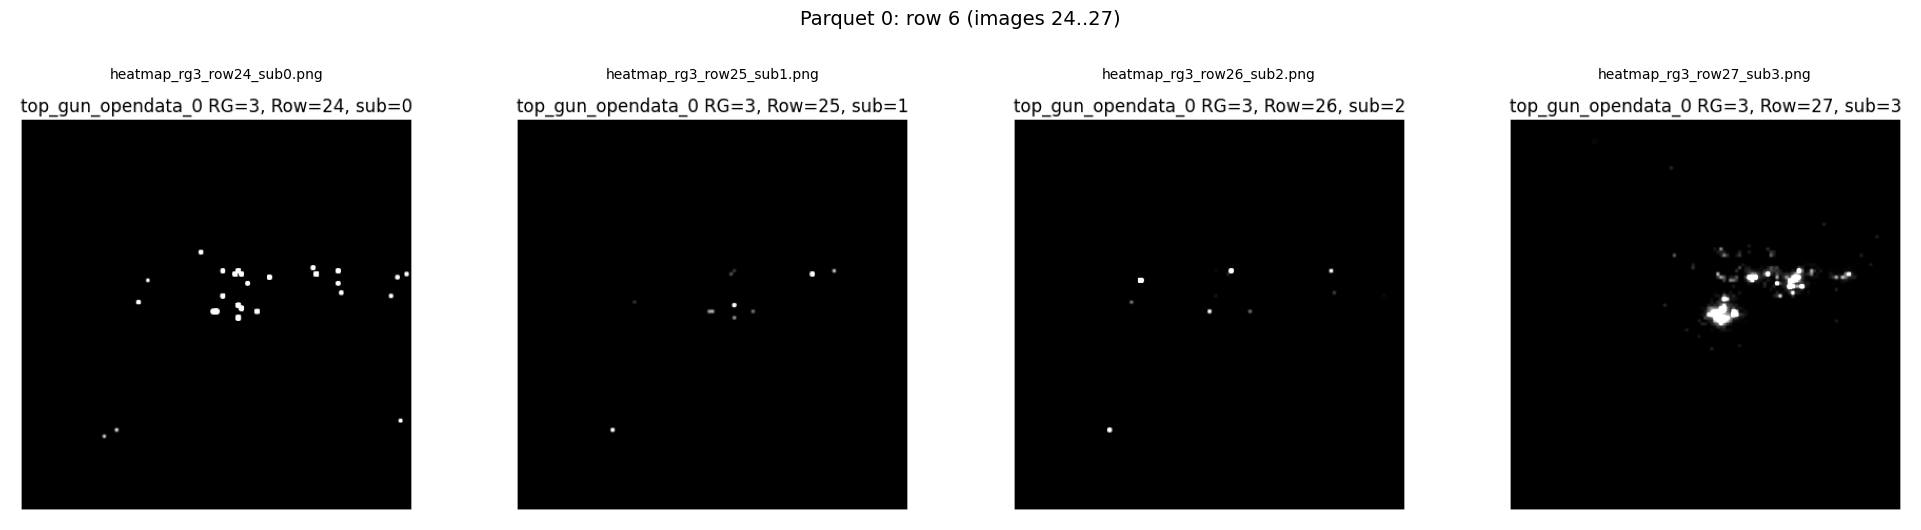

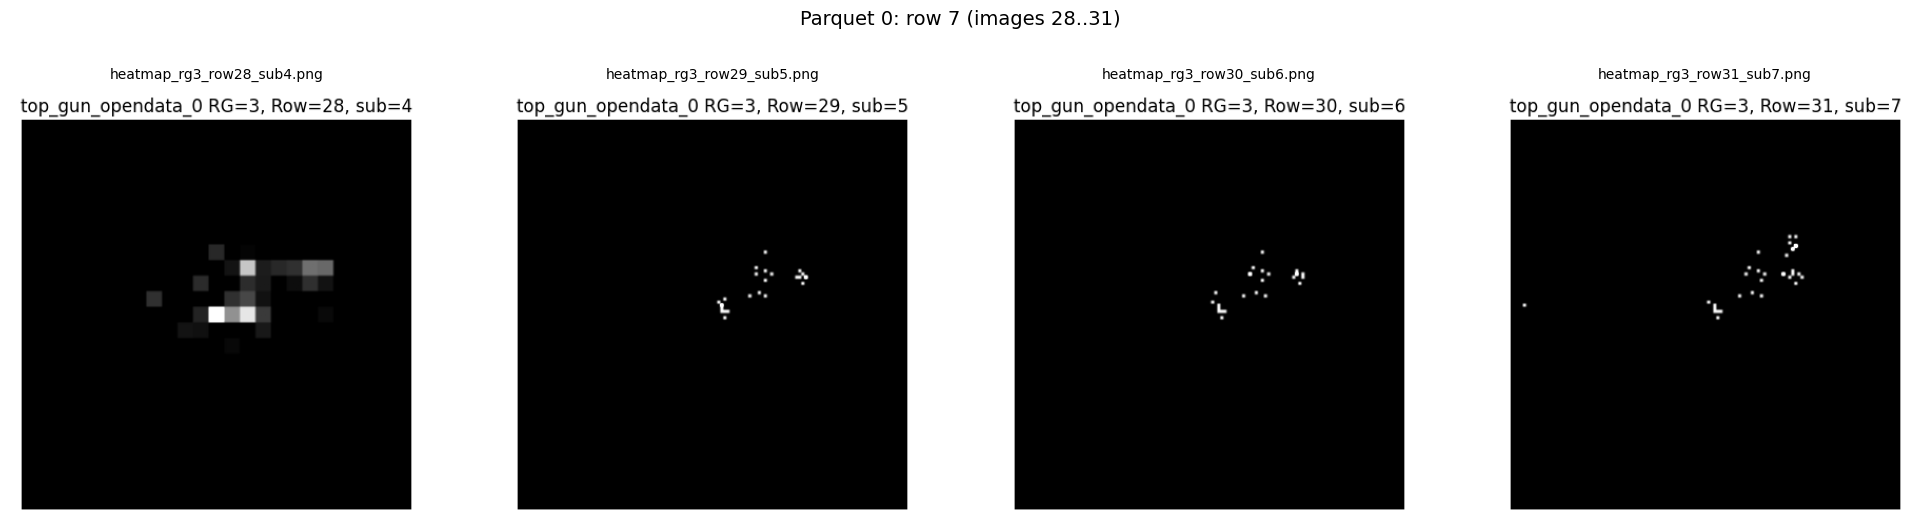

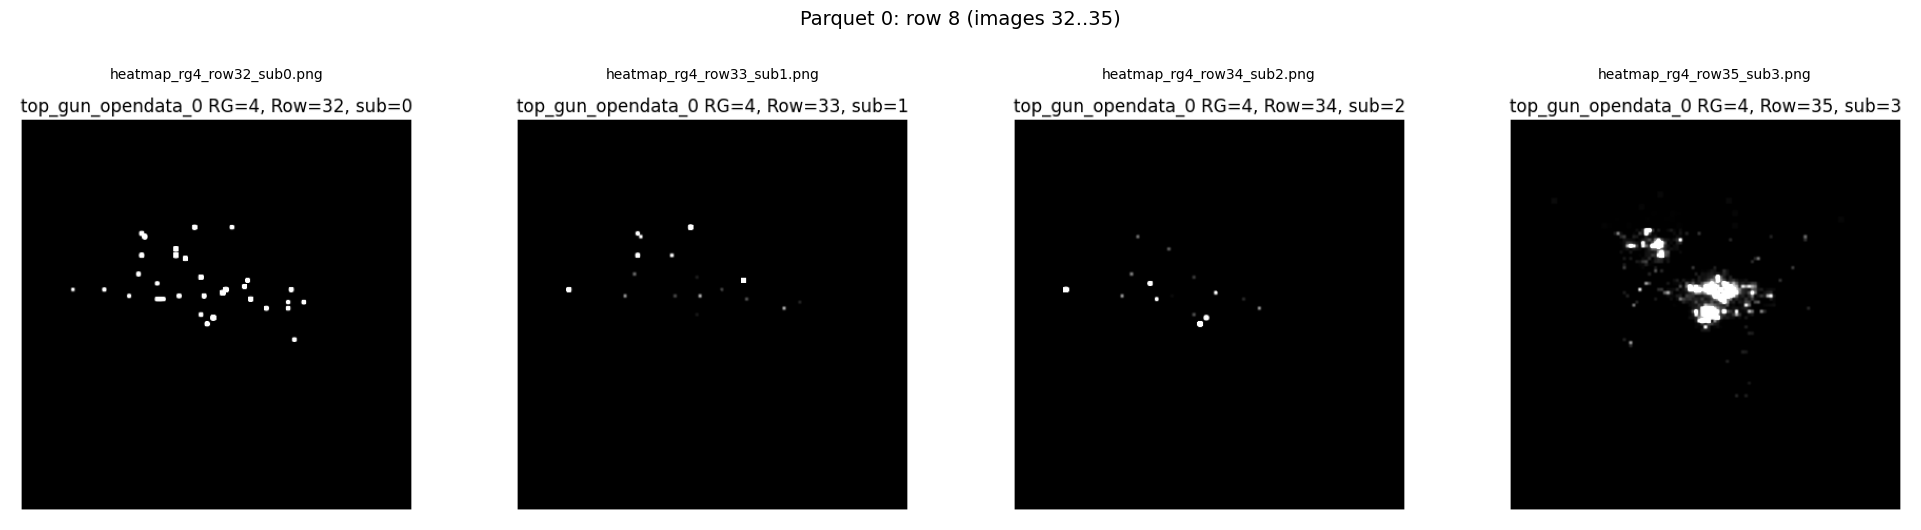

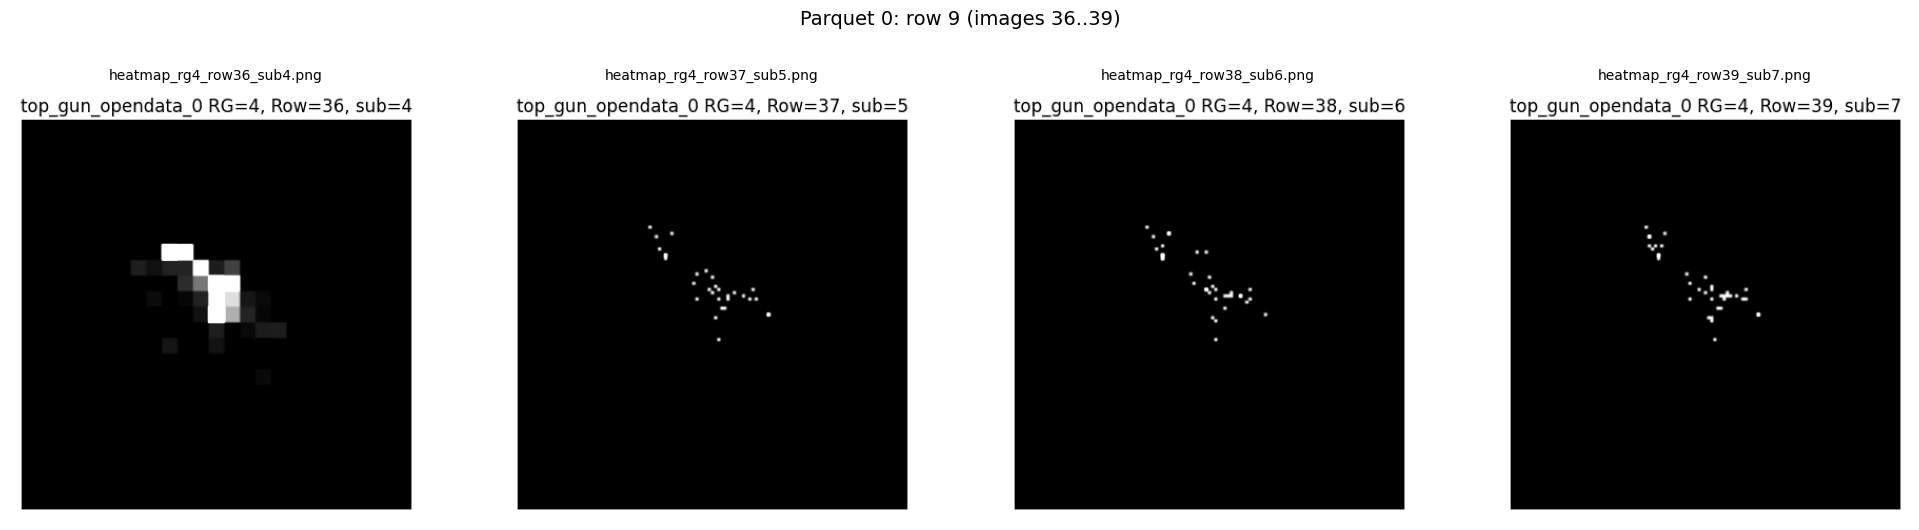

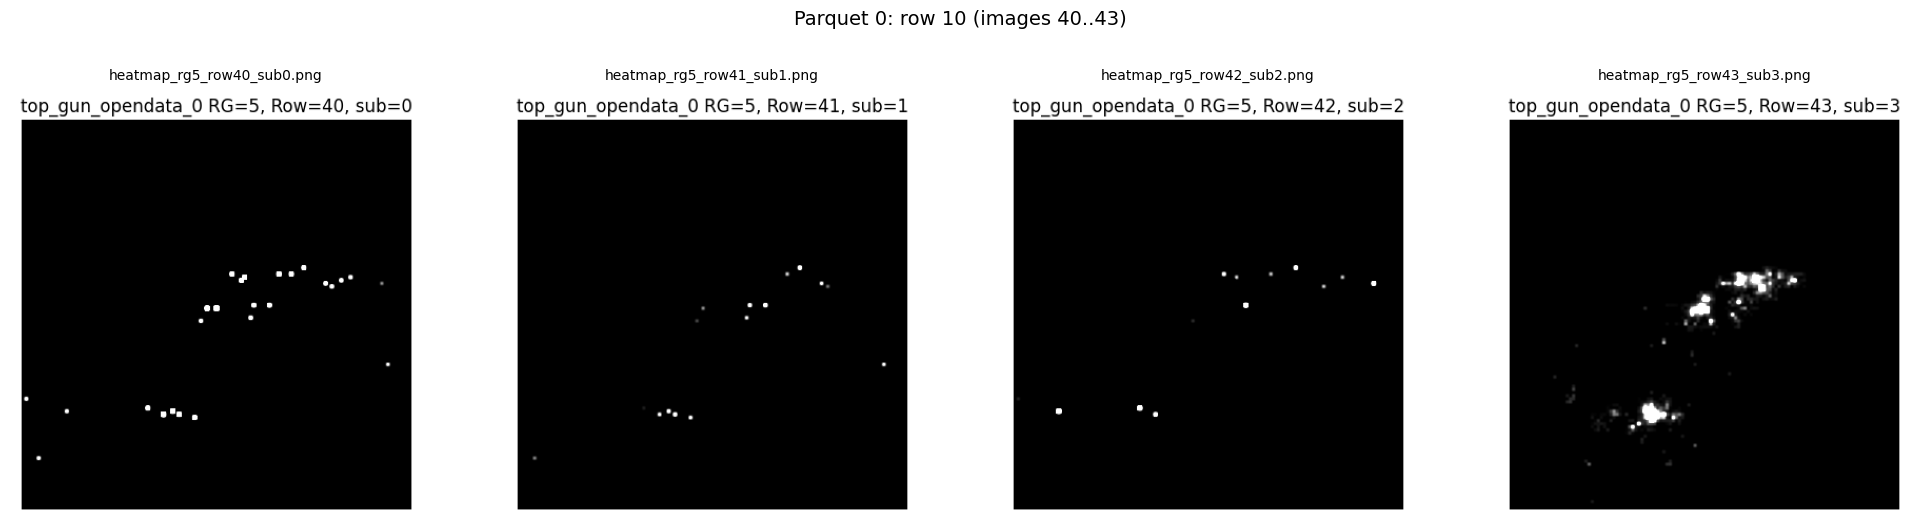

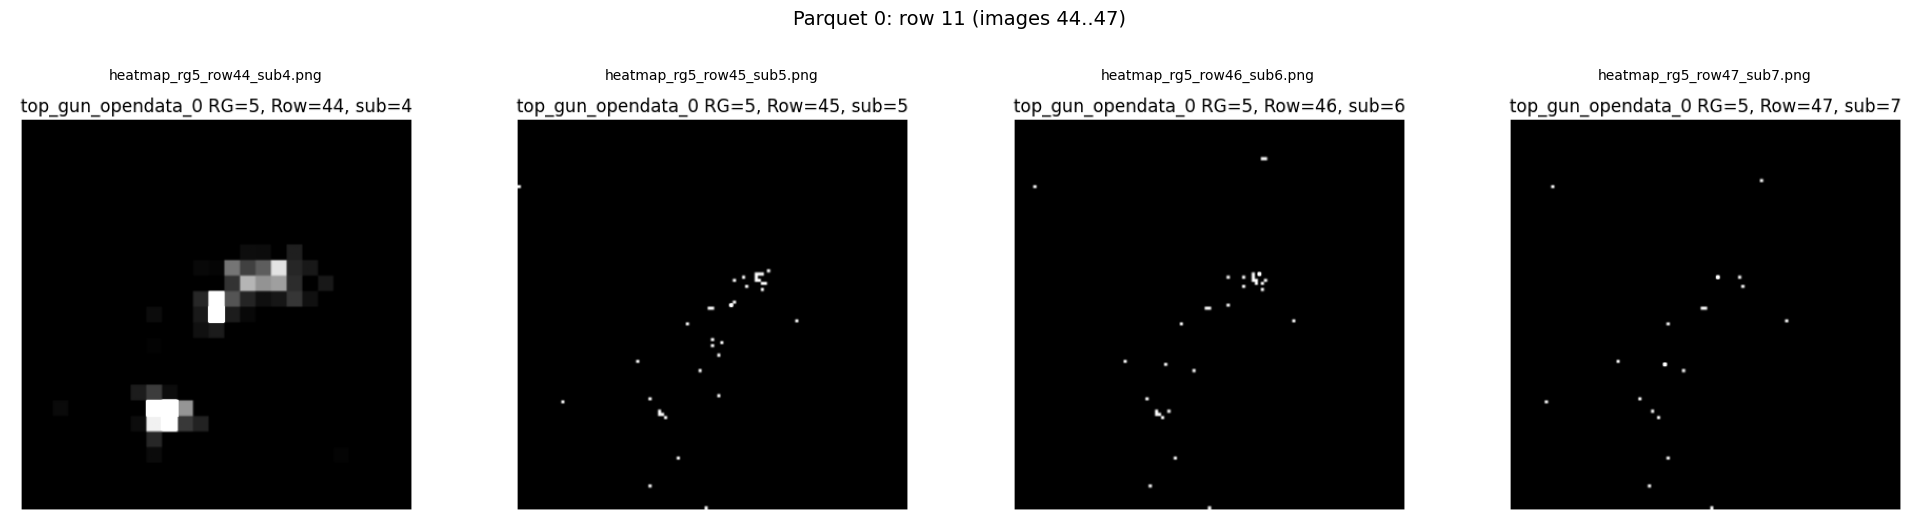

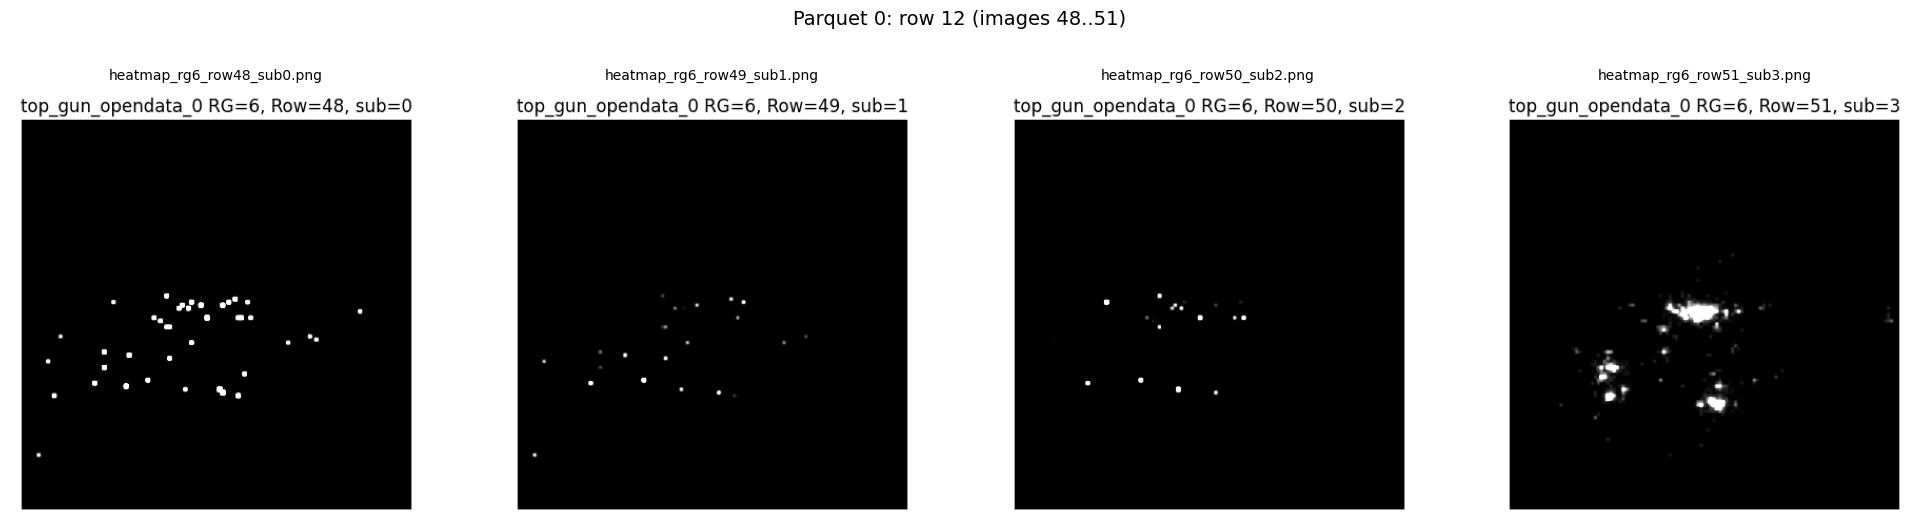

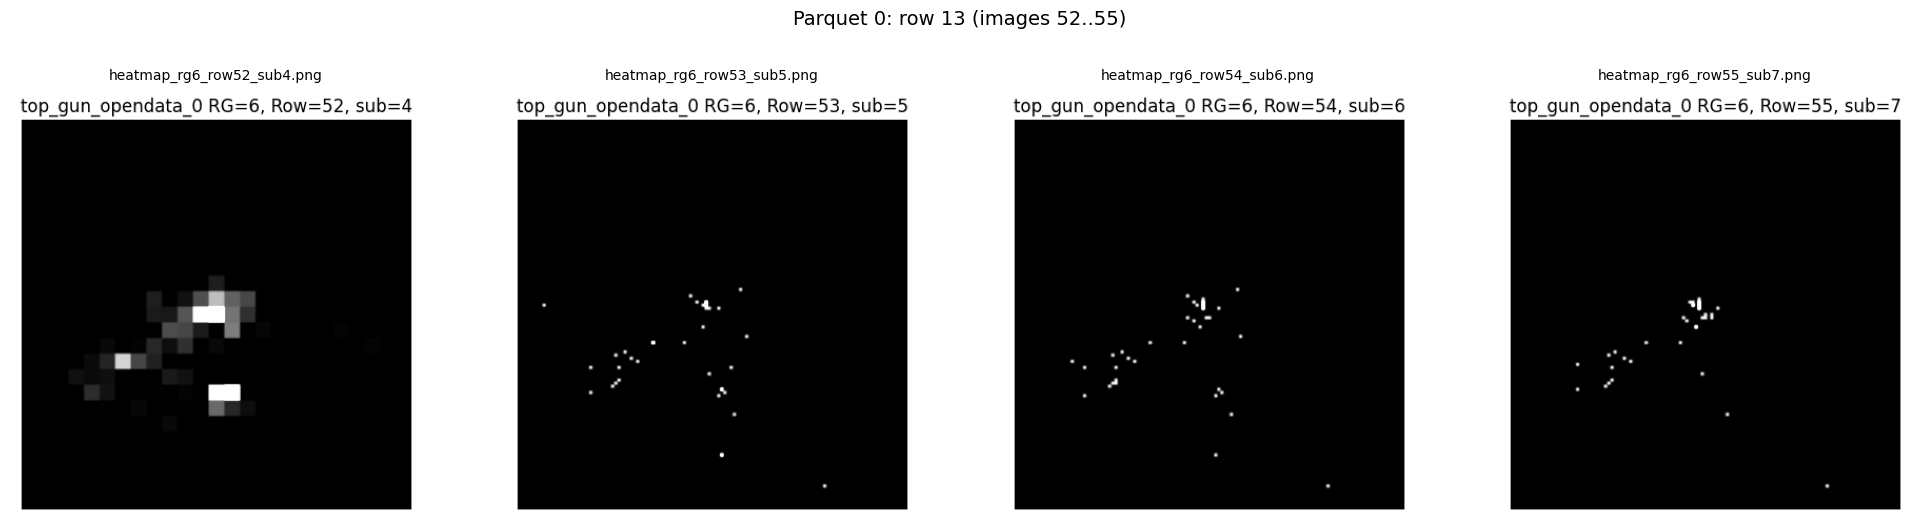

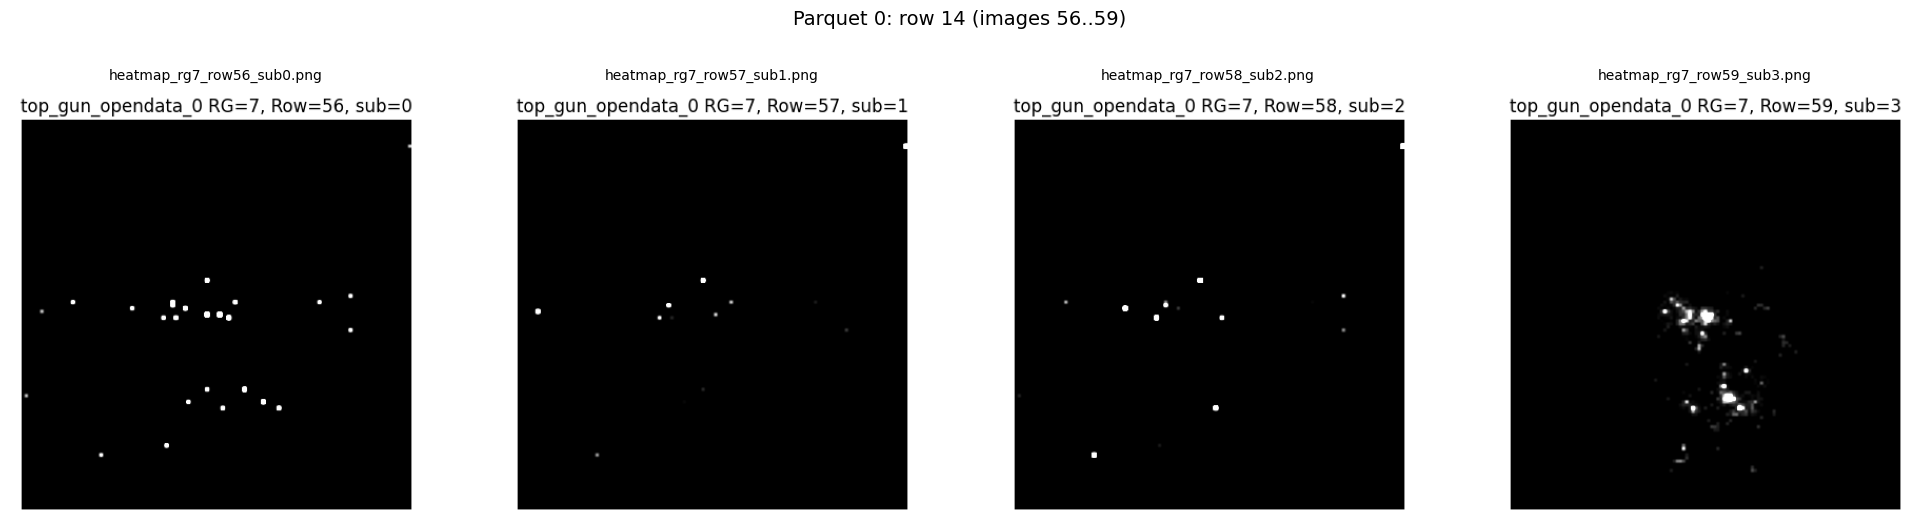

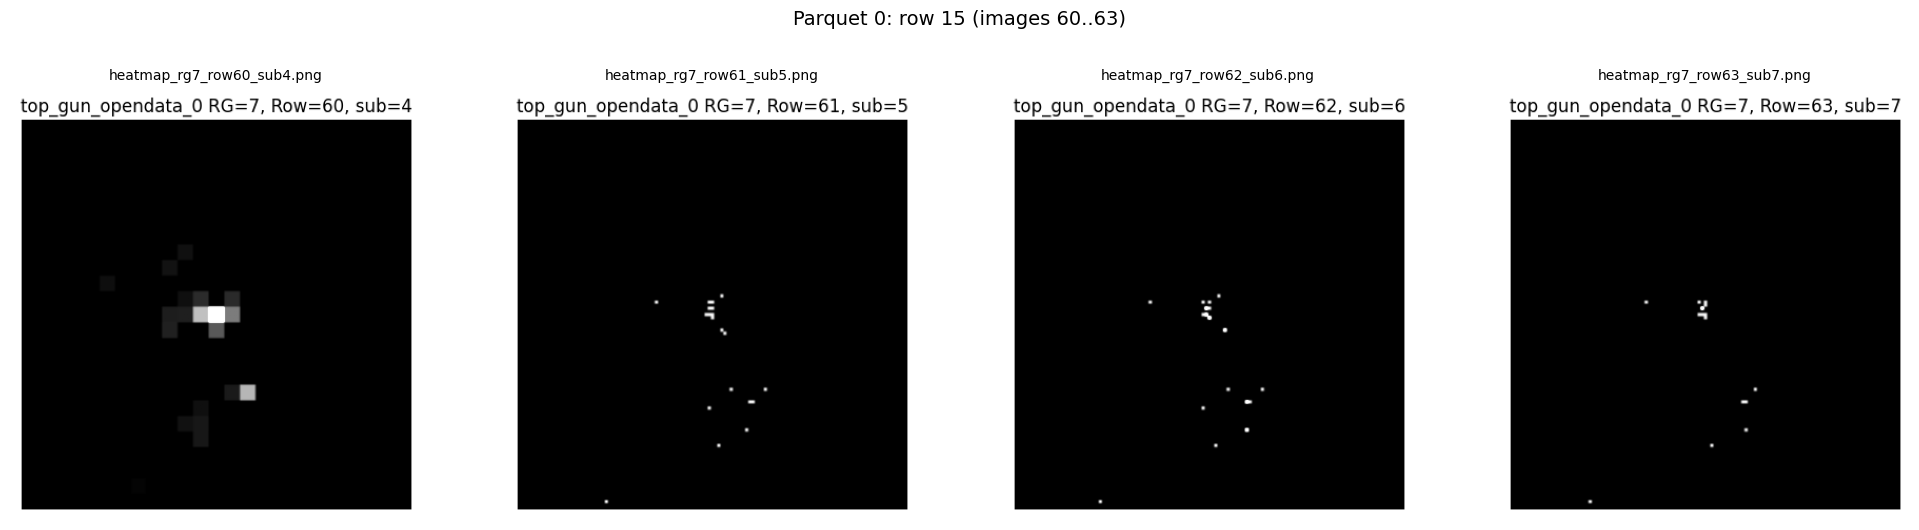

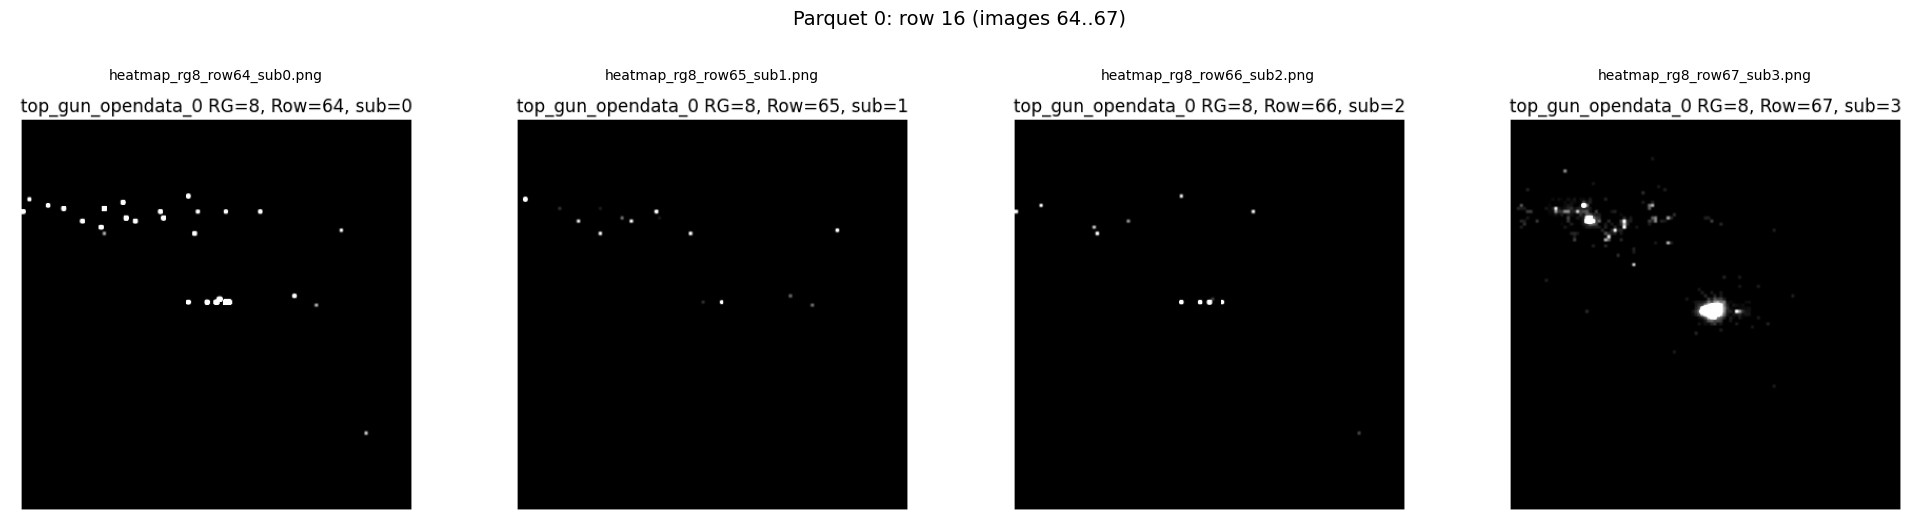

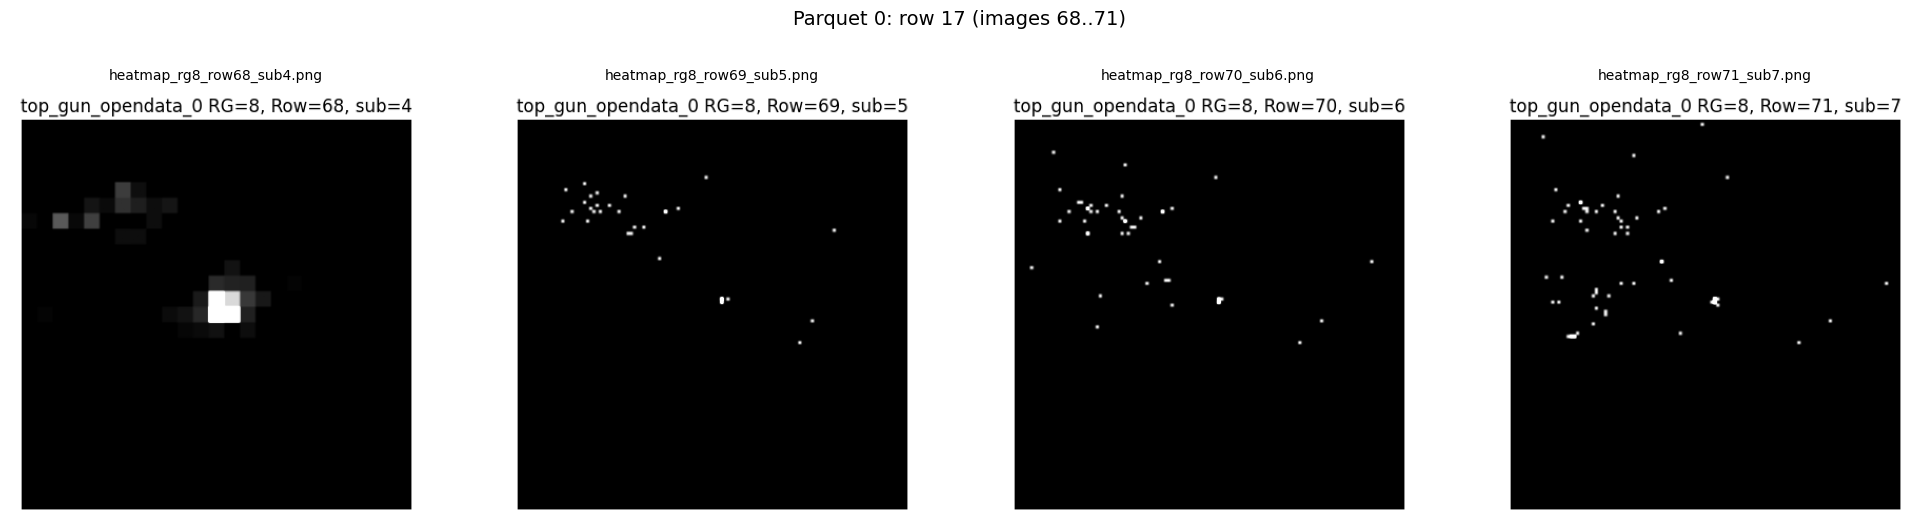

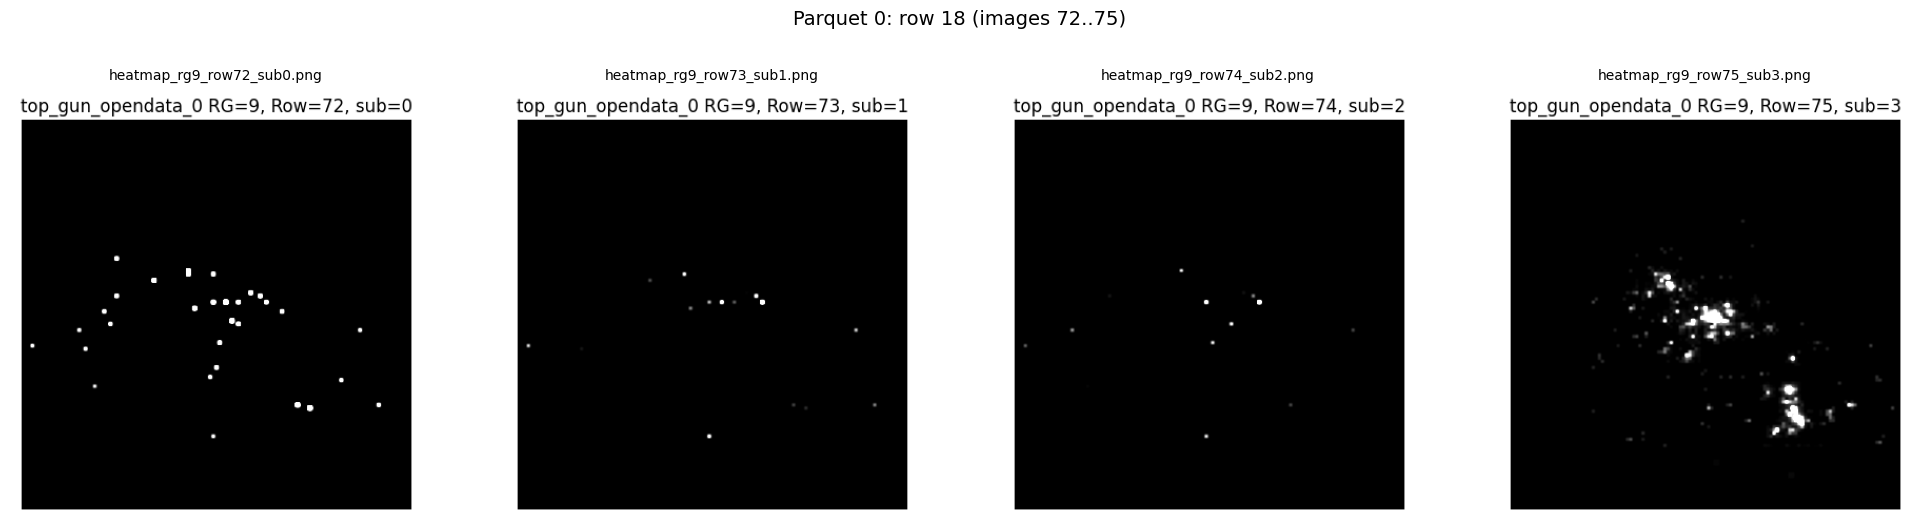

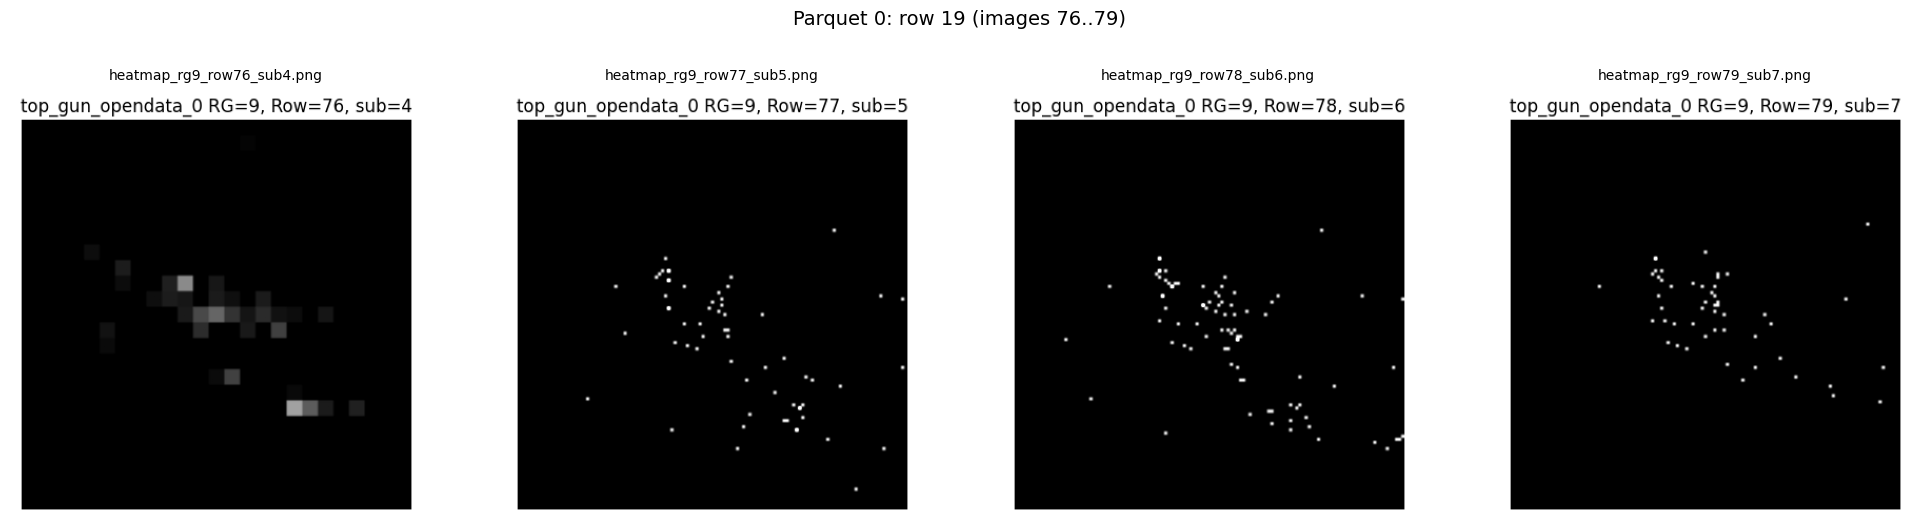


=== Parquet file index 1 ===
Found 80 images in /kaggle/working/top_gun_opendata_1/Images


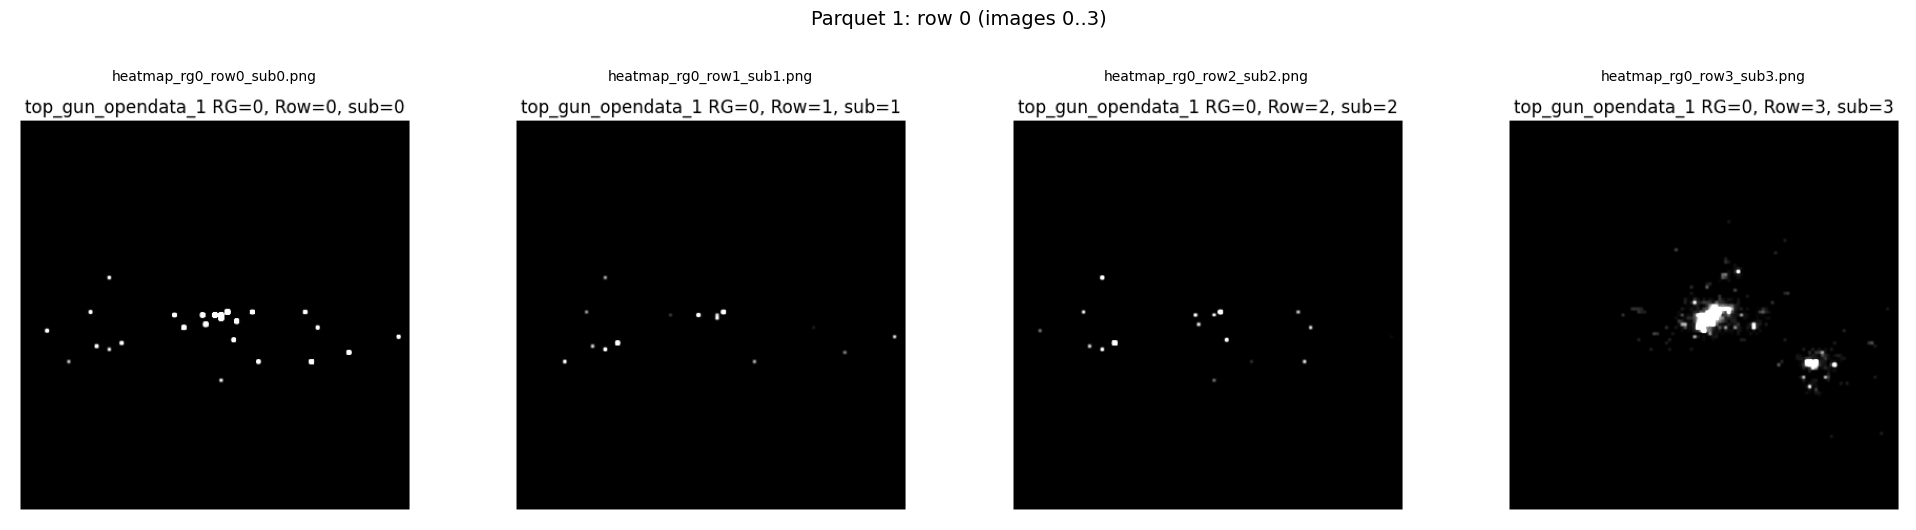

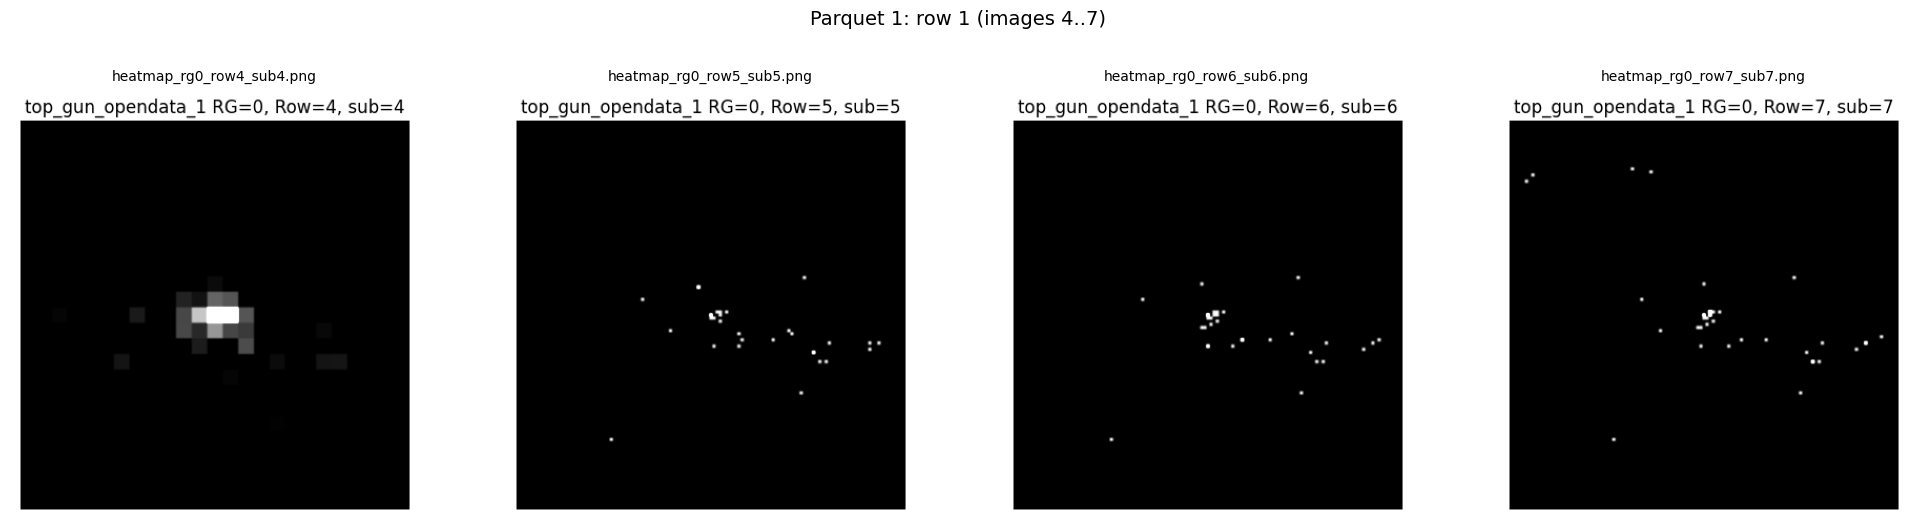

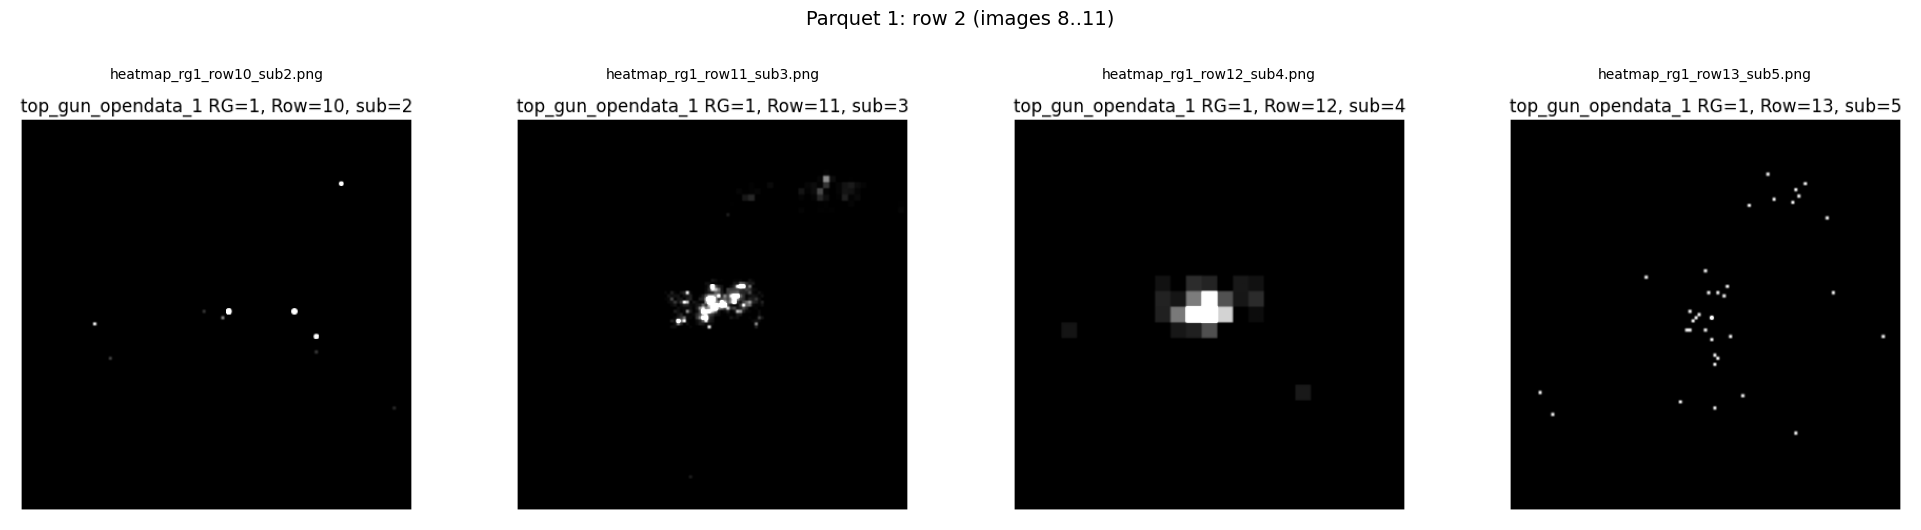

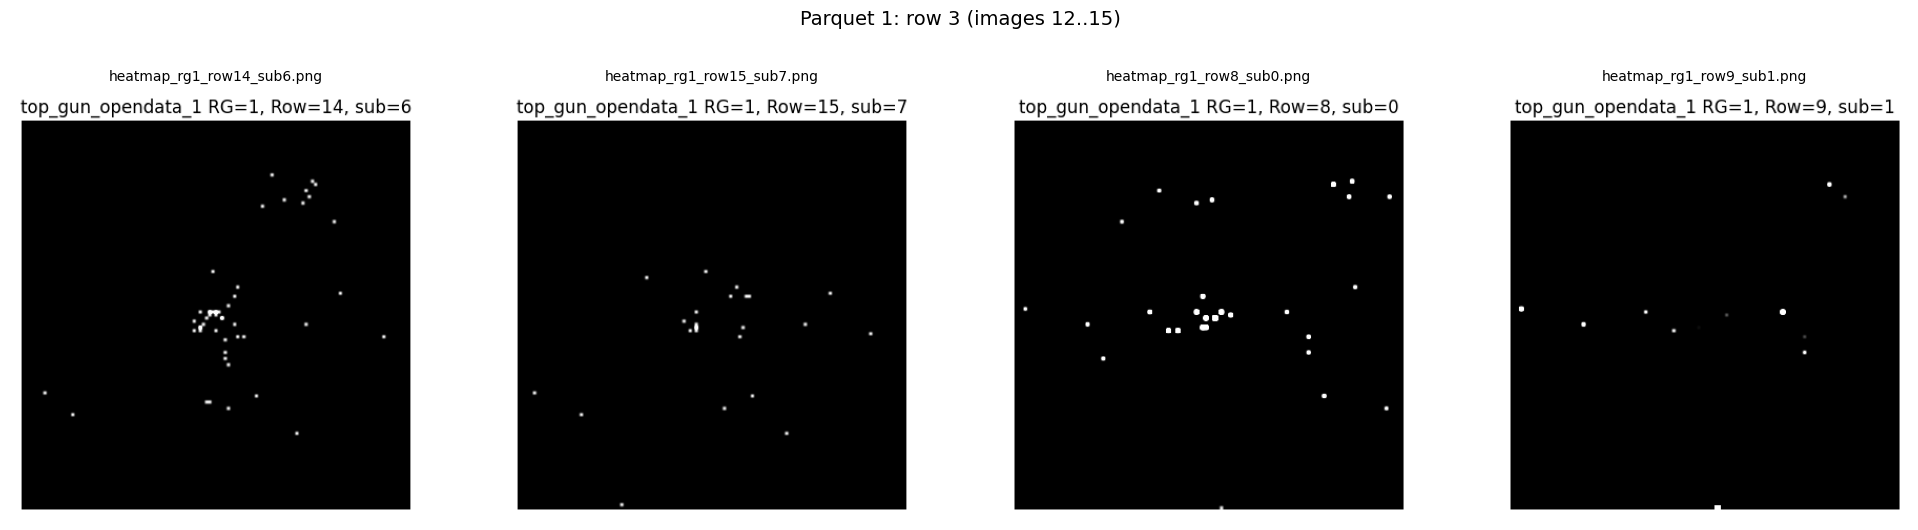

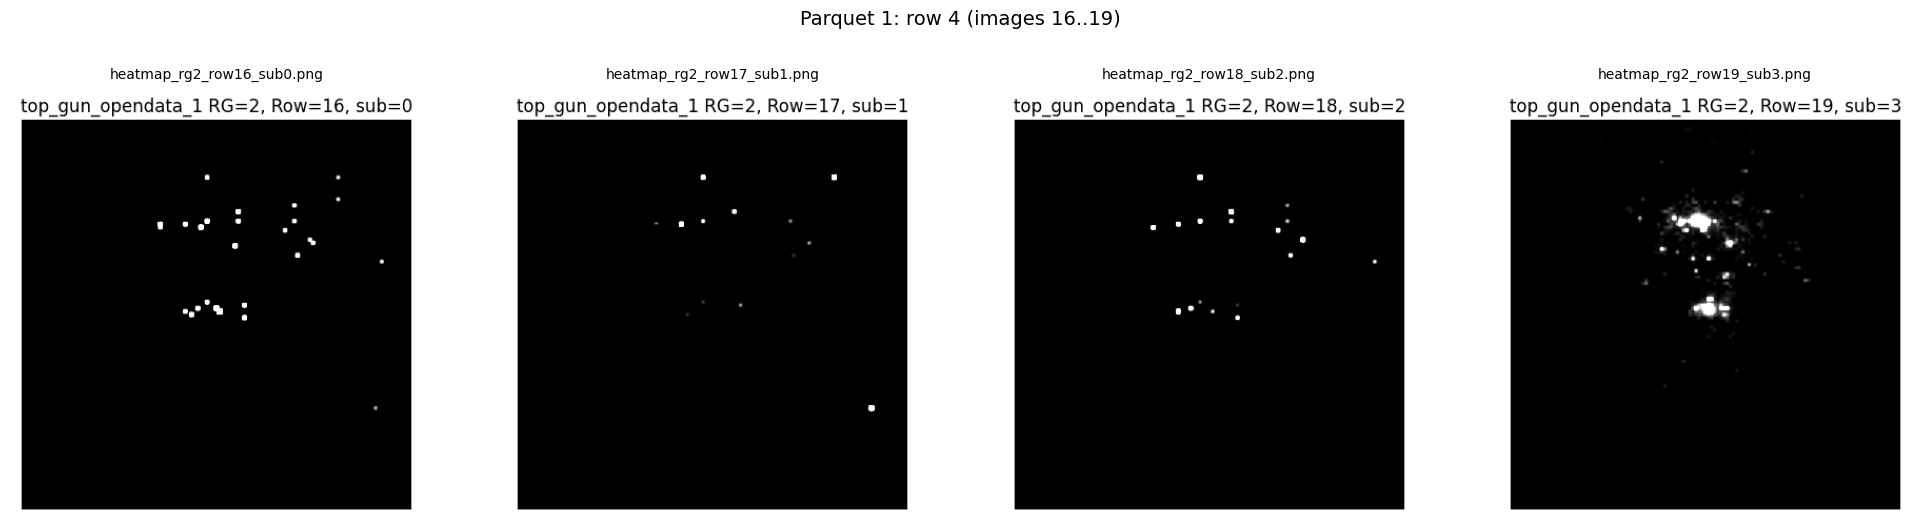

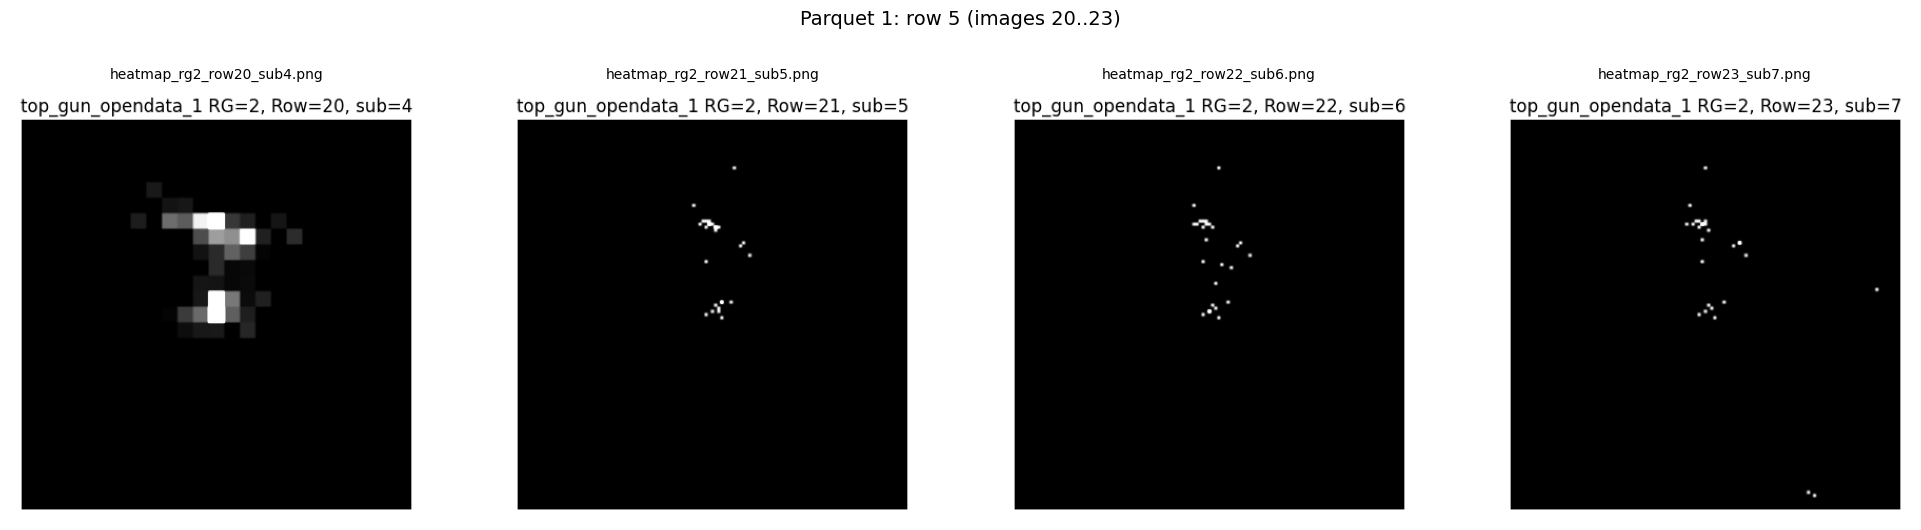

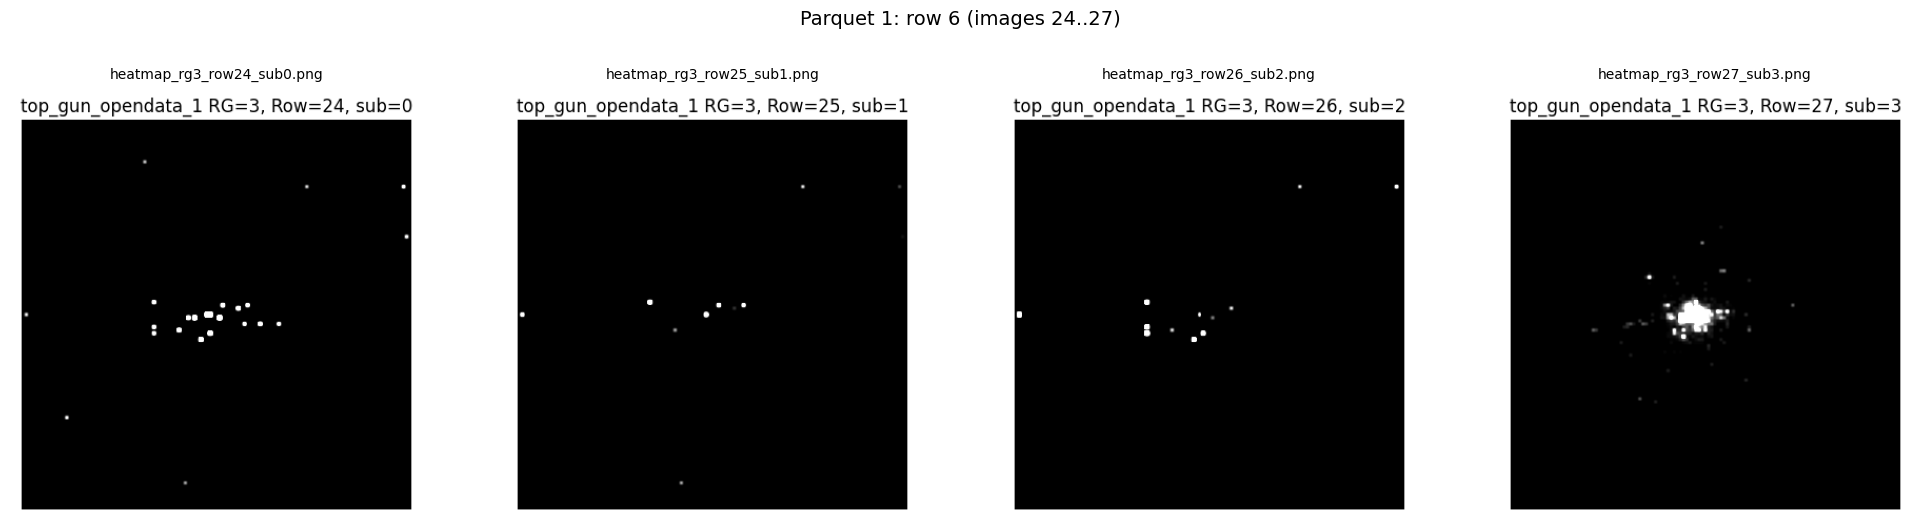

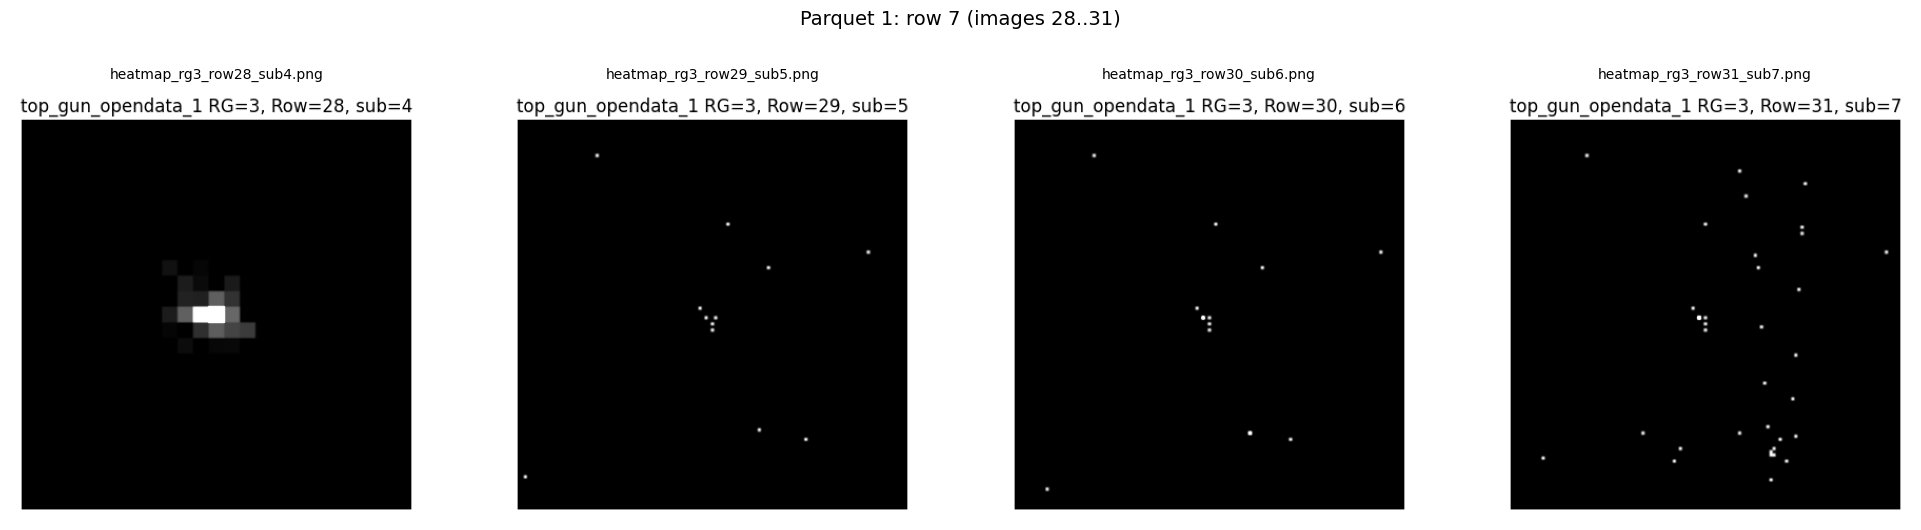

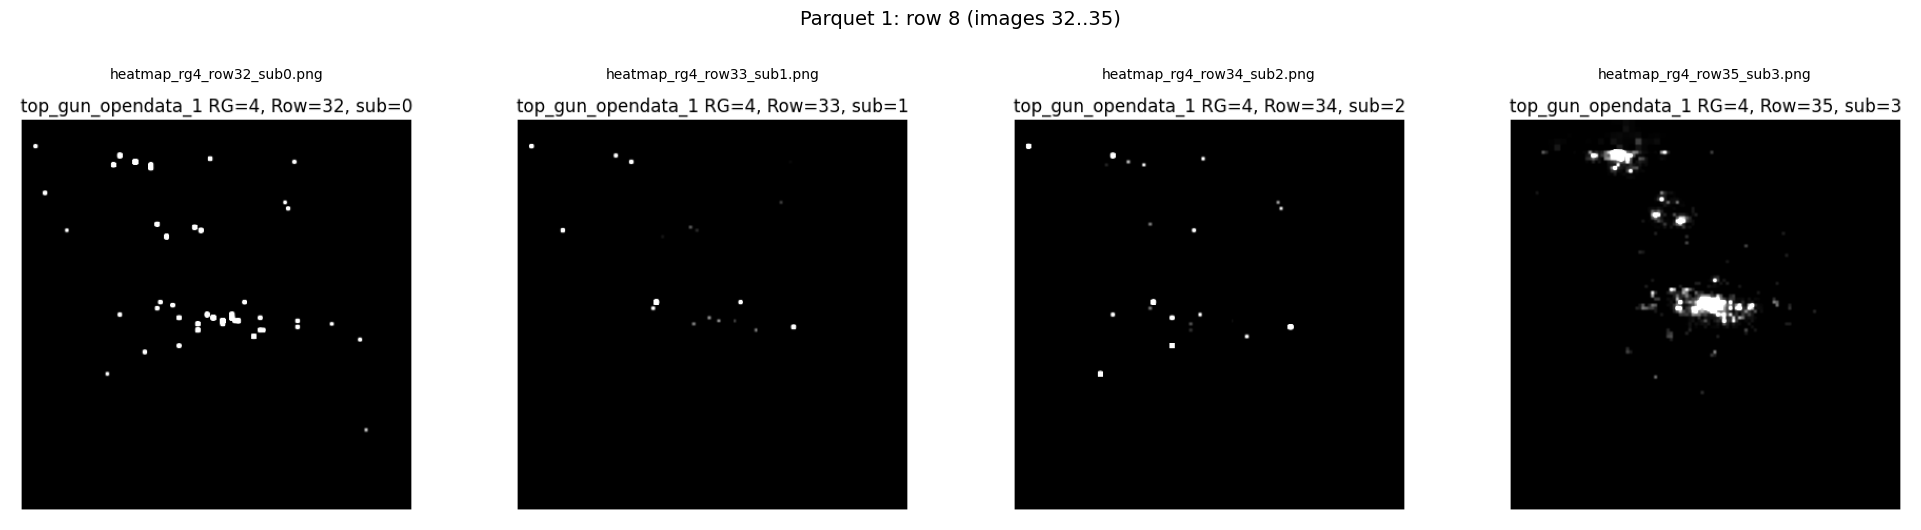

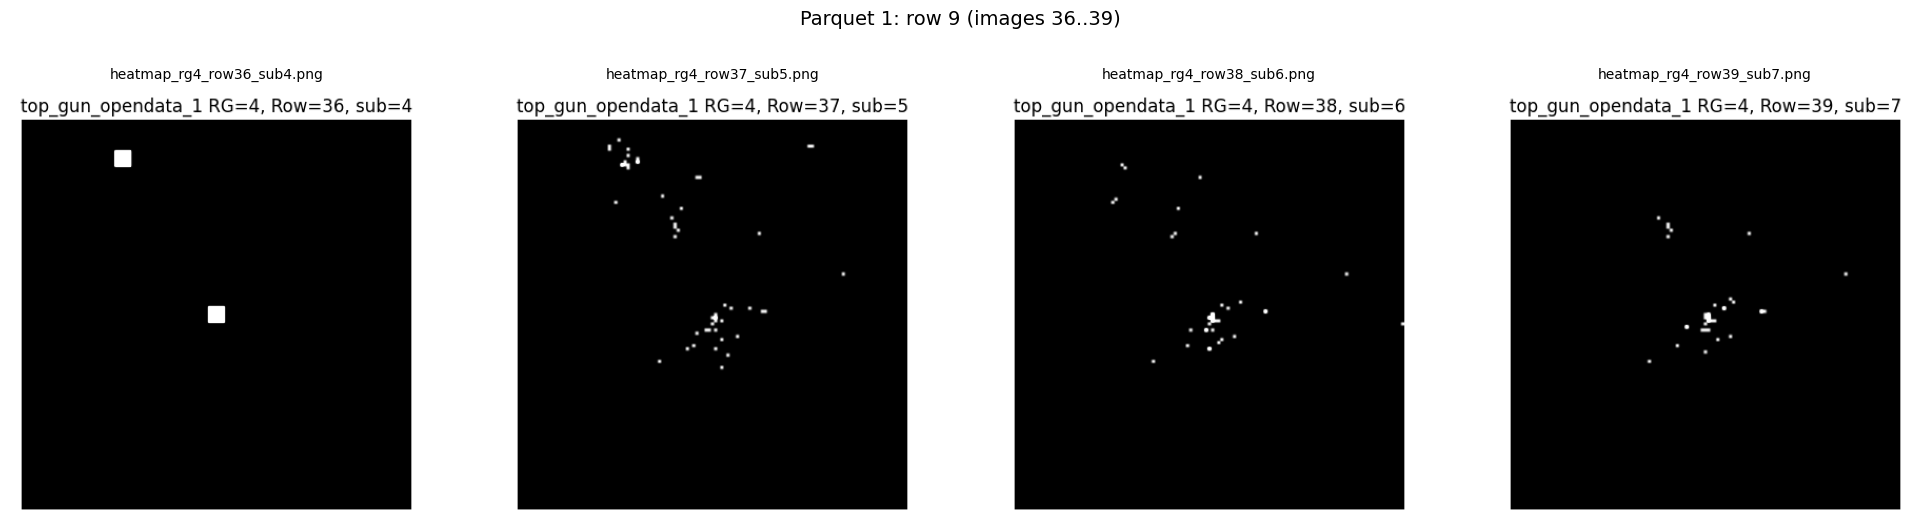

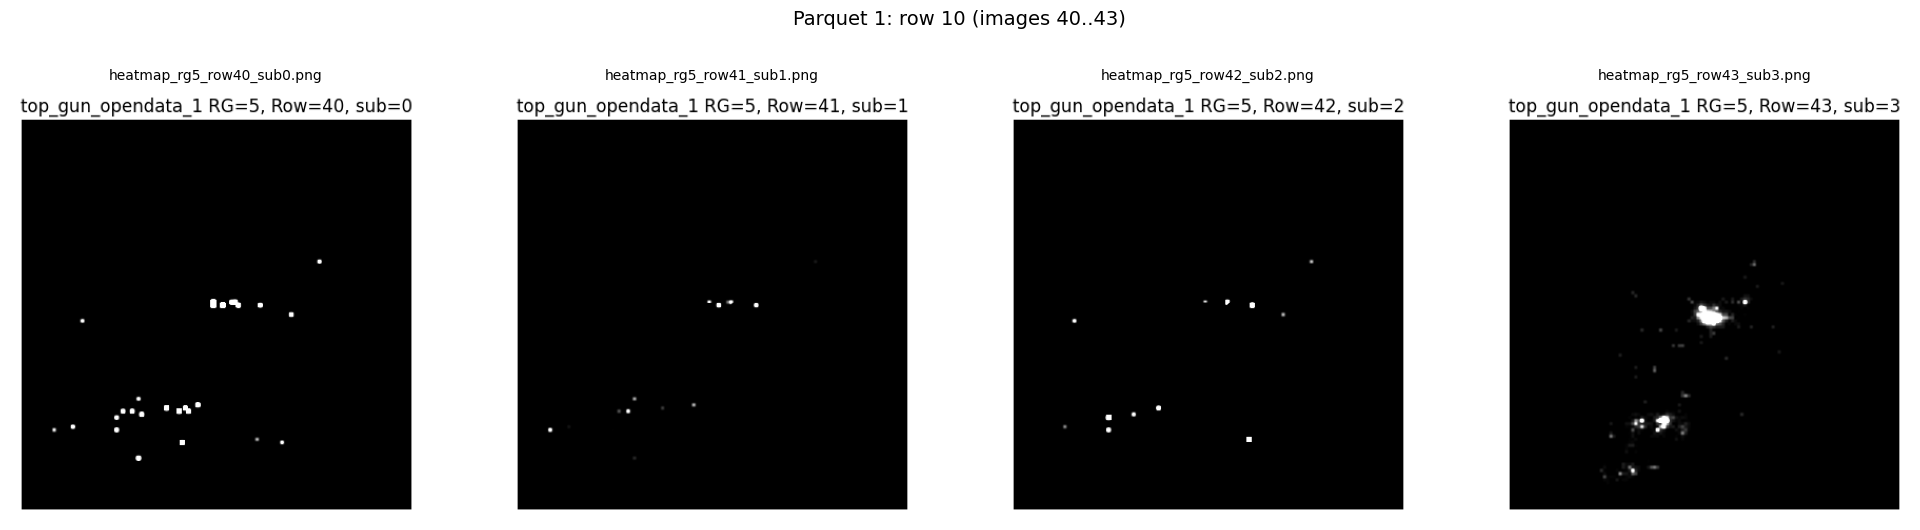

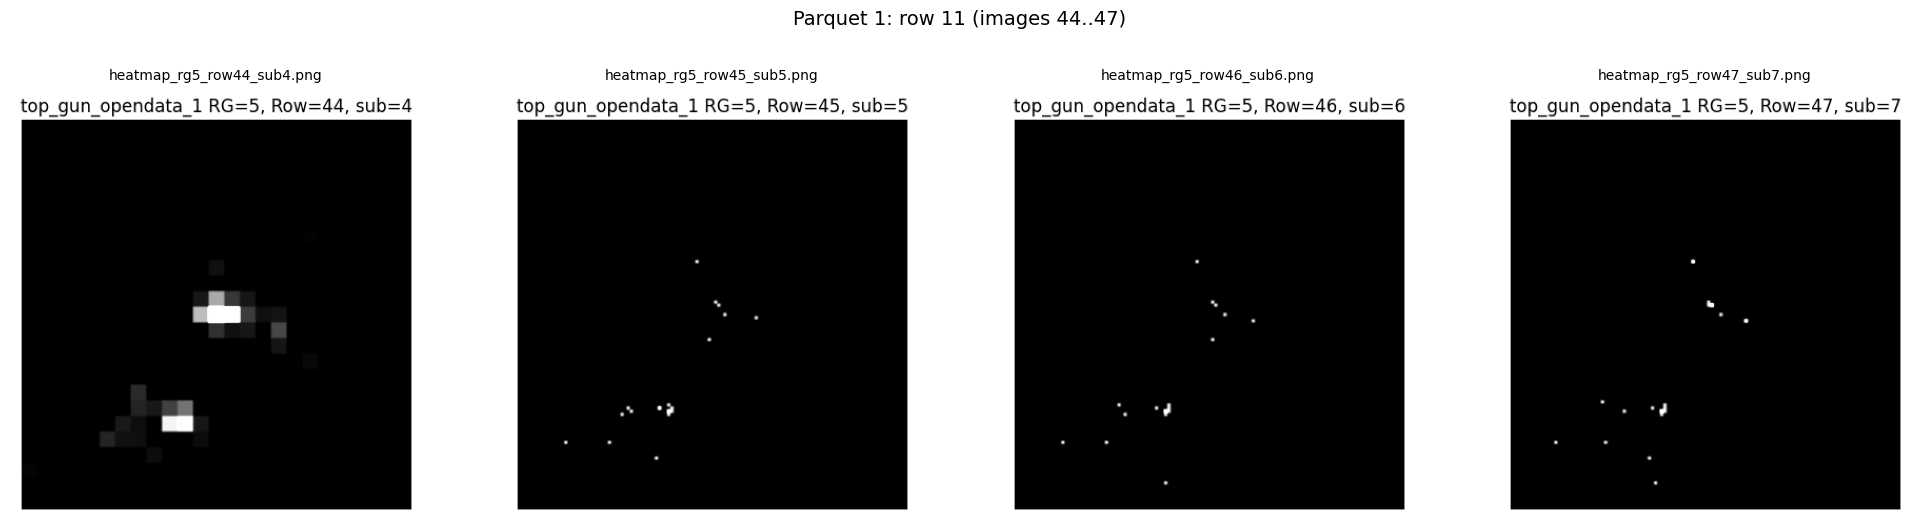

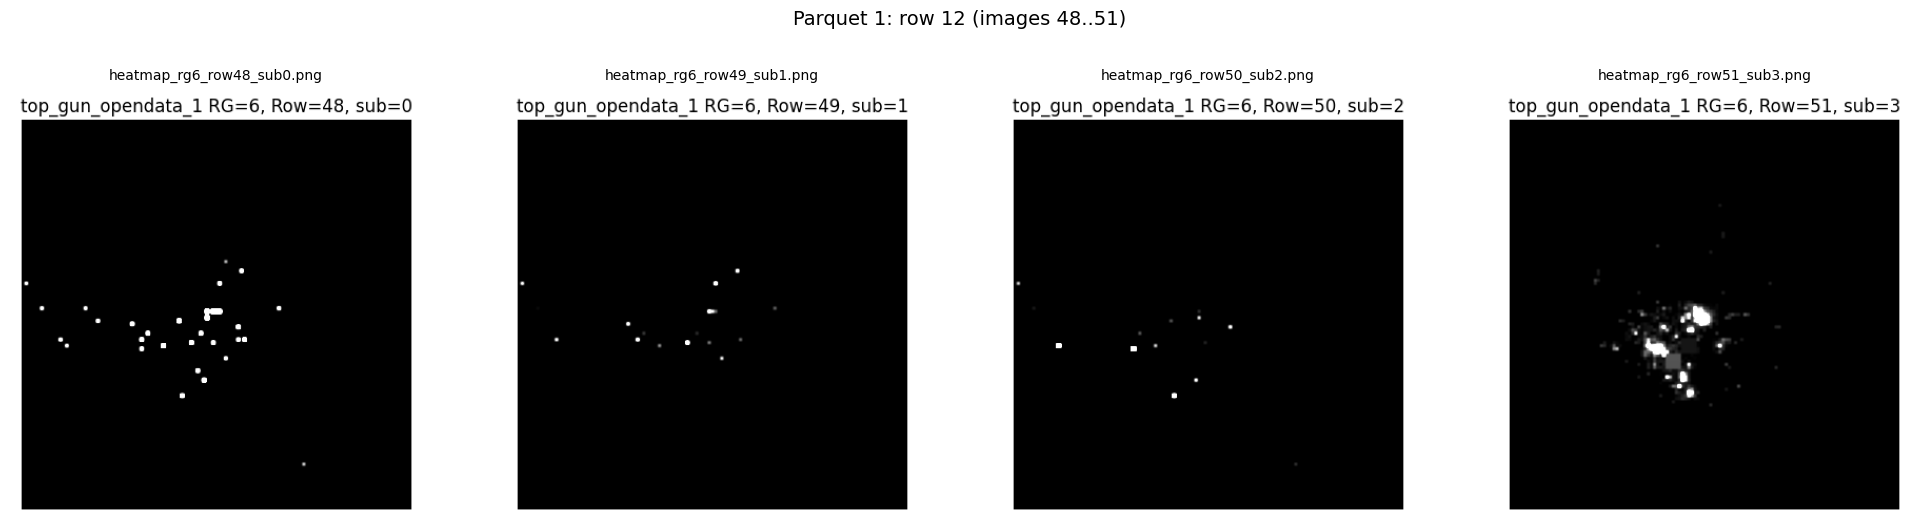

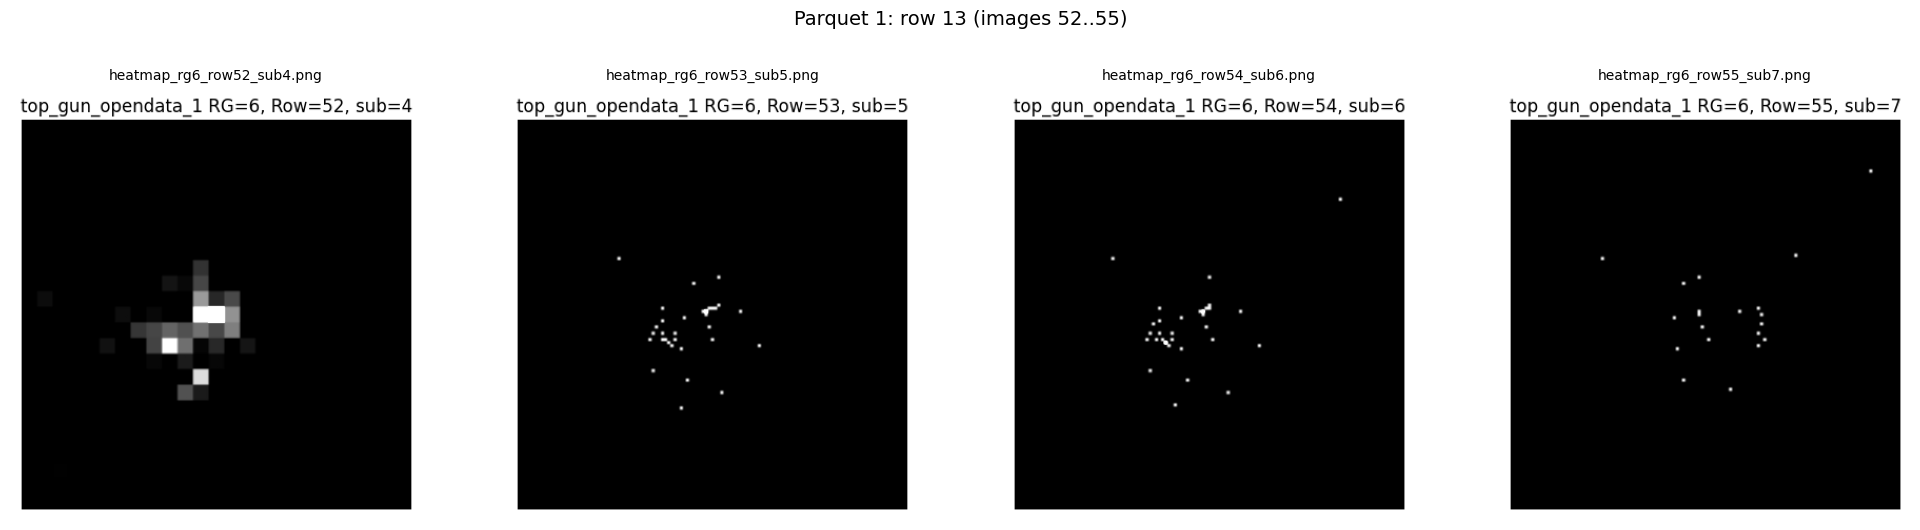

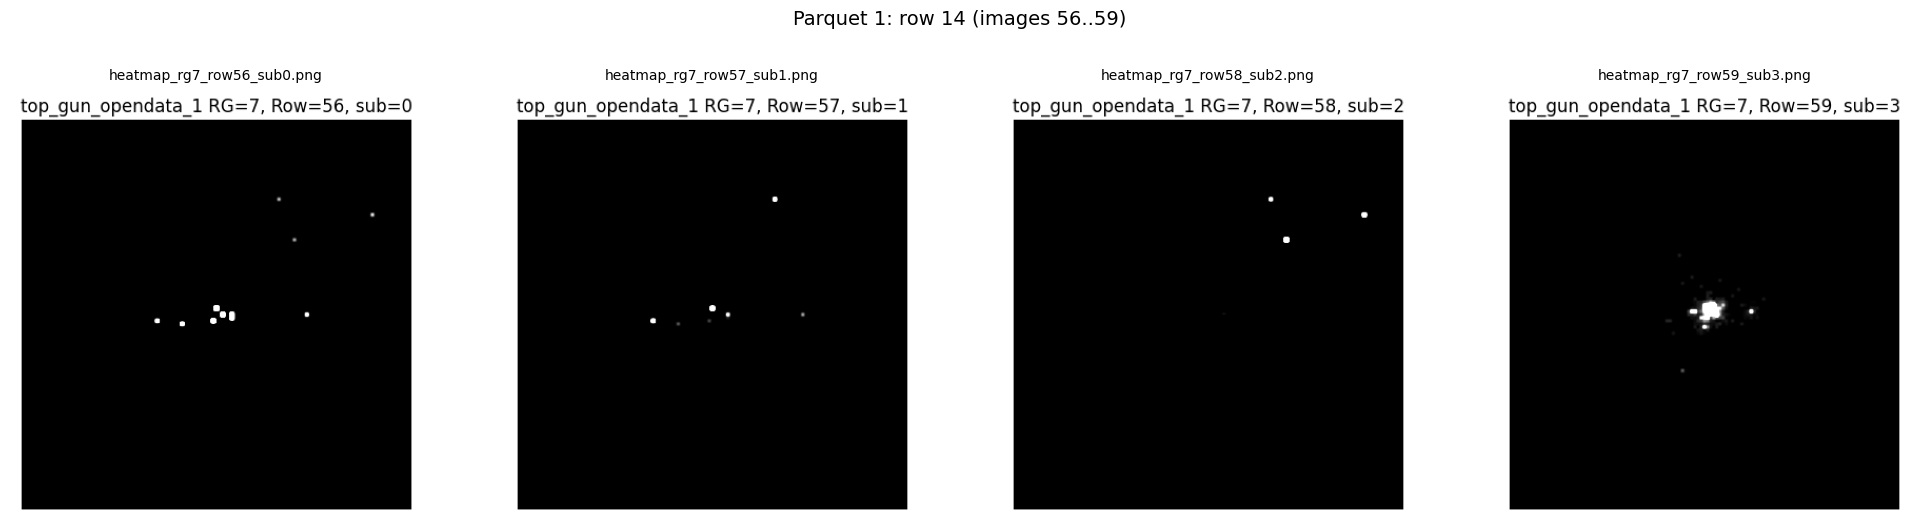

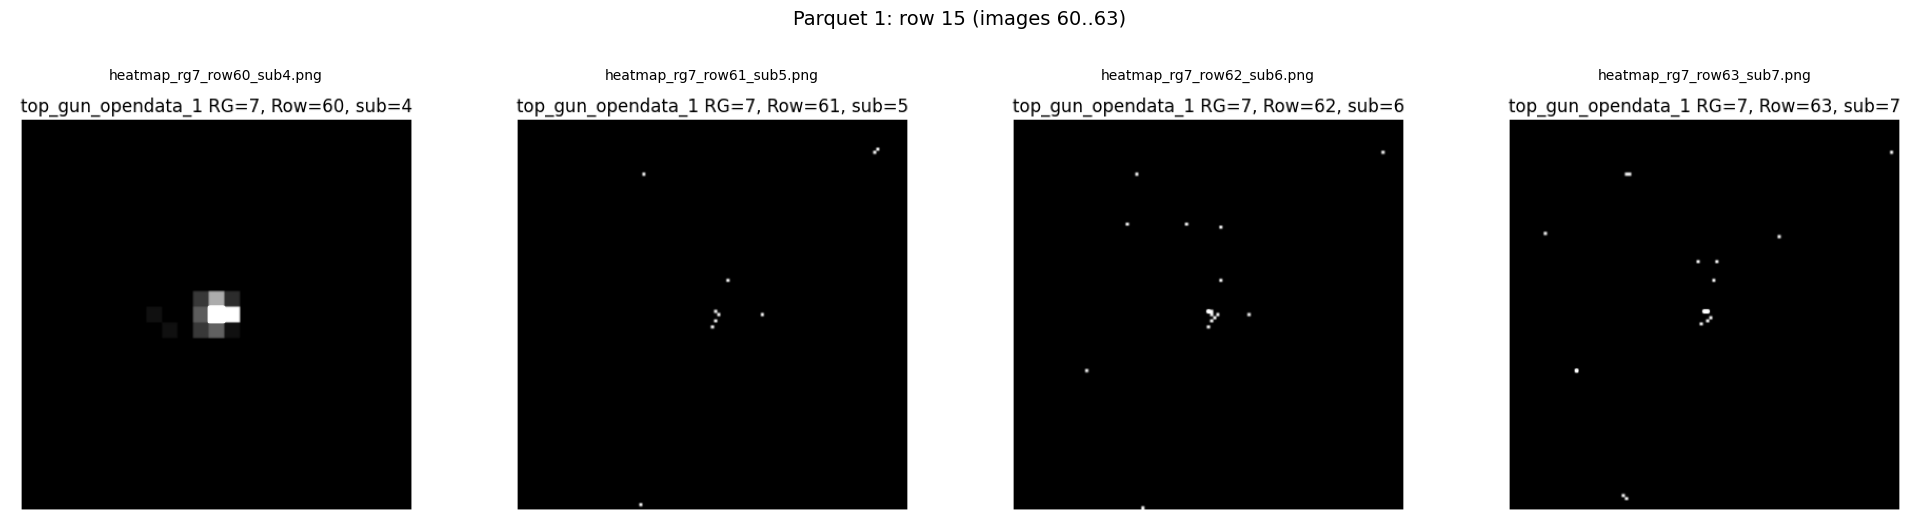

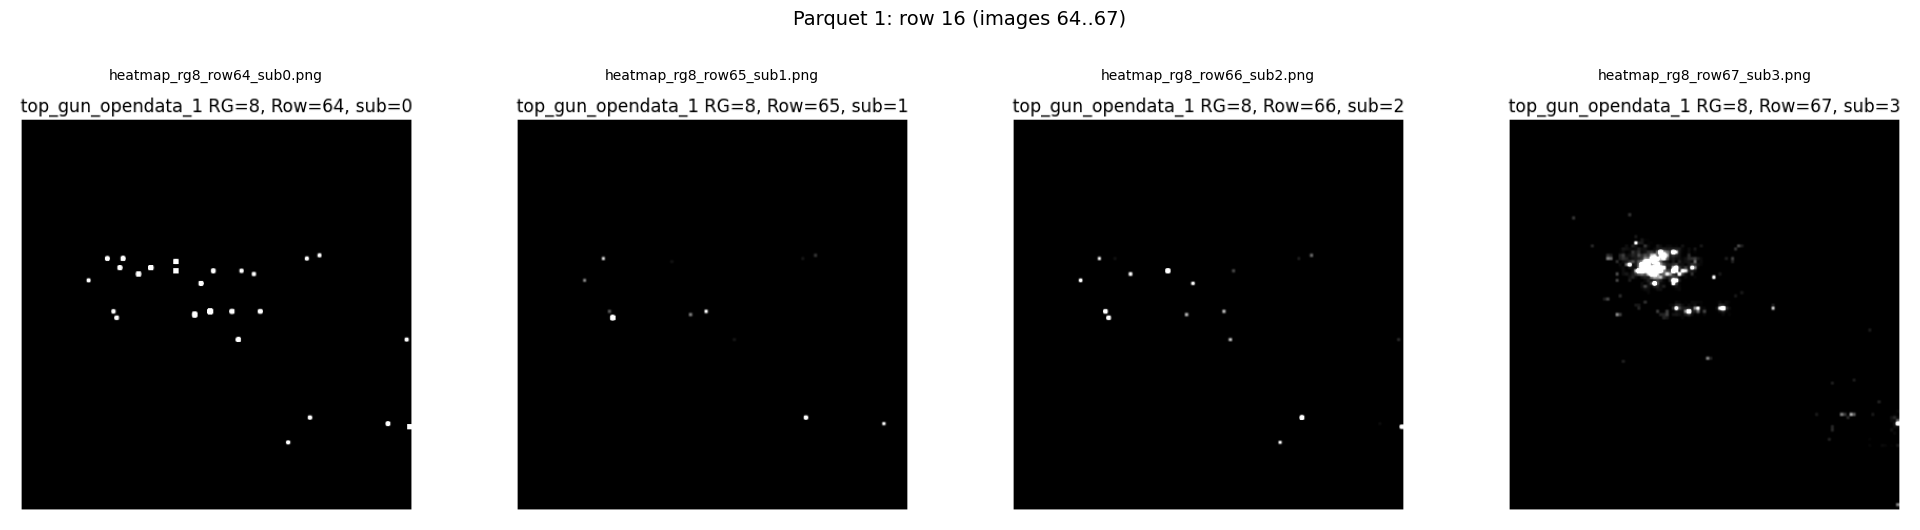

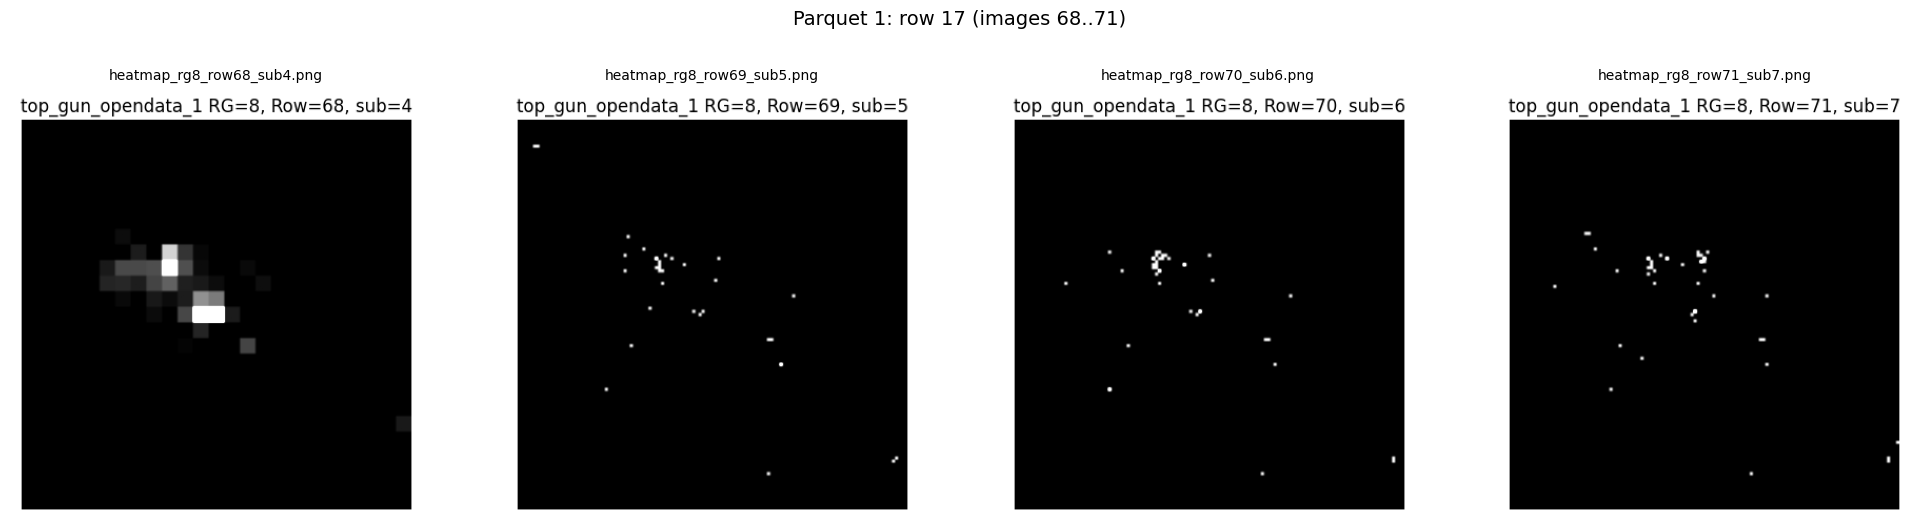

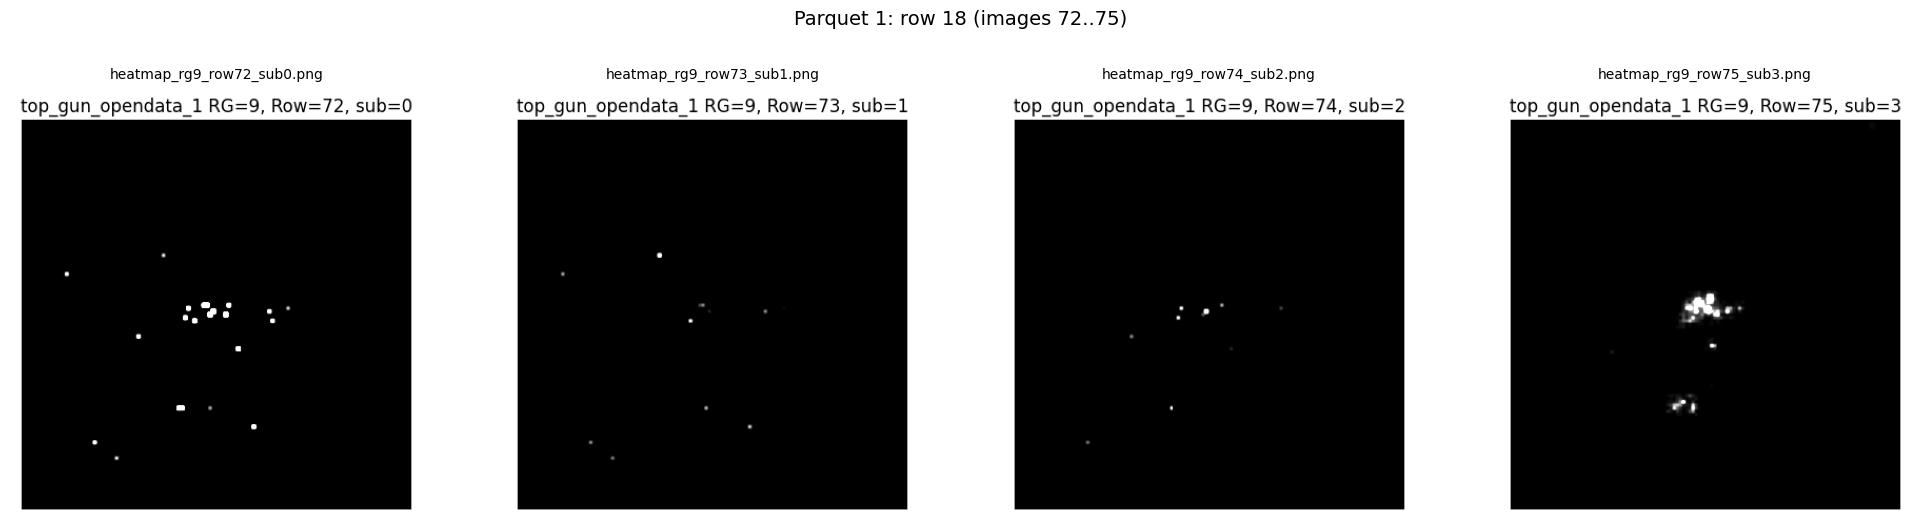

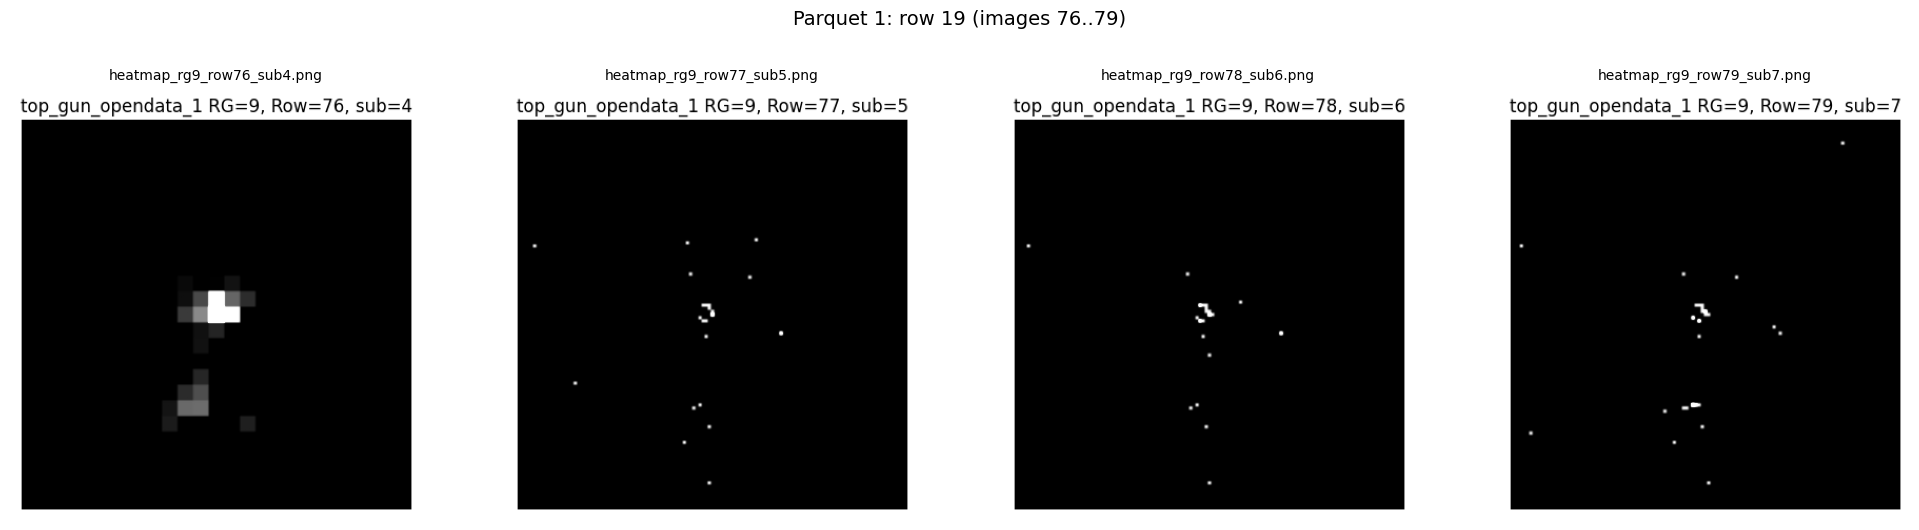


=== Parquet file index 2 ===
Found 80 images in /kaggle/working/top_gun_opendata_2/Images


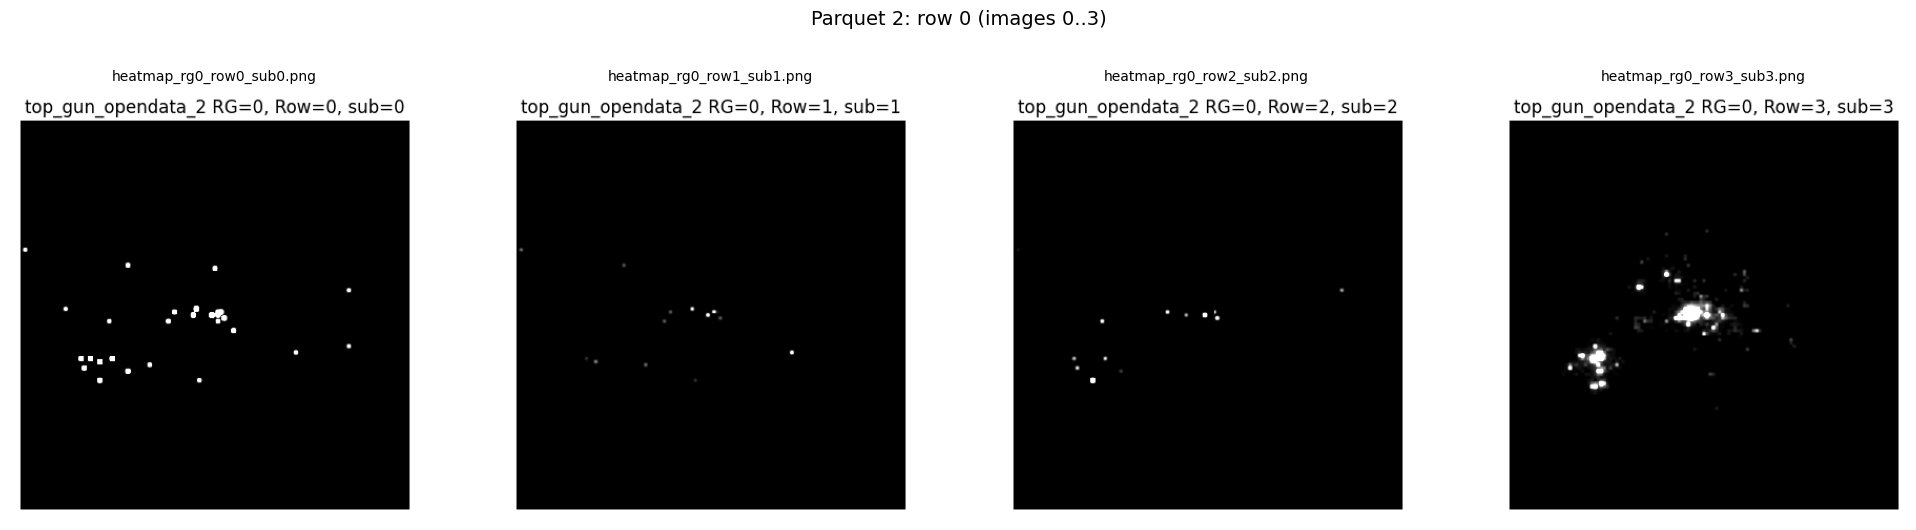

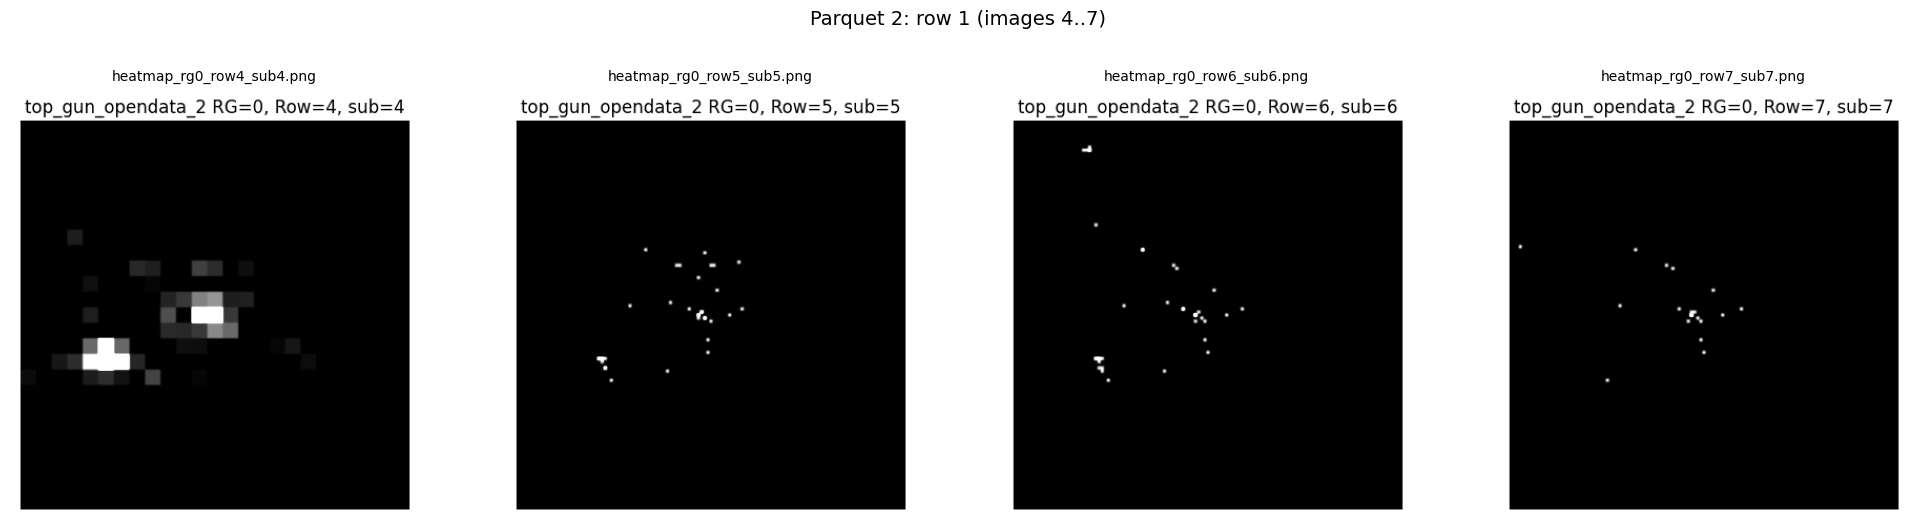

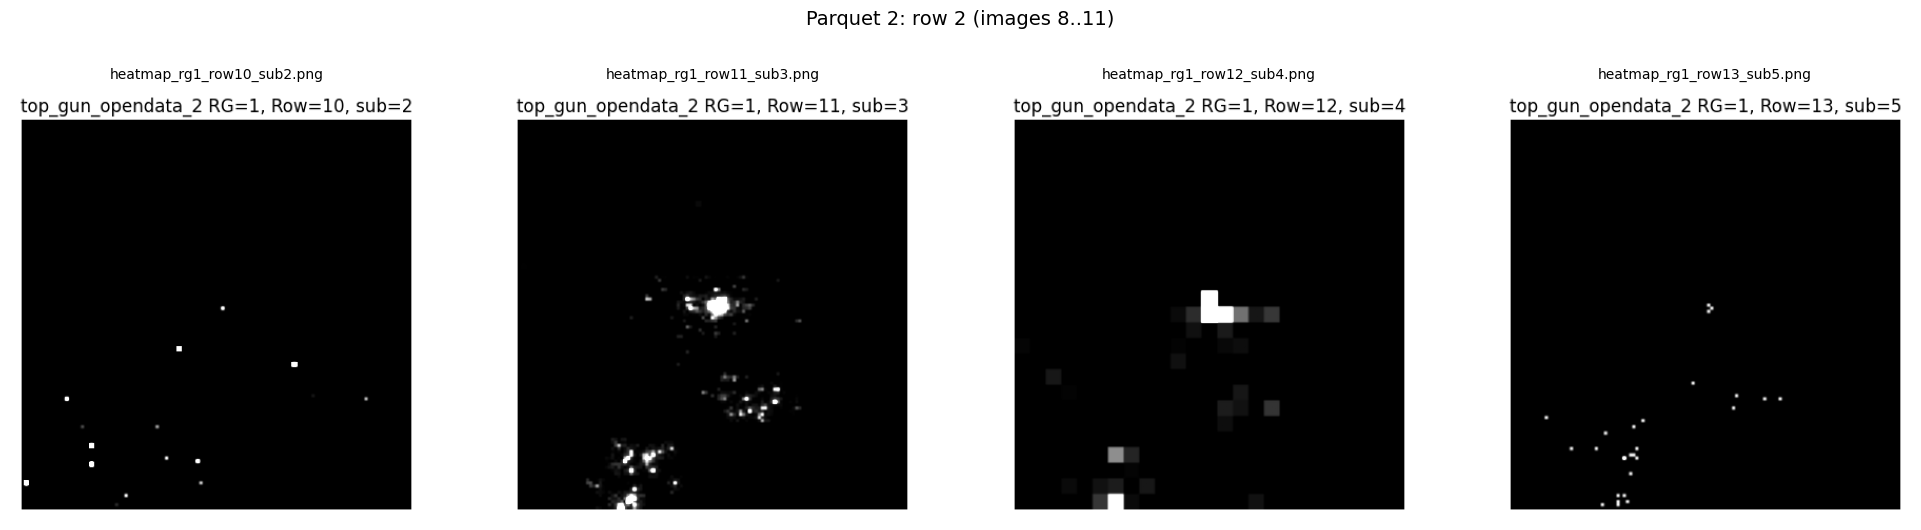

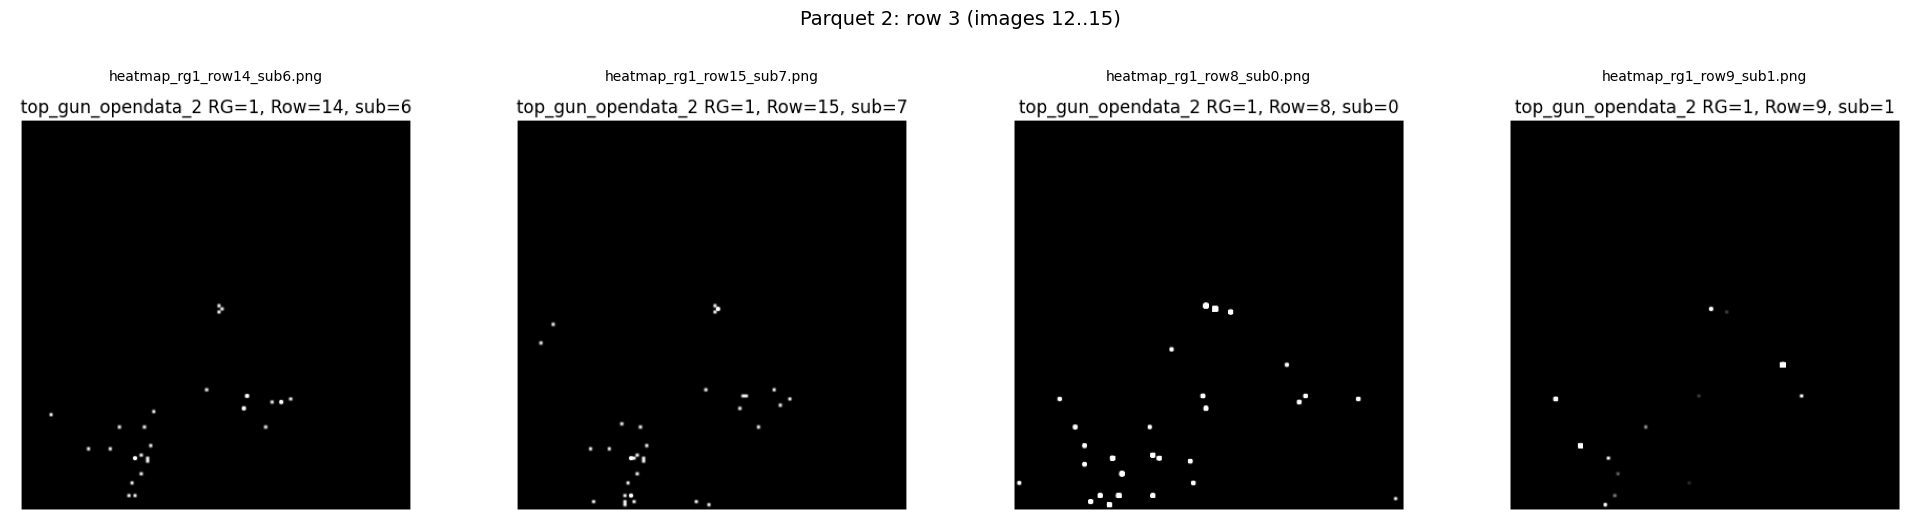

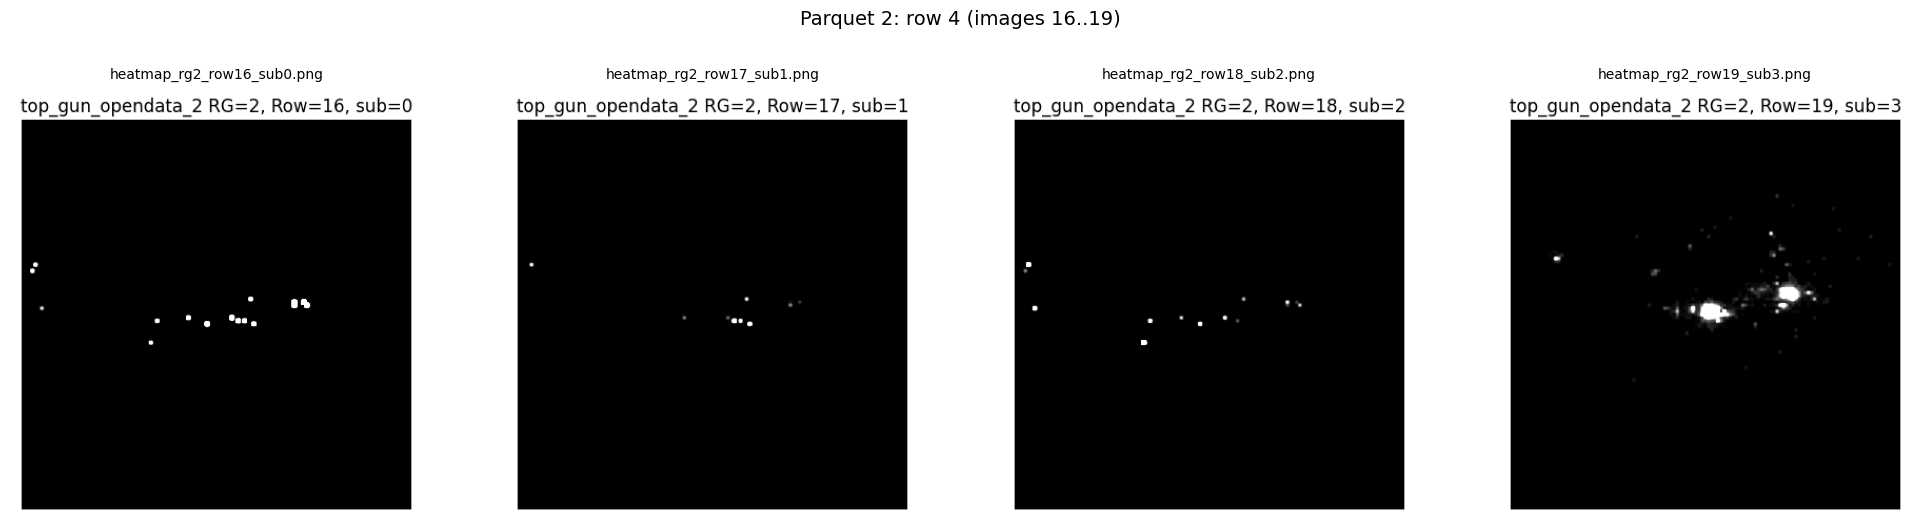

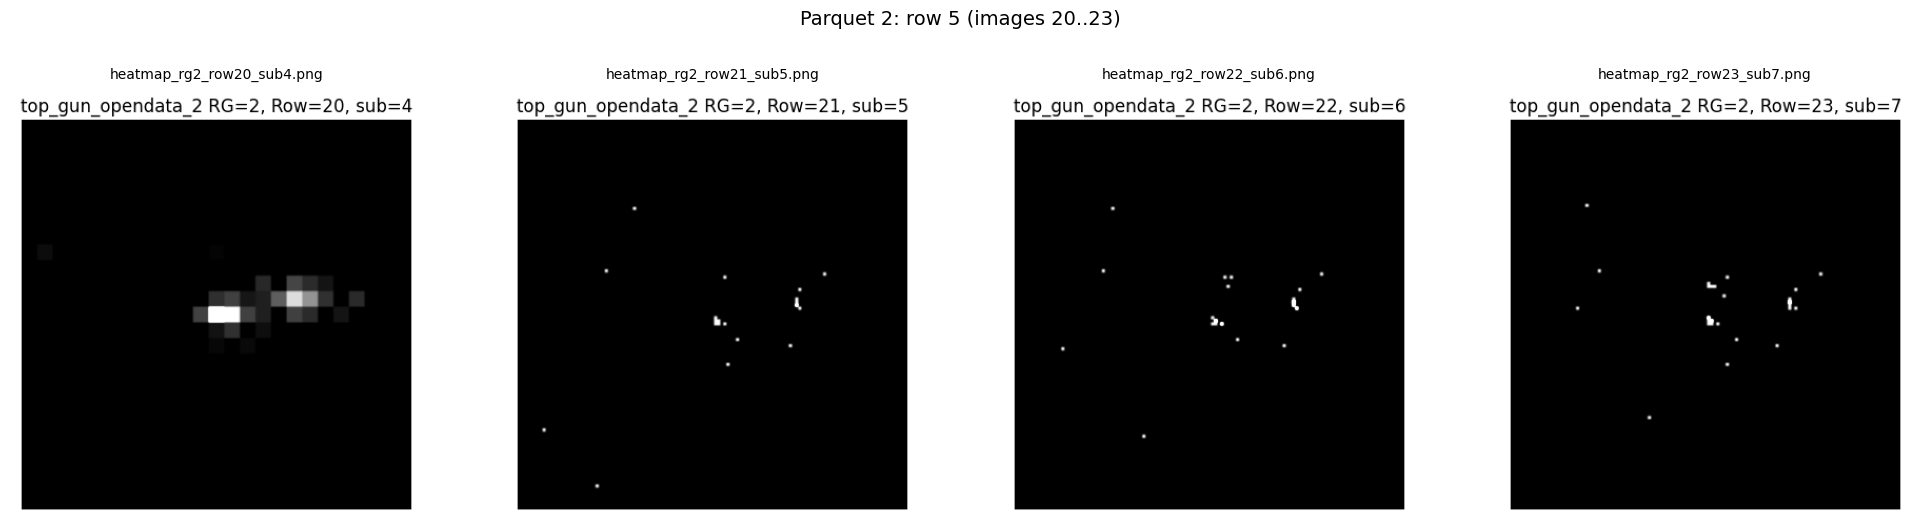

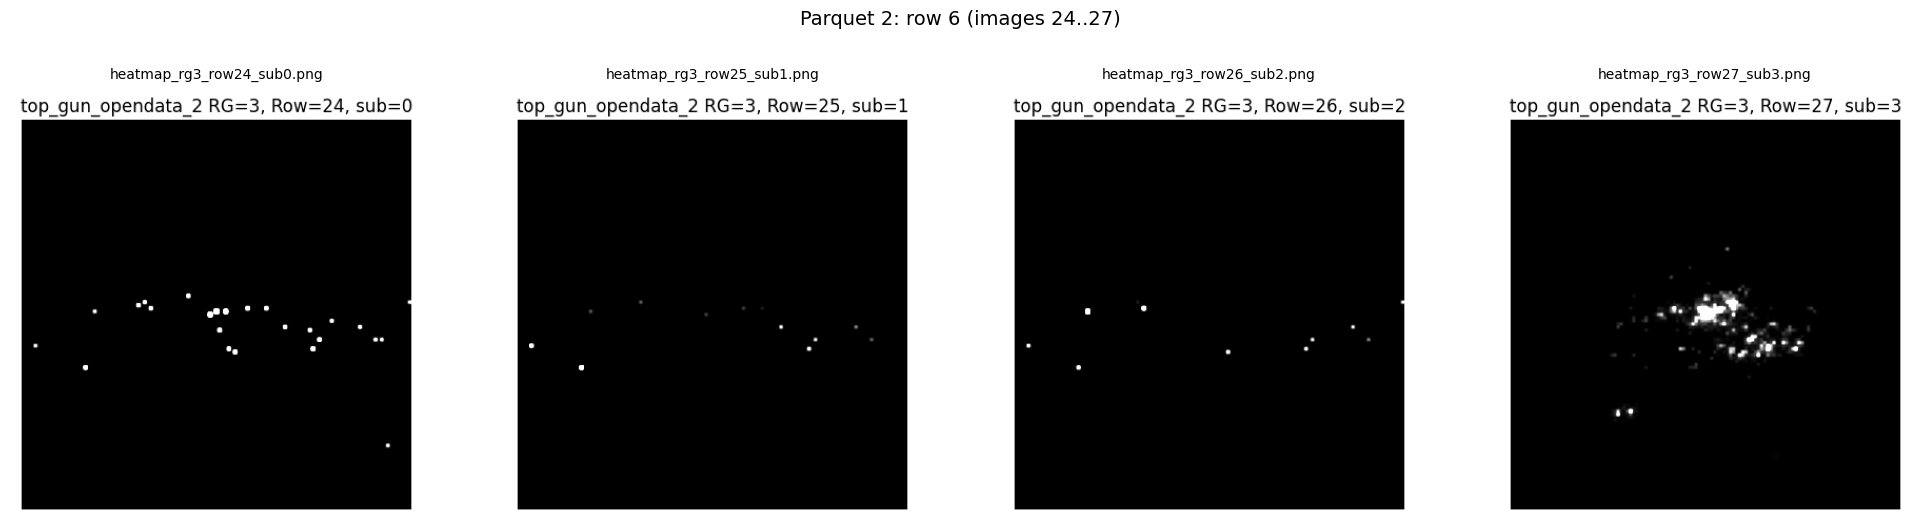

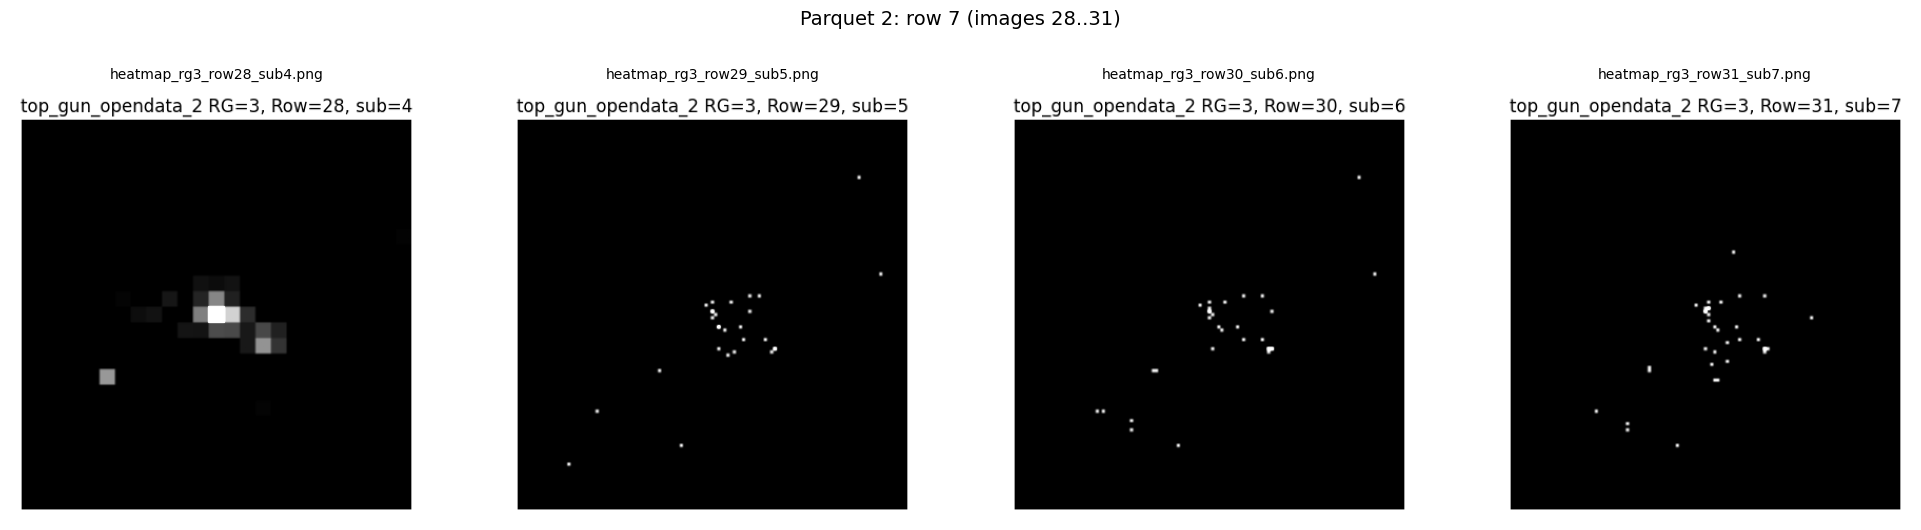

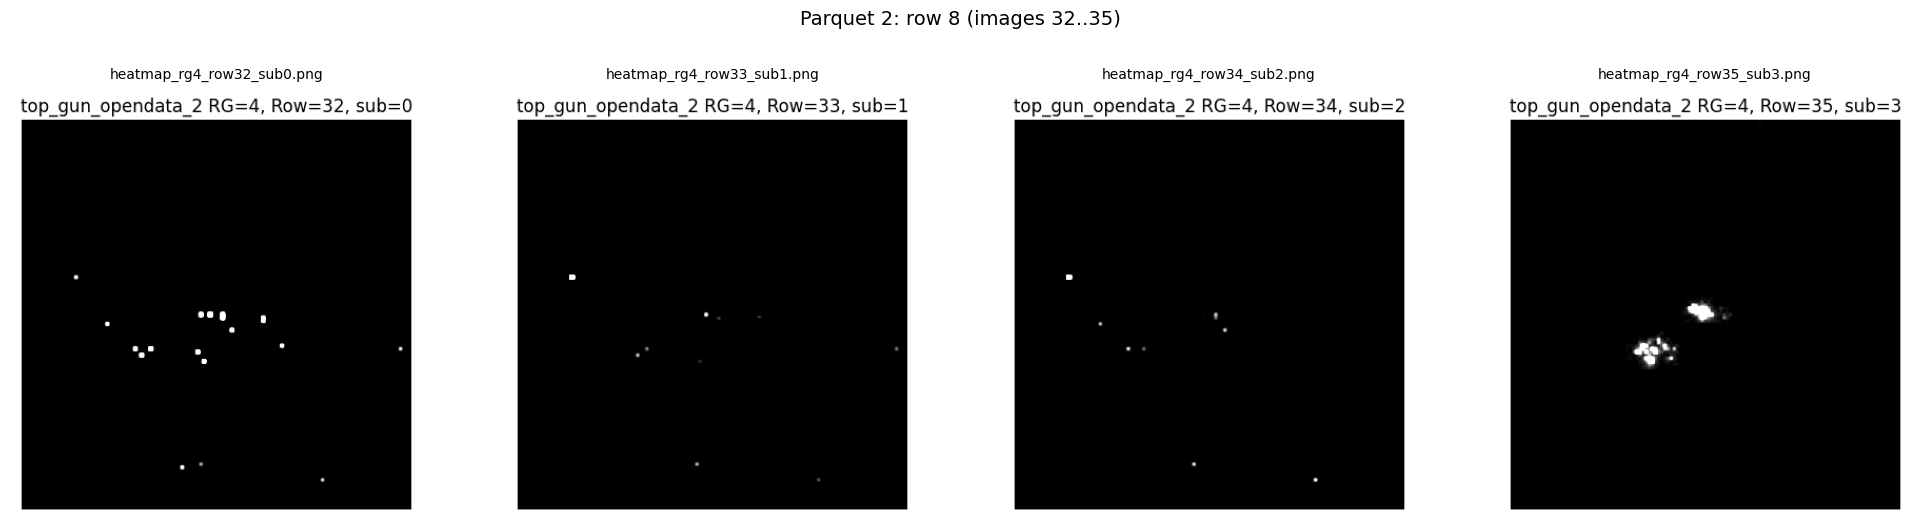

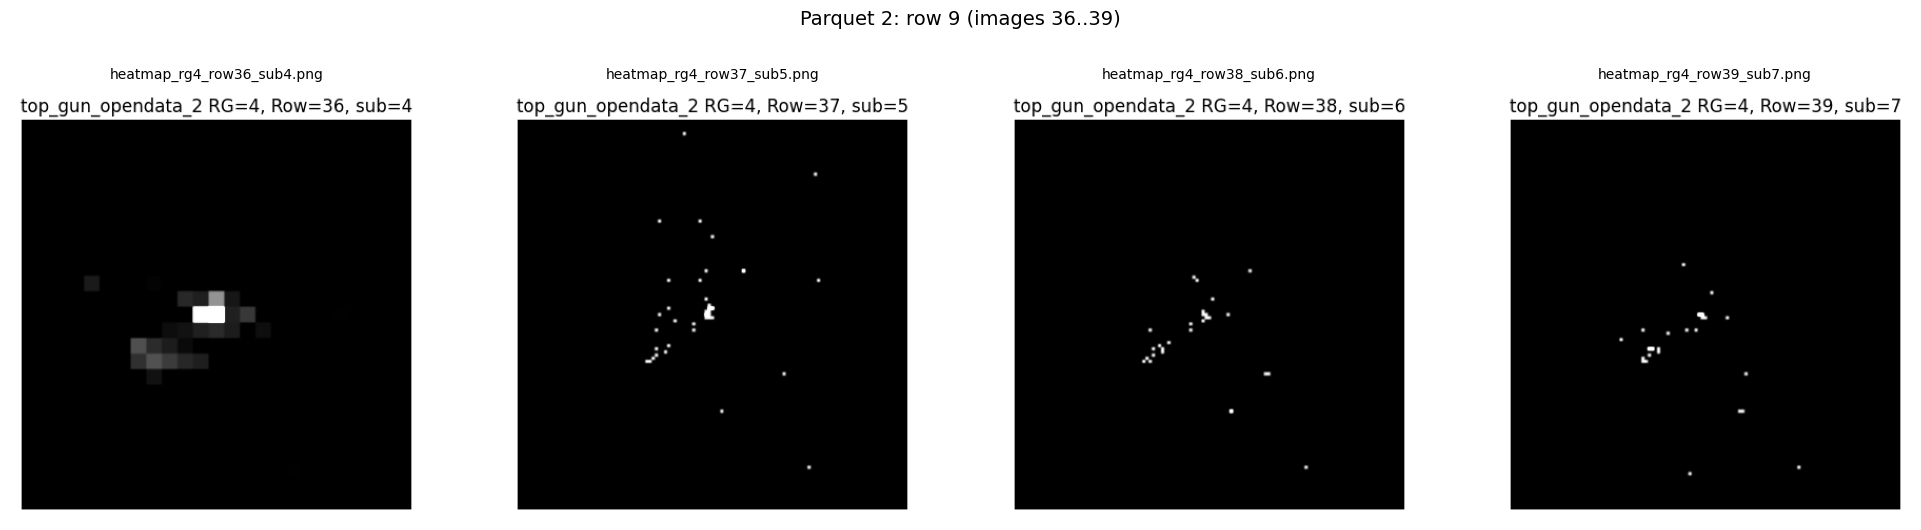

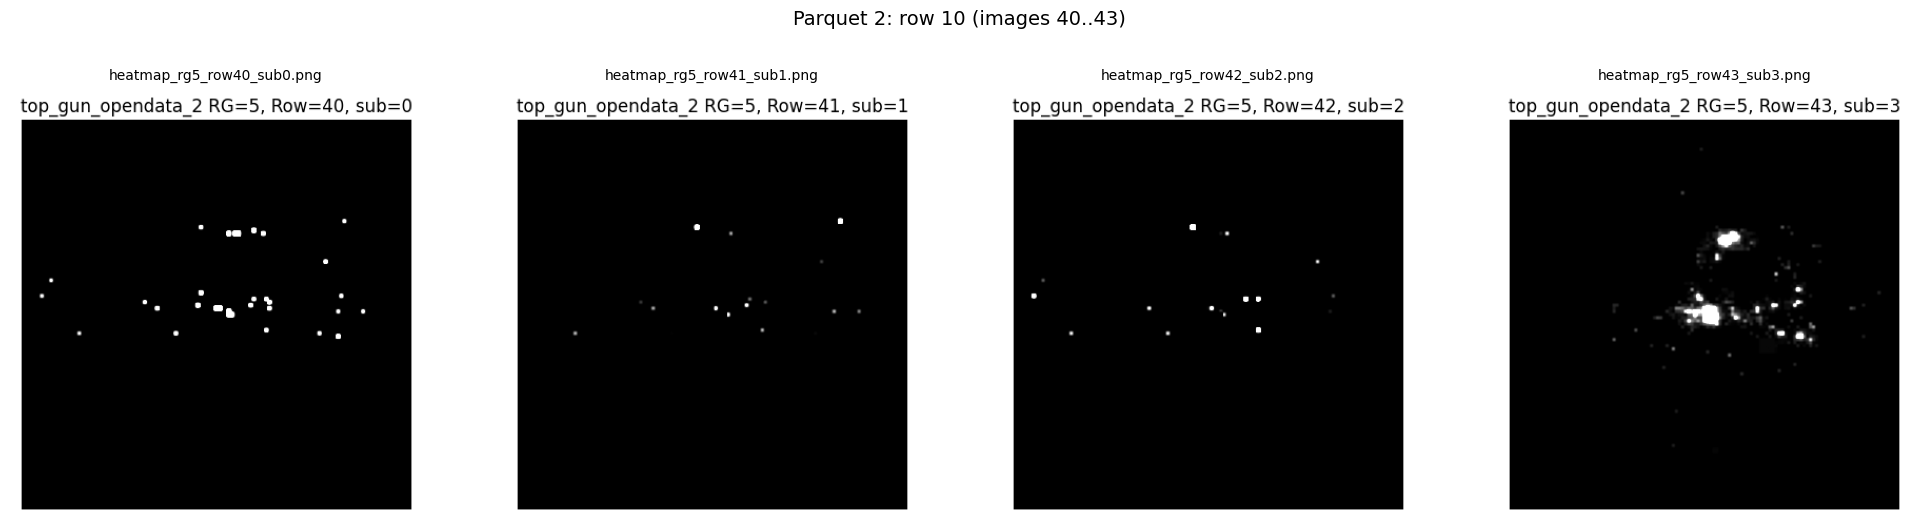

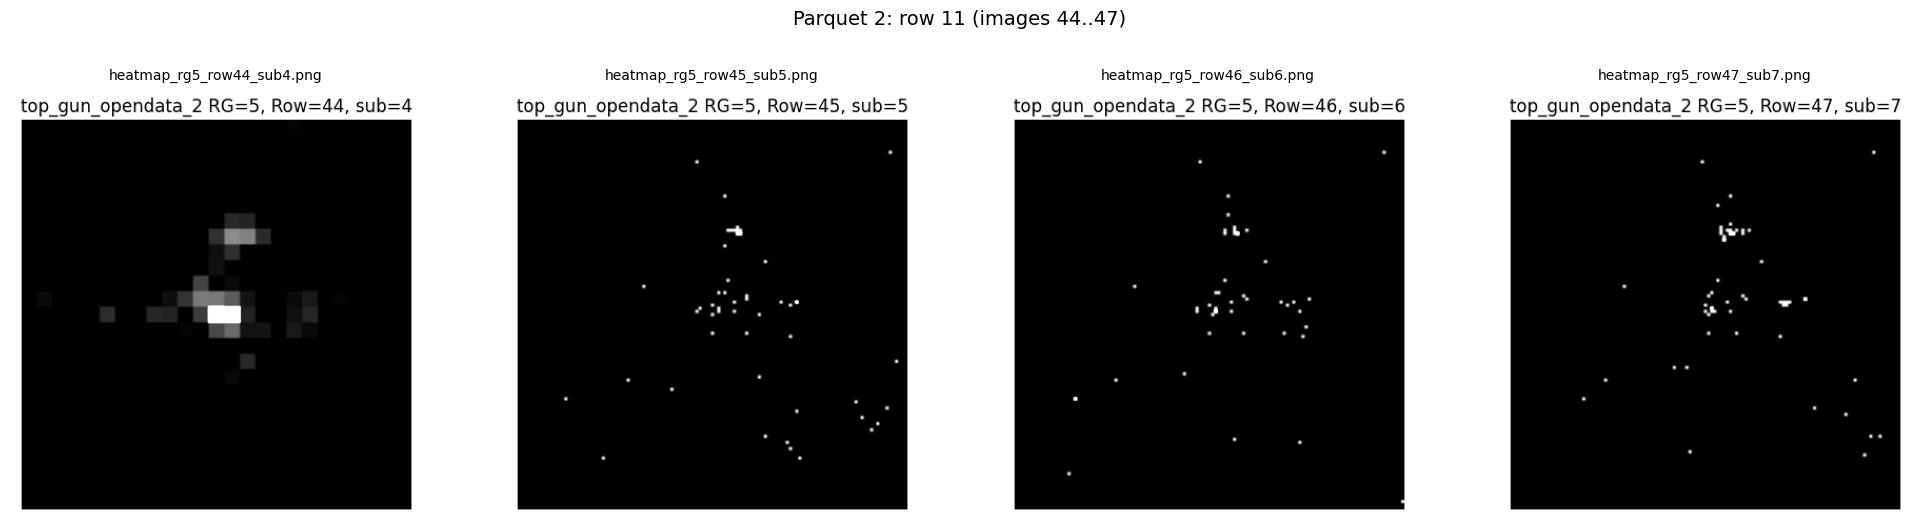

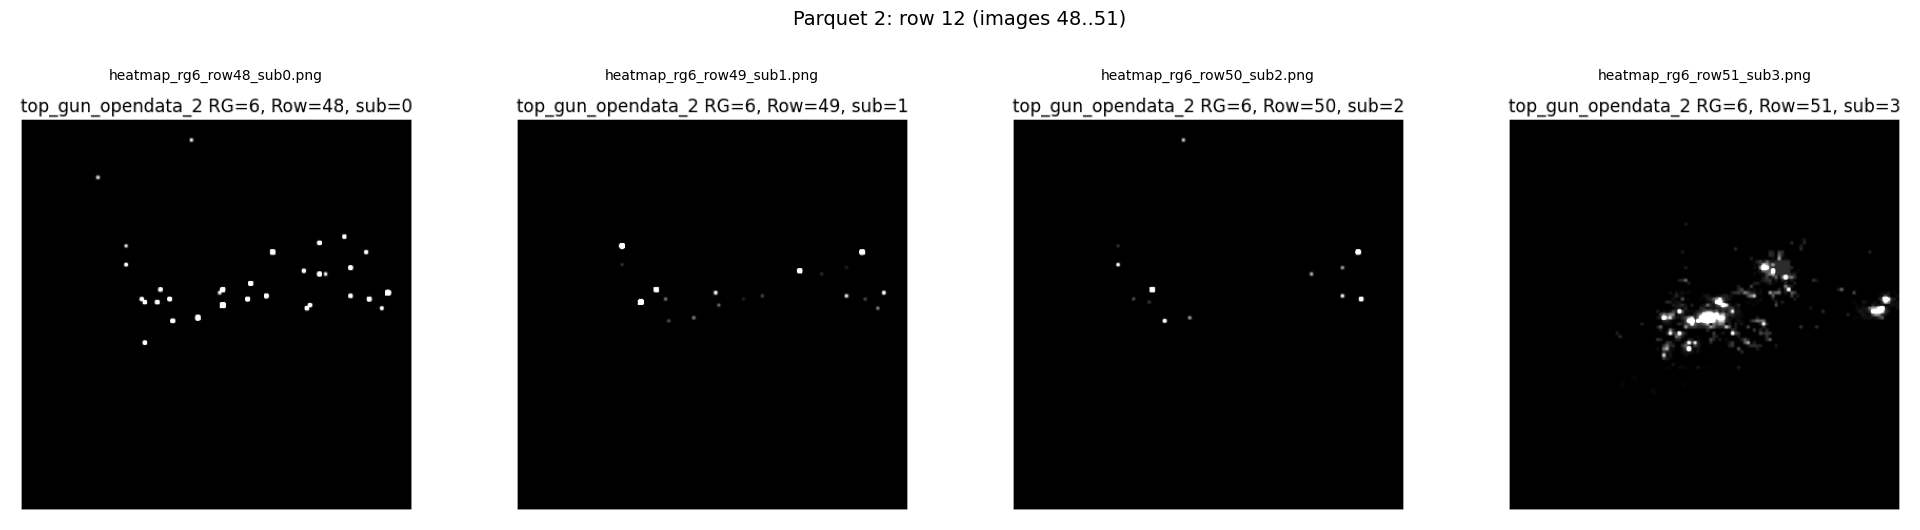

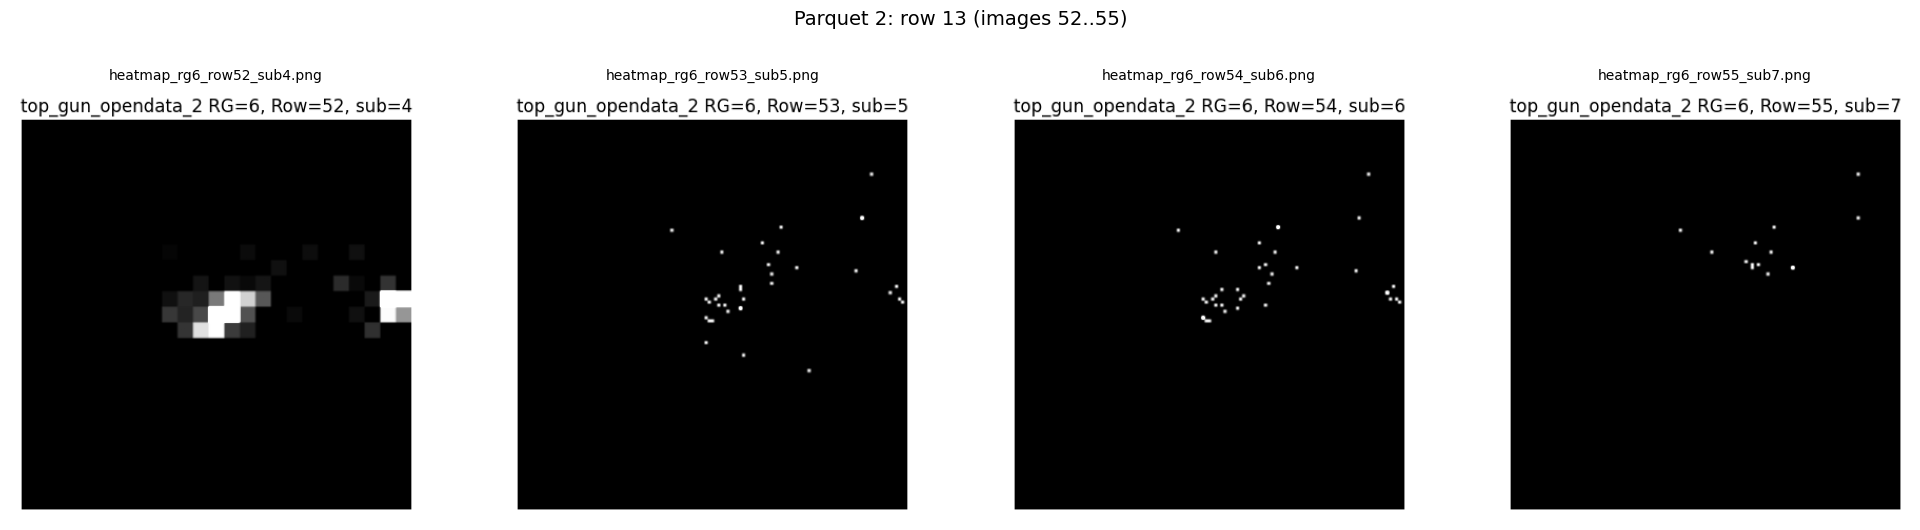

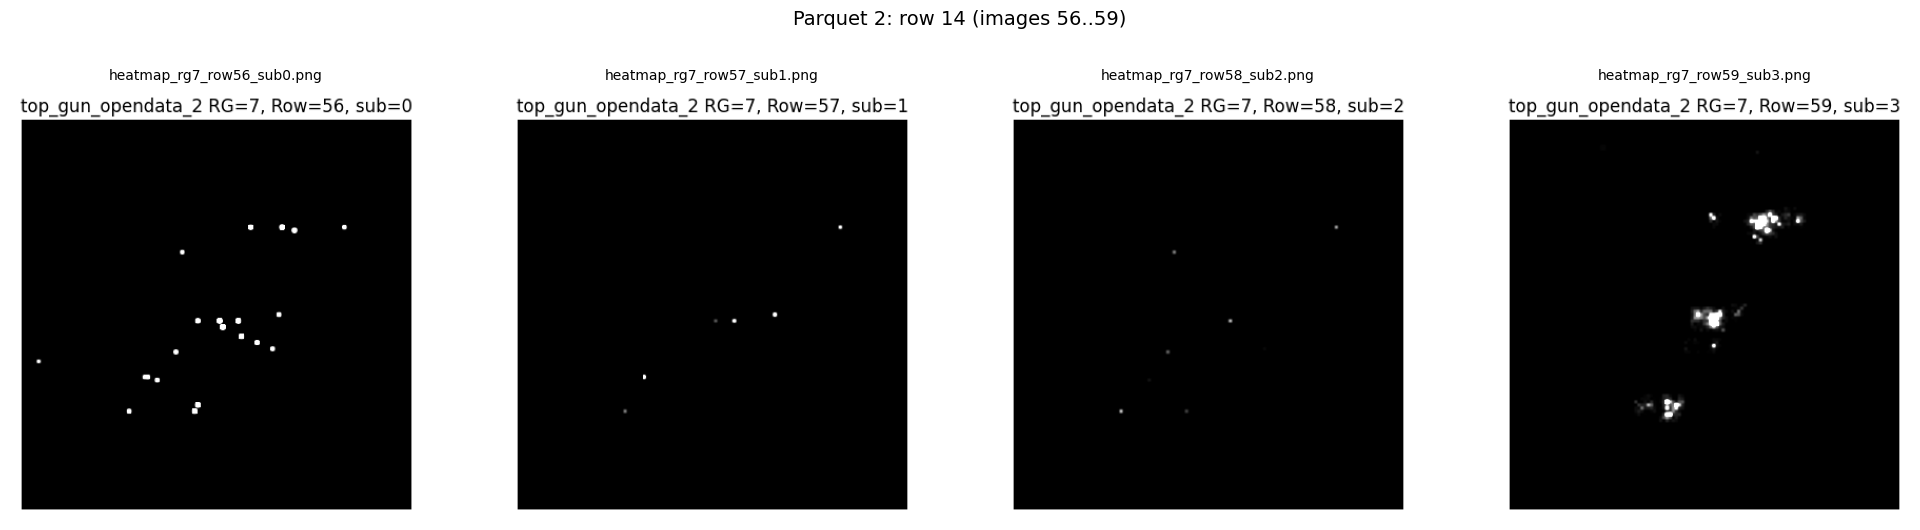

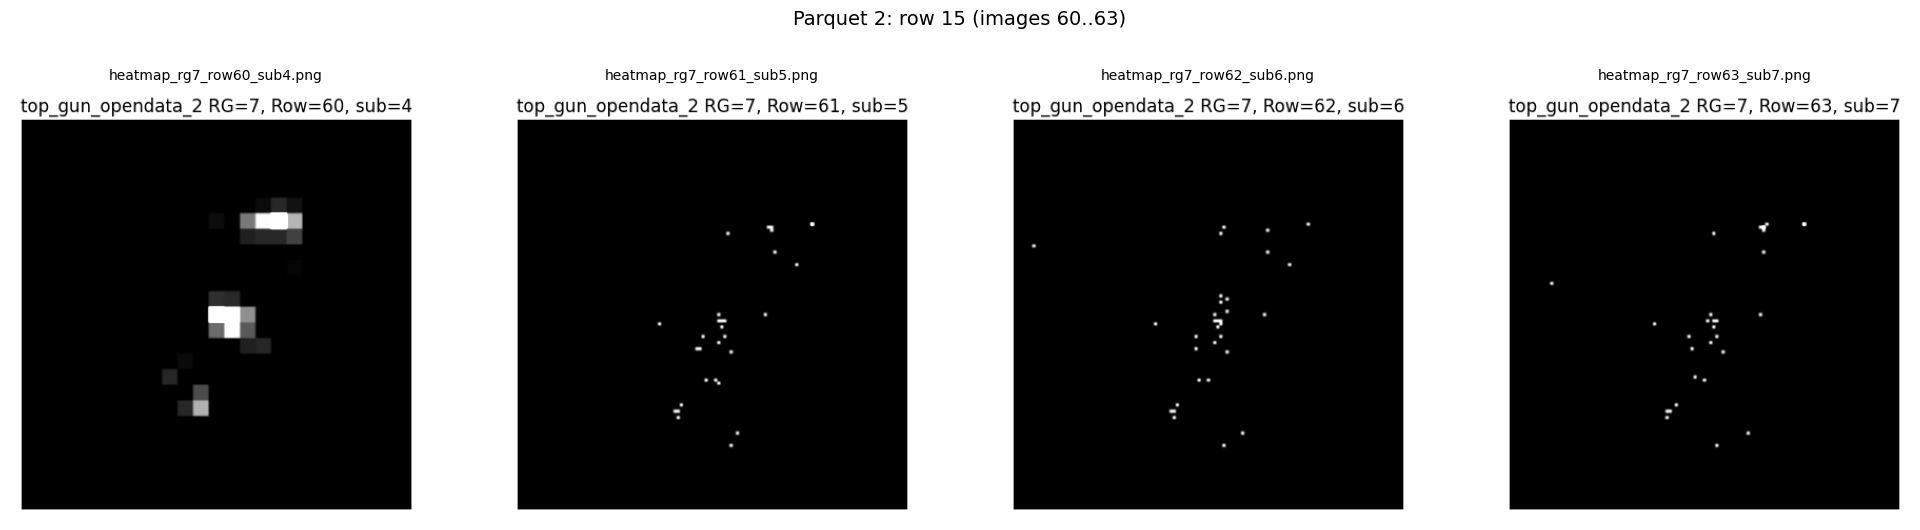

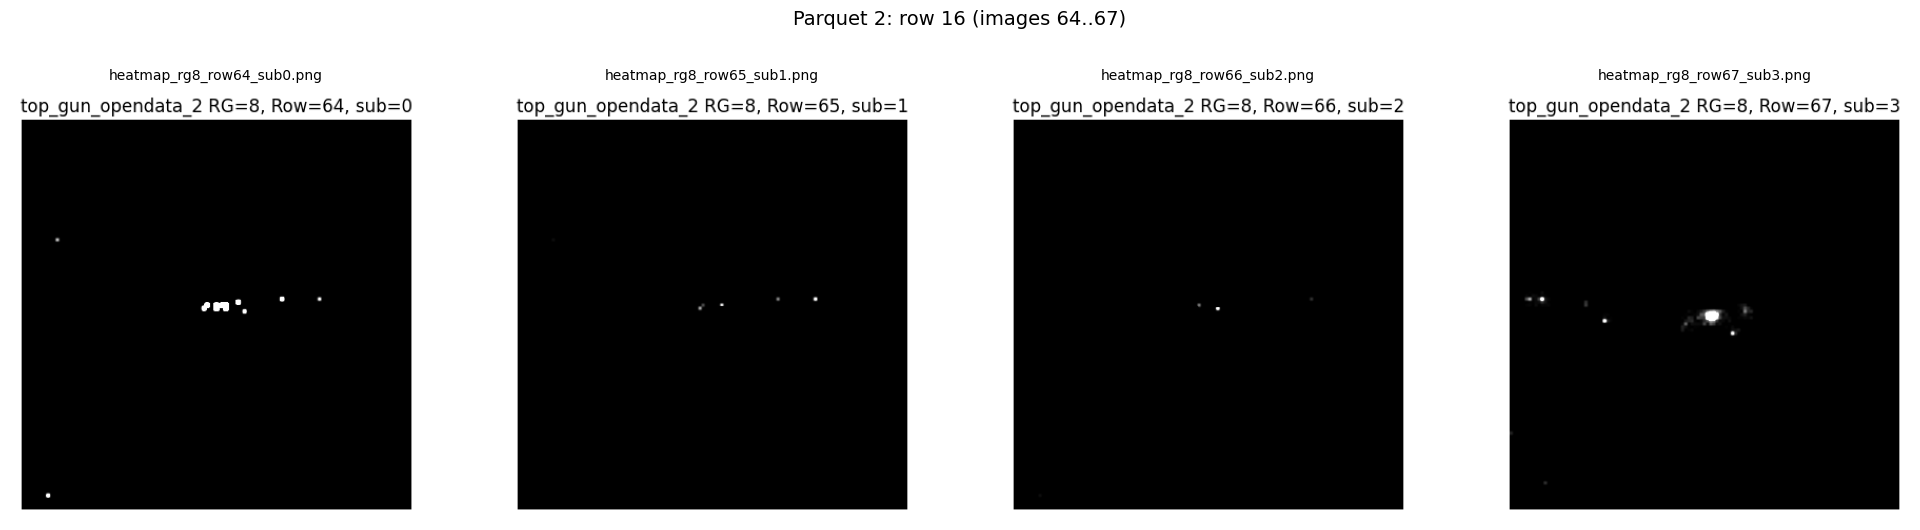

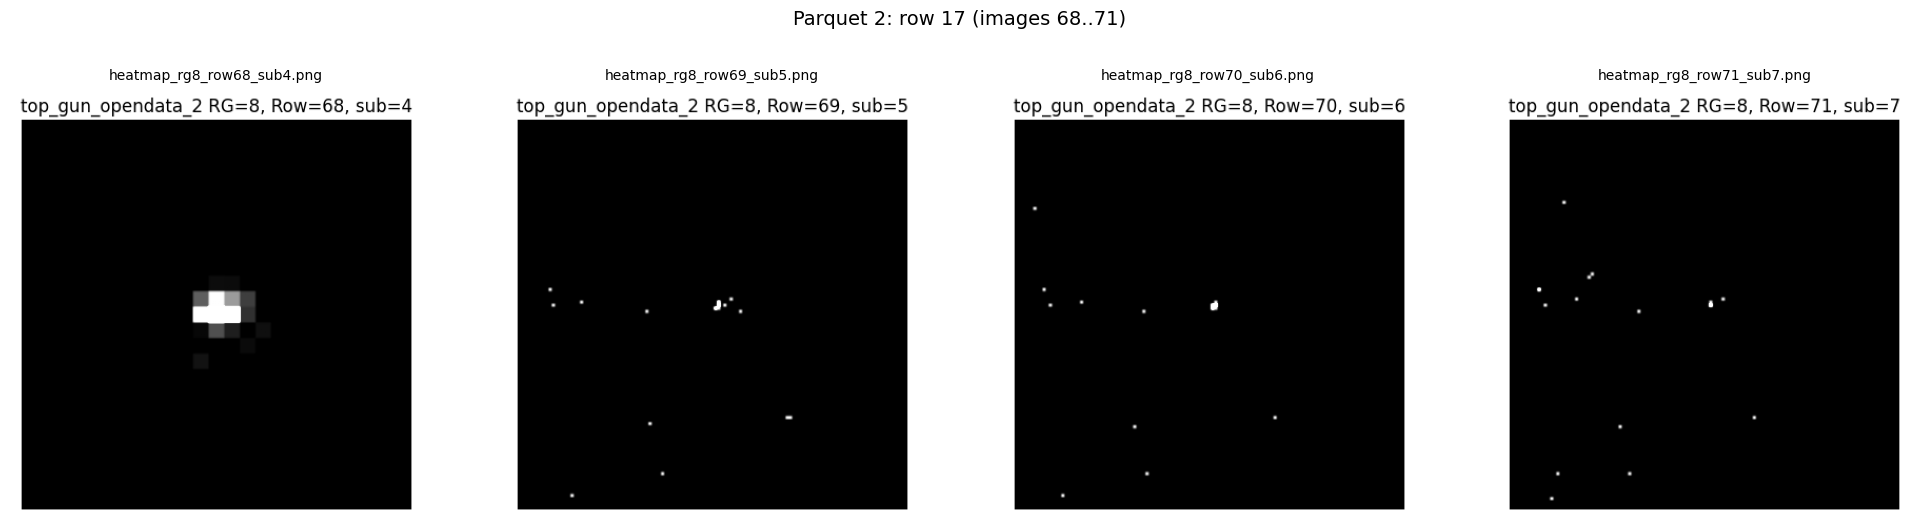

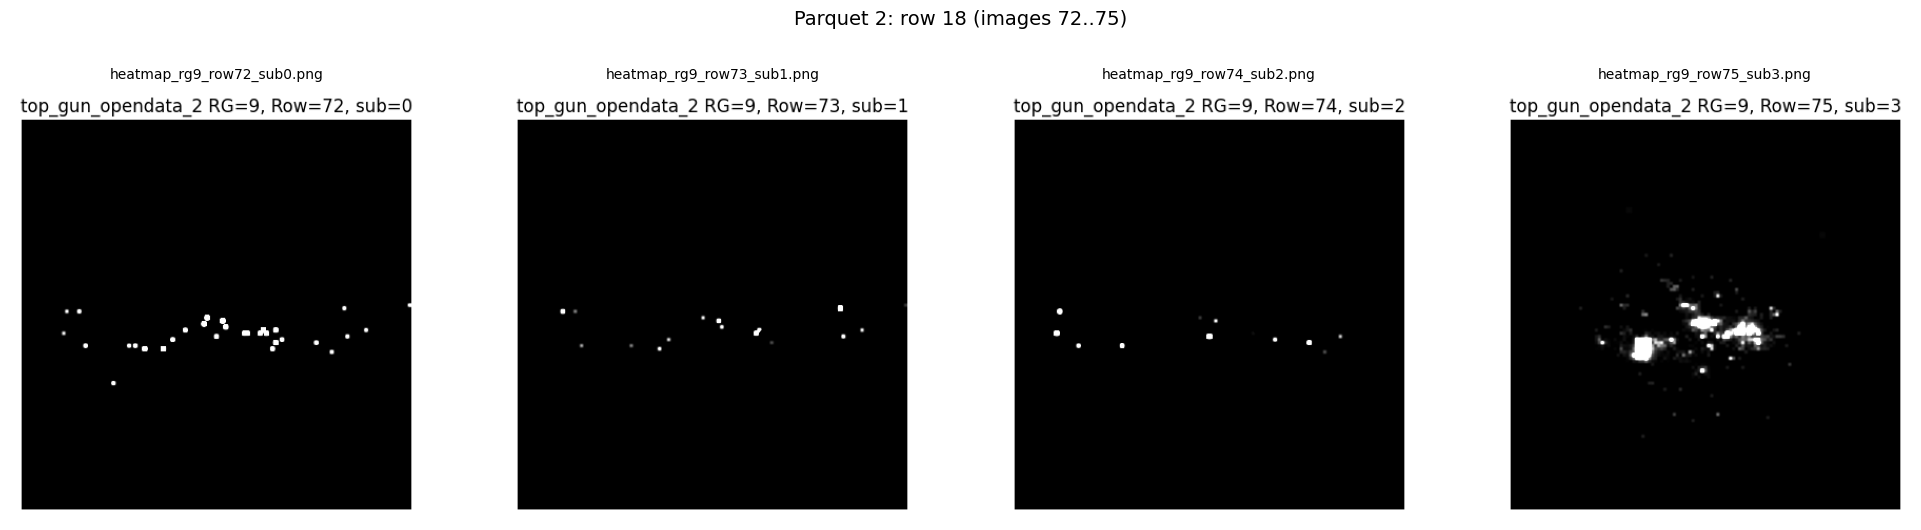

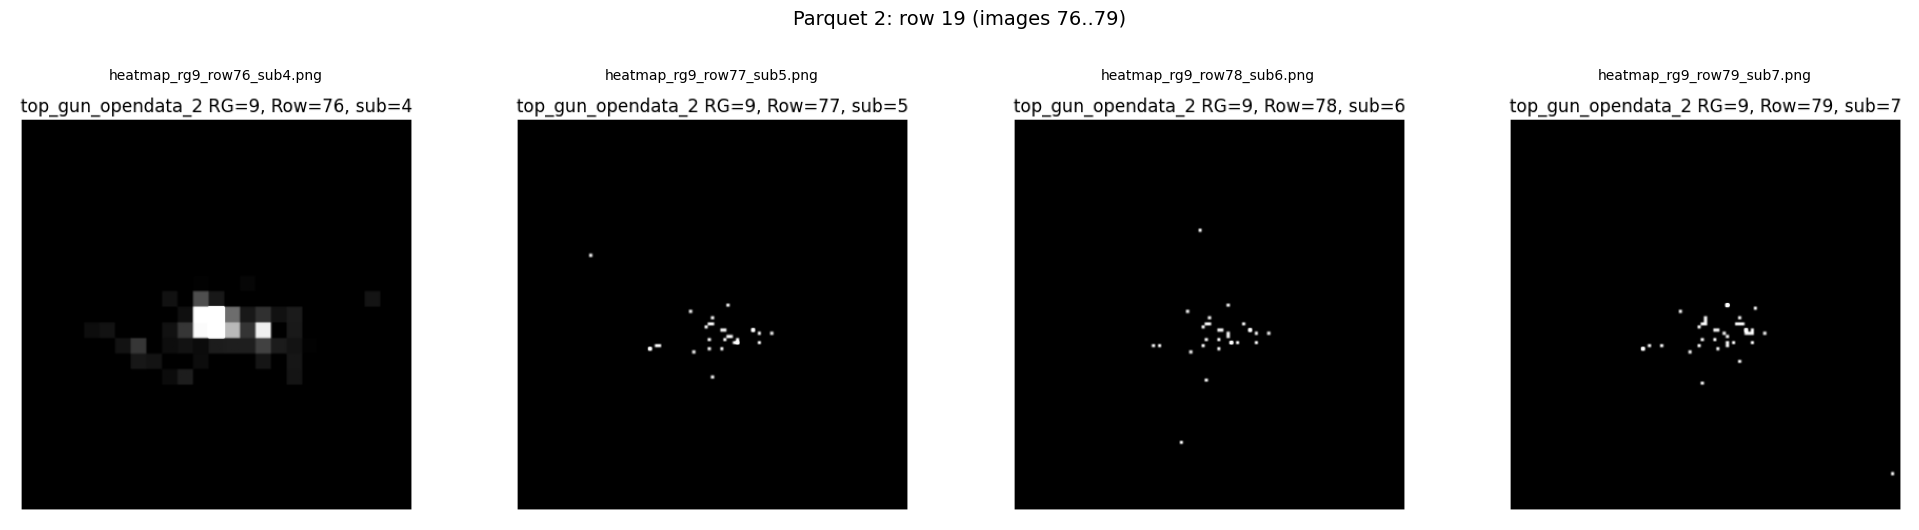


=== Parquet file index 3 ===
Found 80 images in /kaggle/working/top_gun_opendata_3/Images


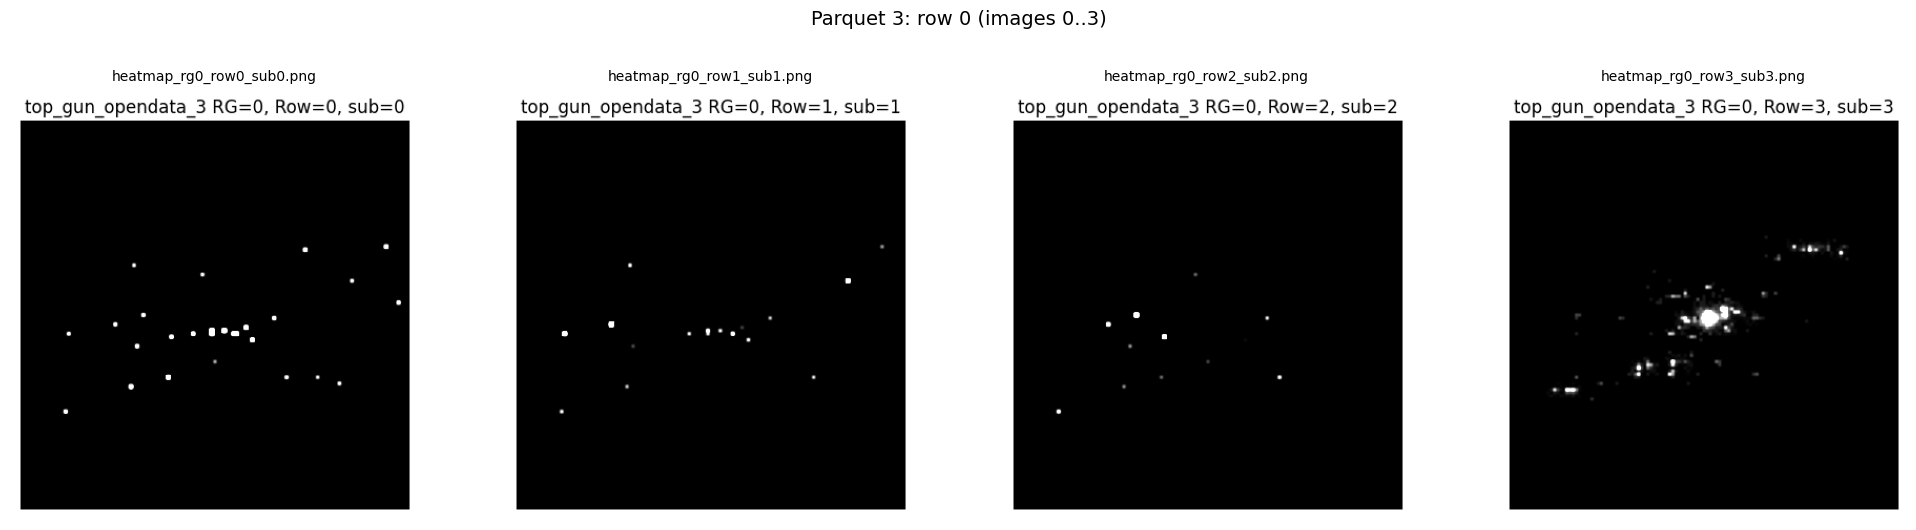

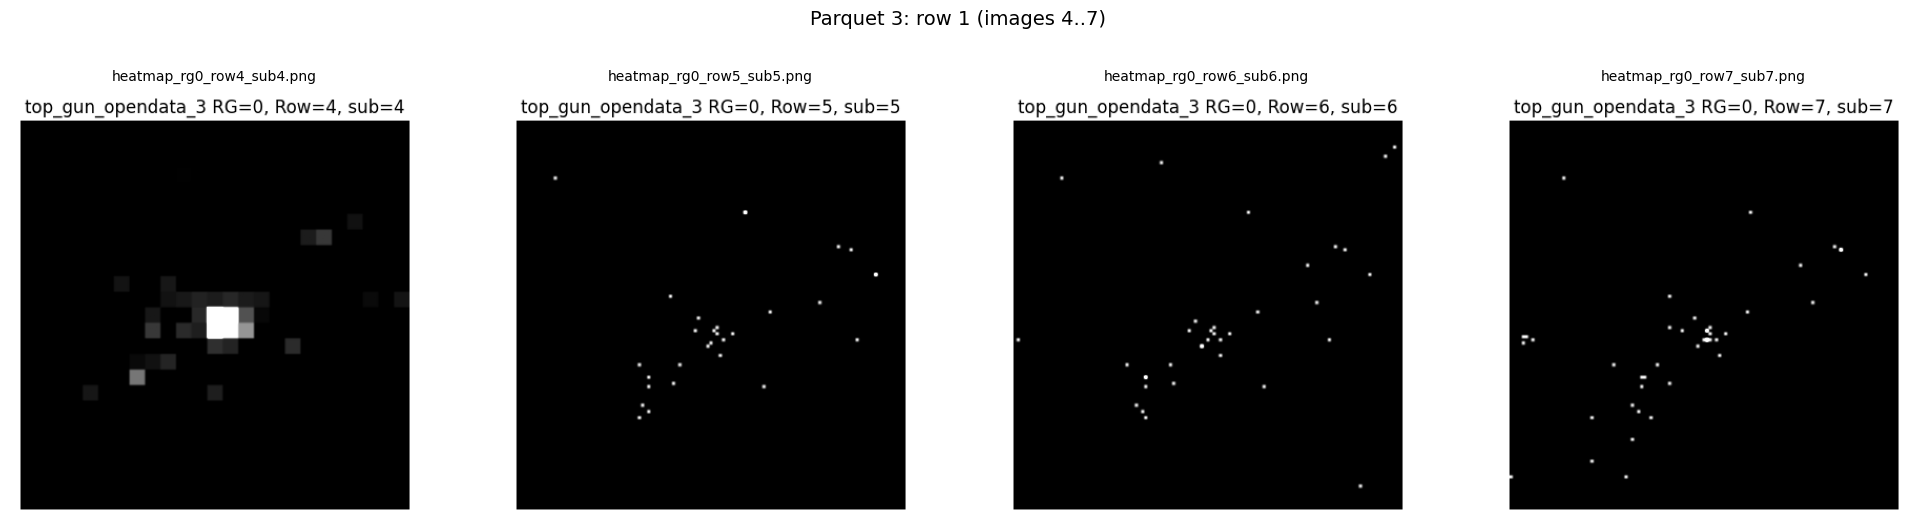

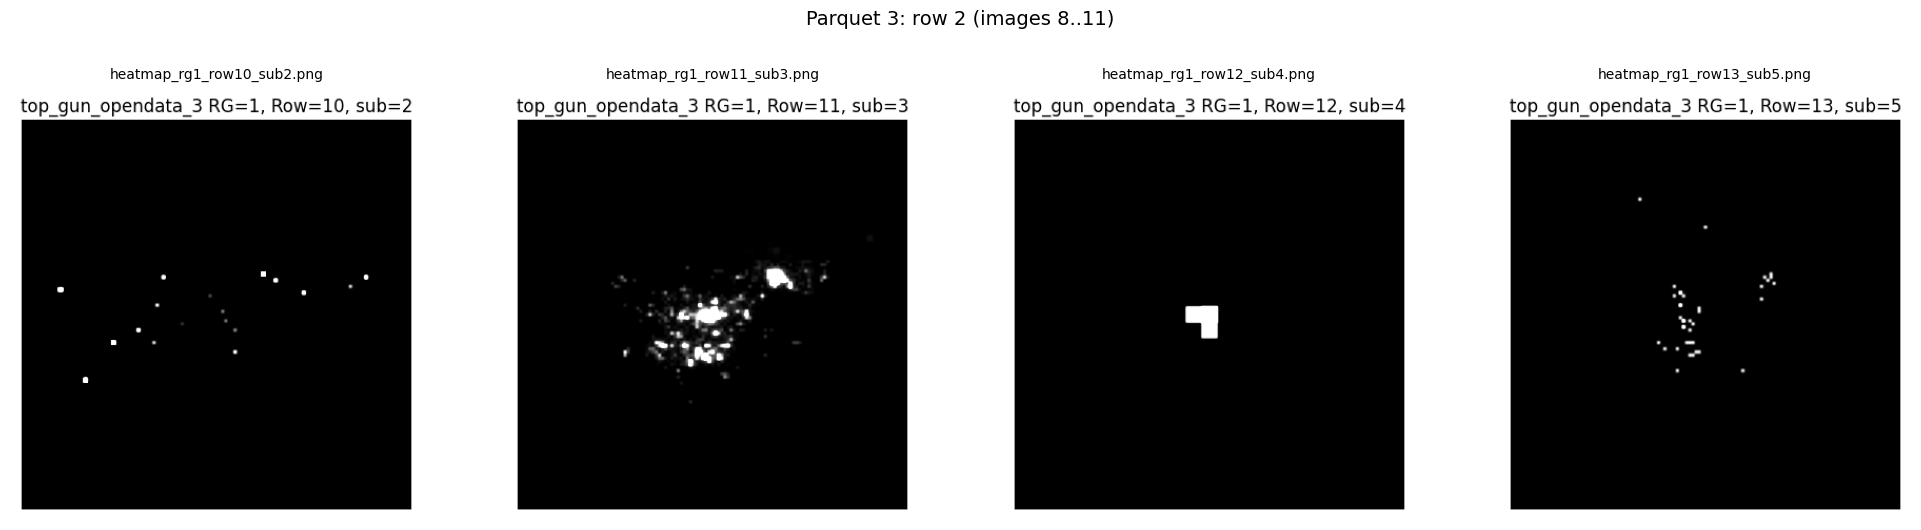

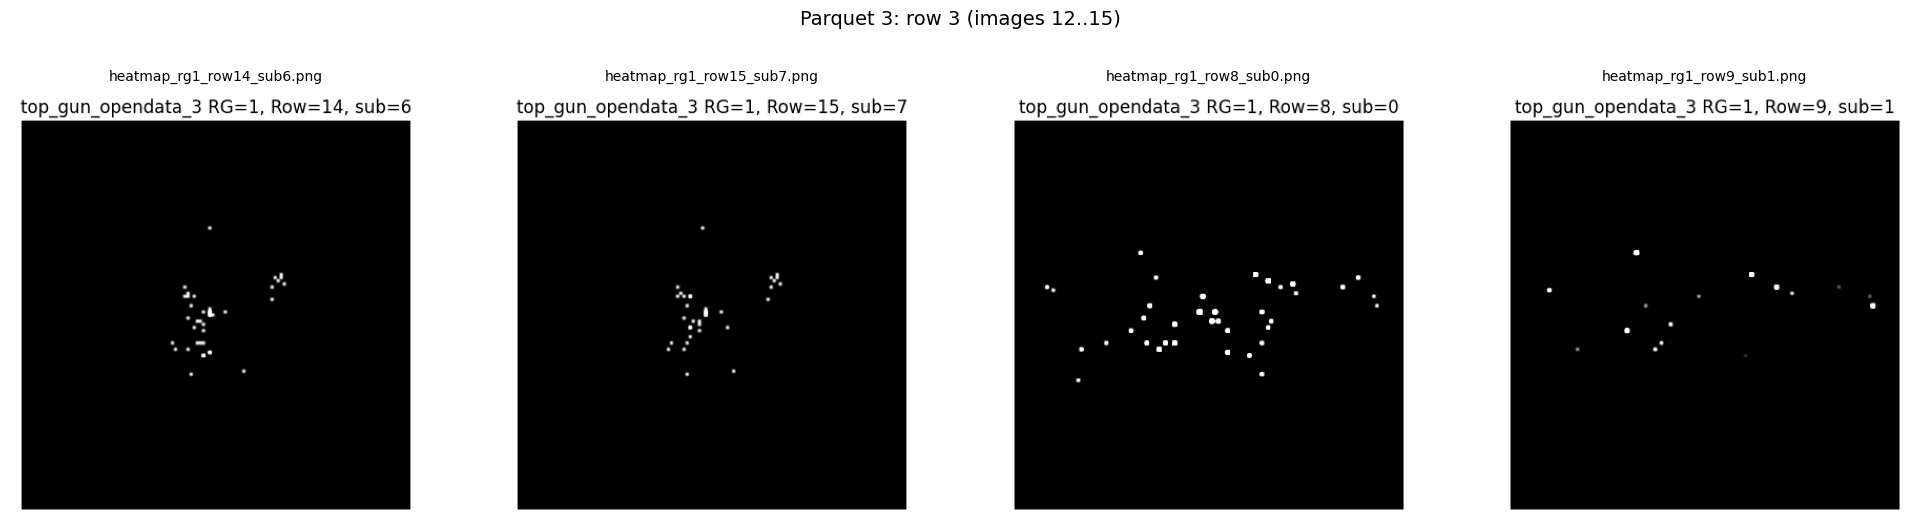

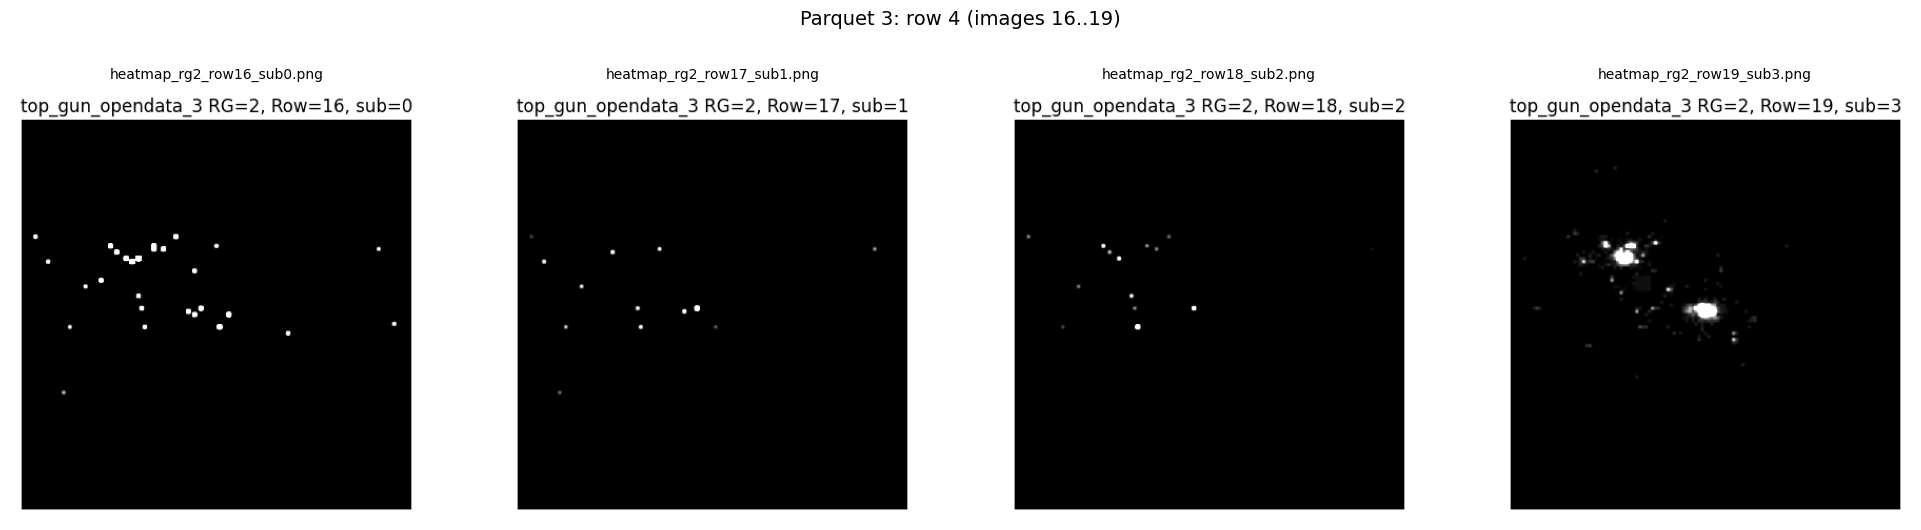

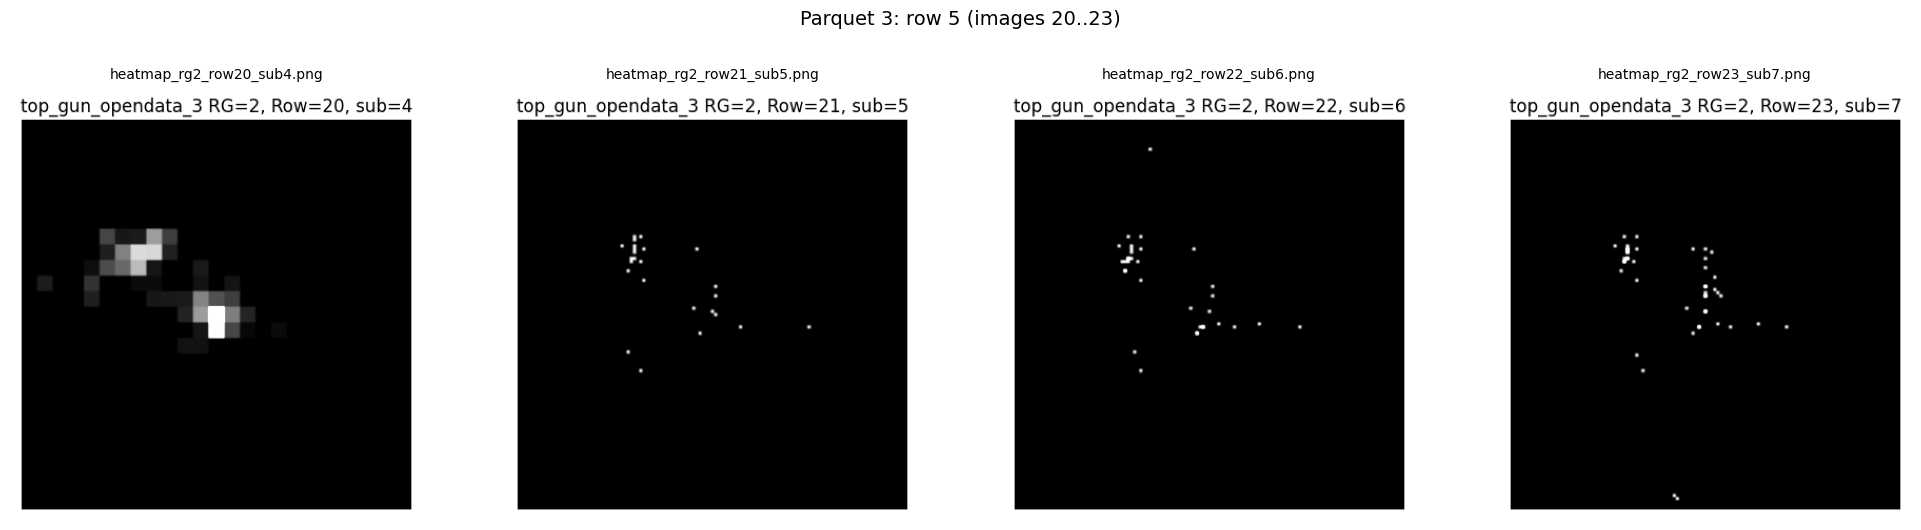

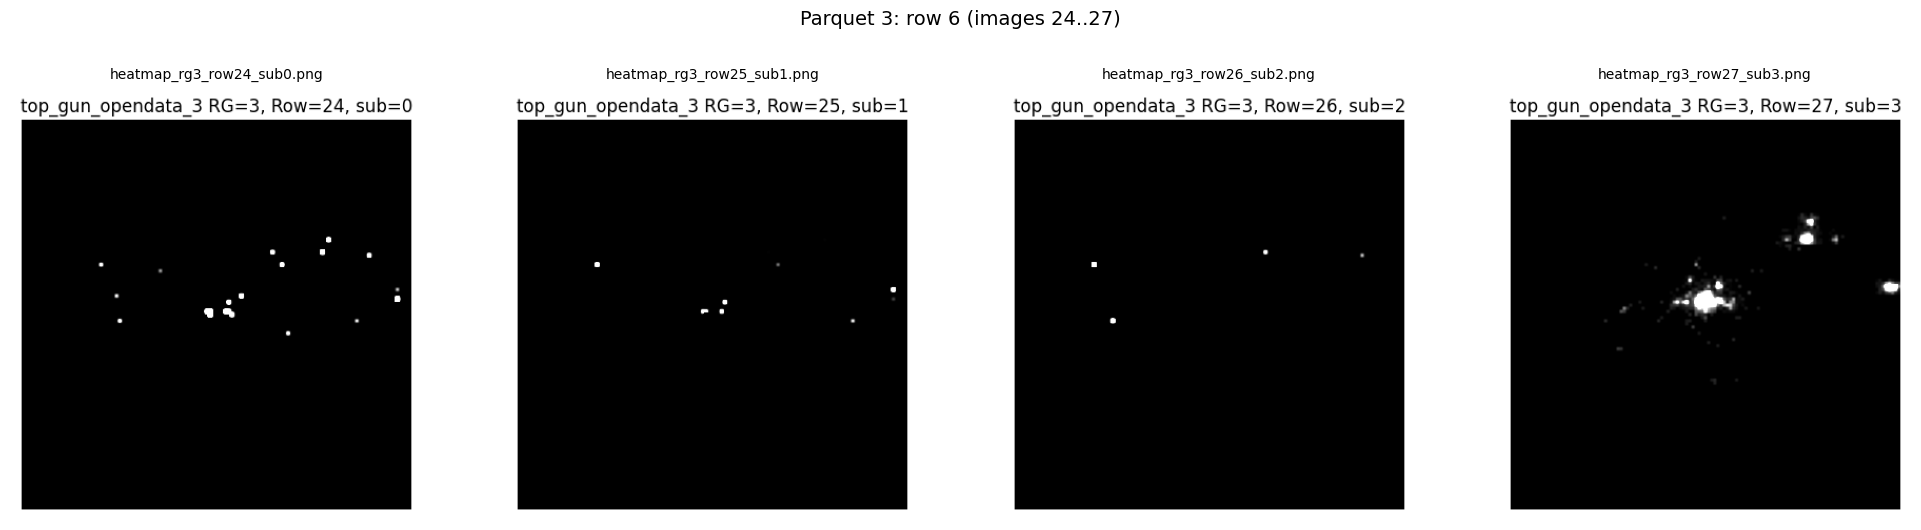

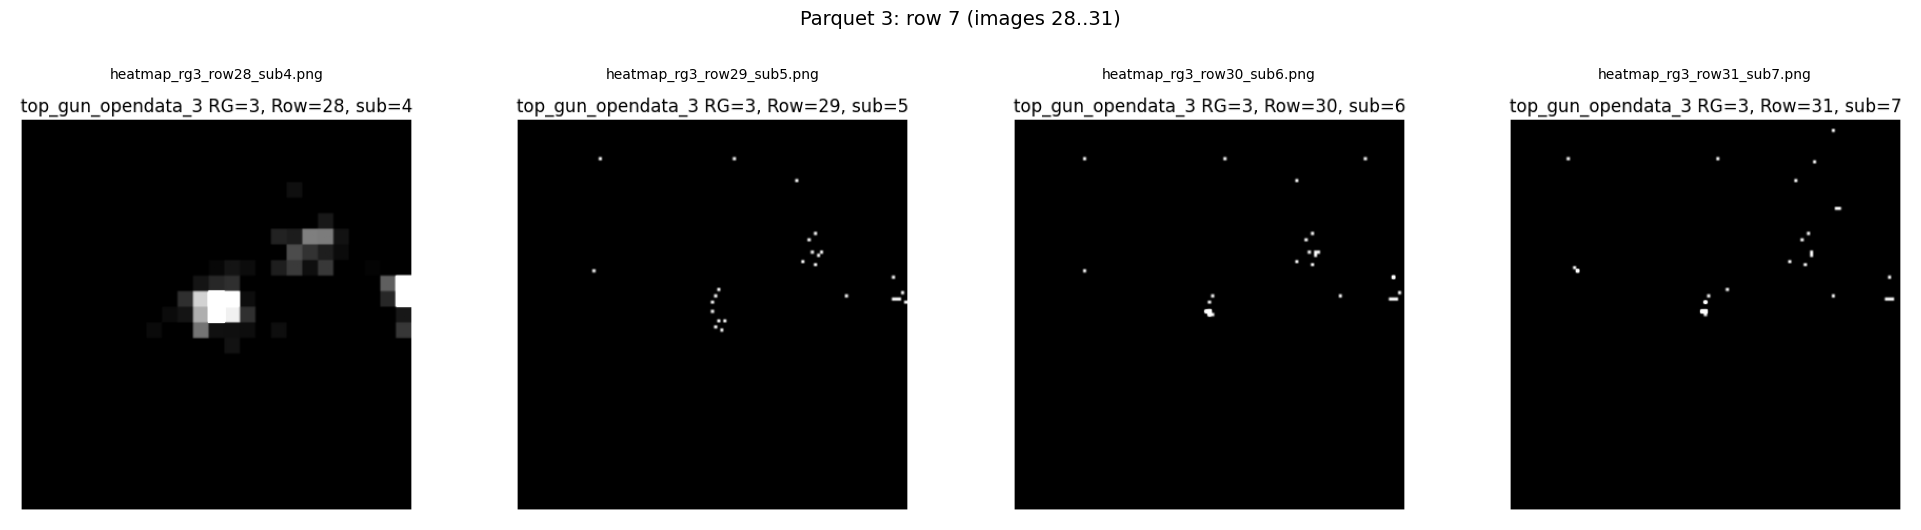

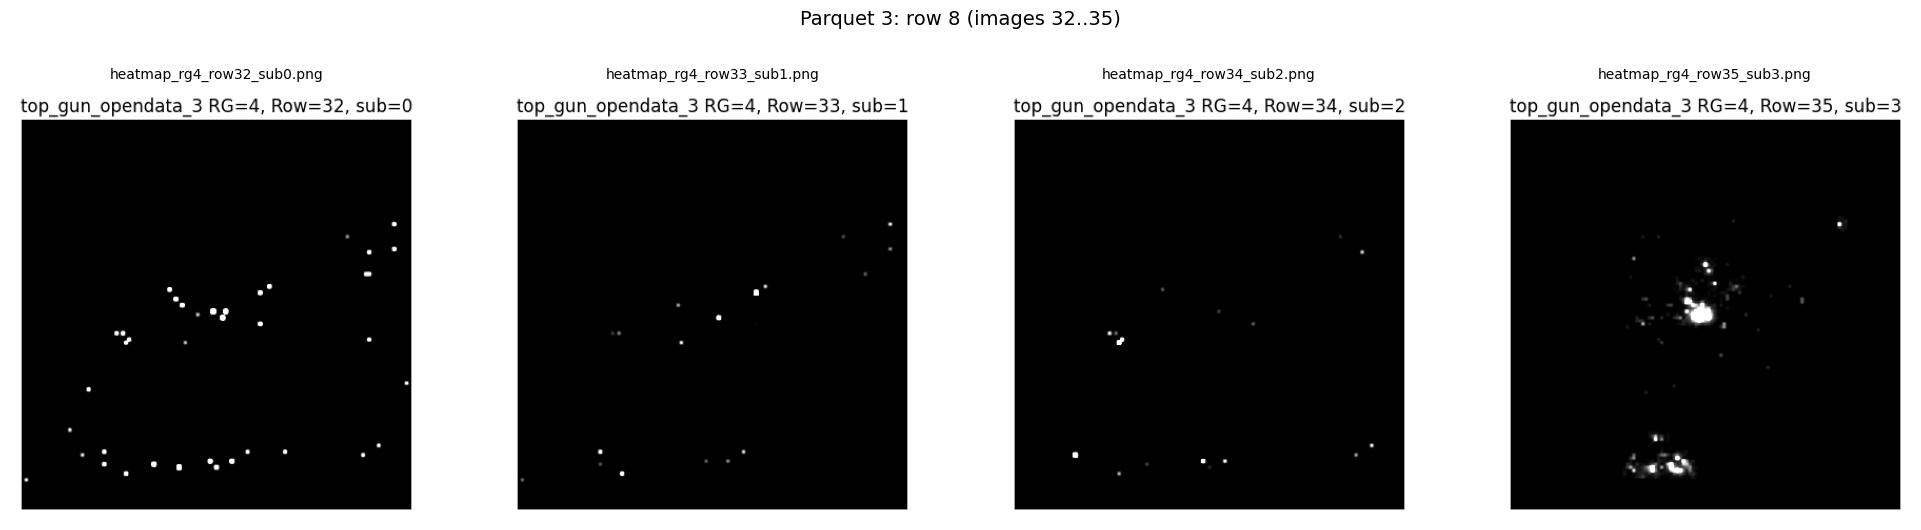

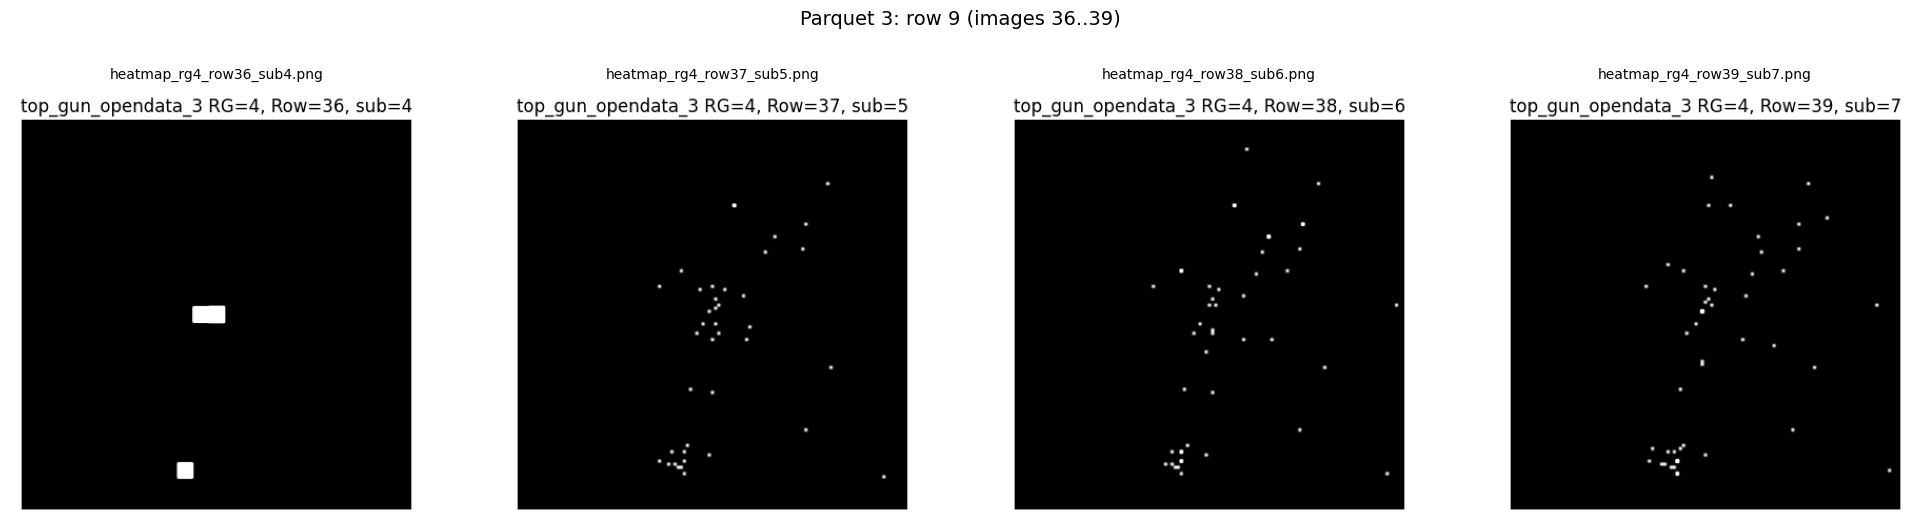

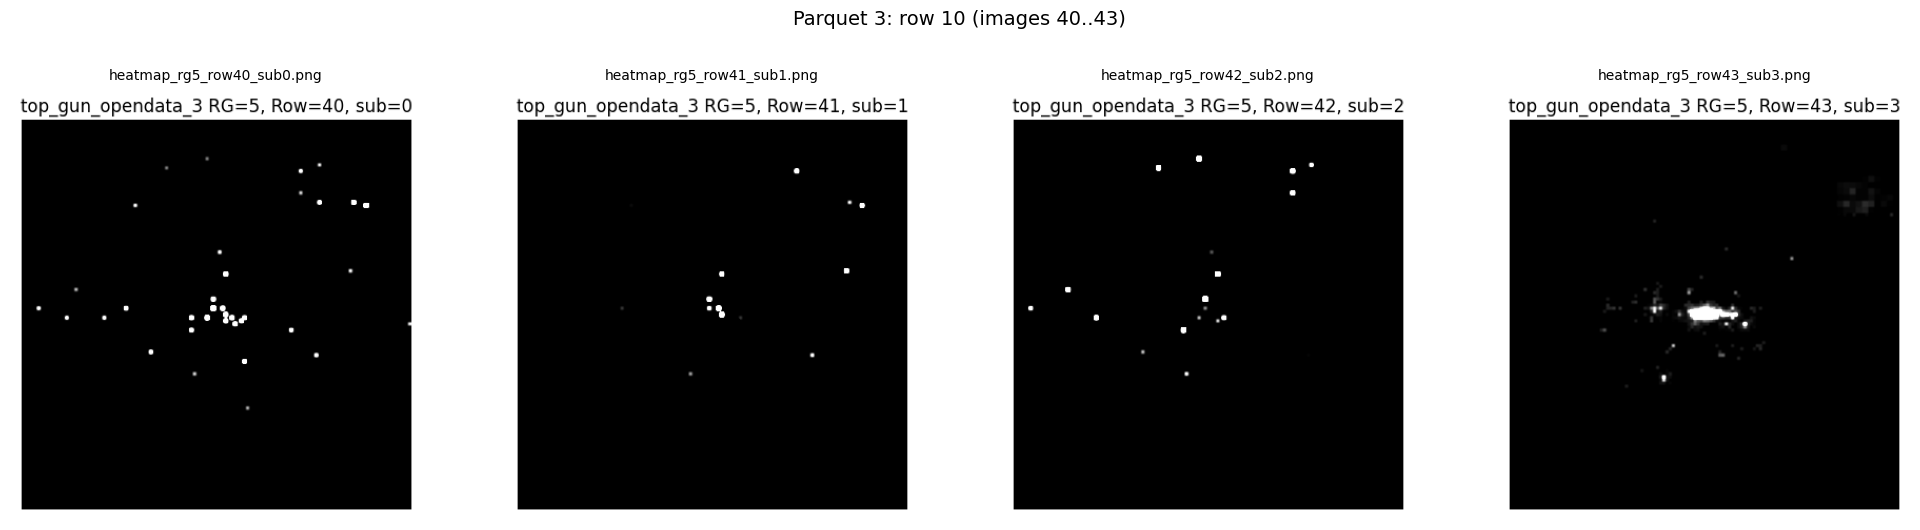

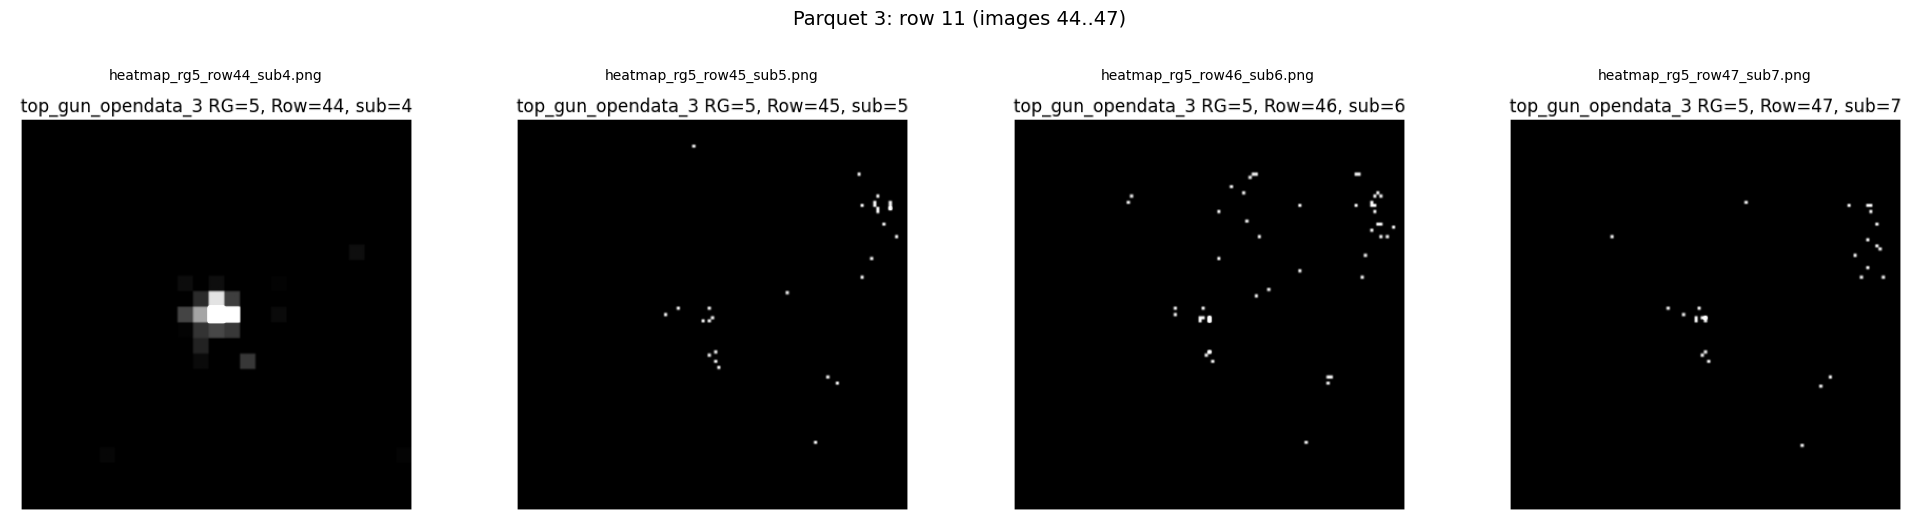

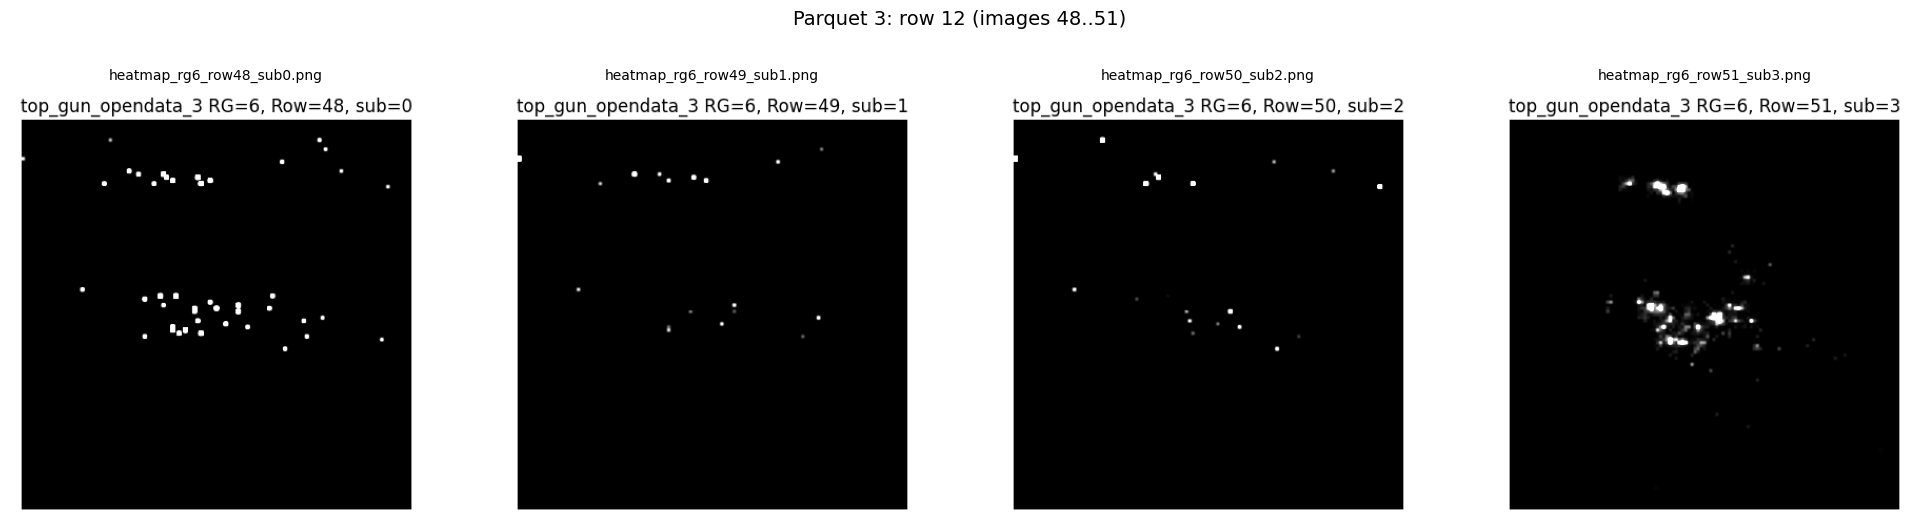

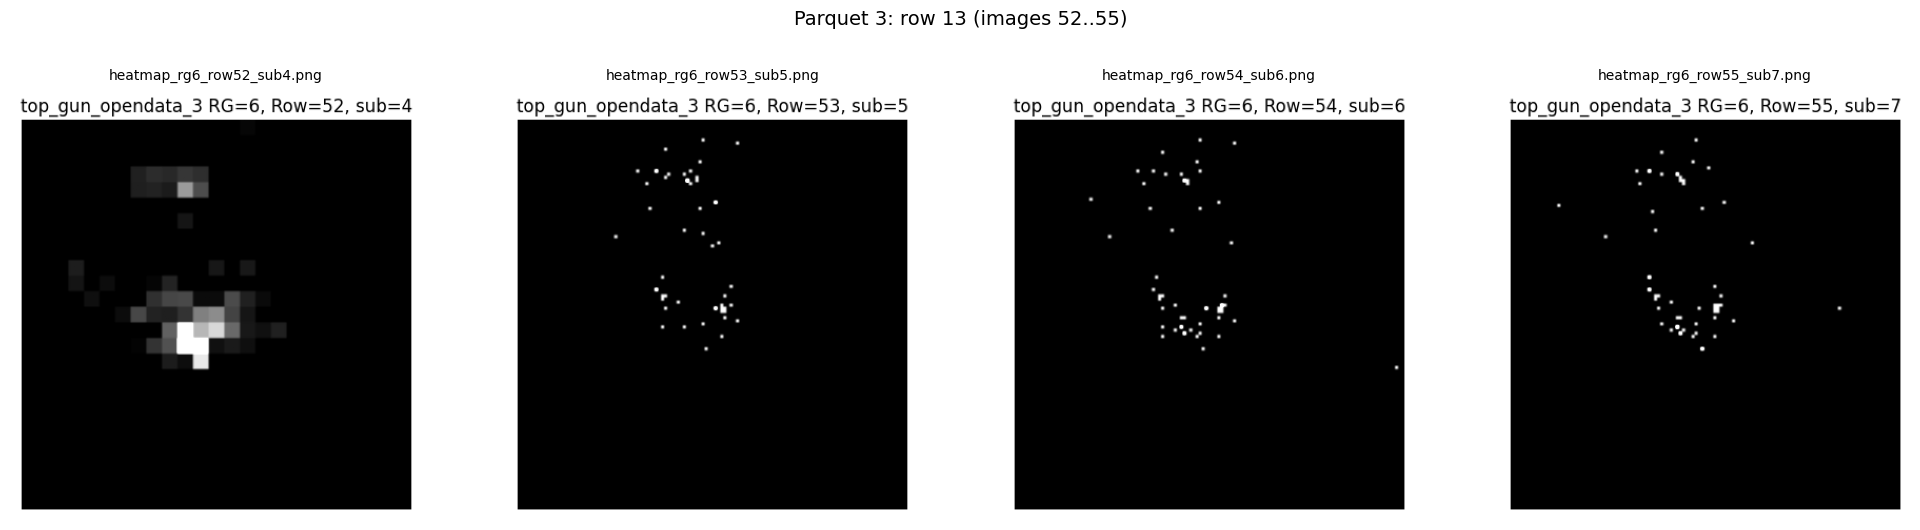

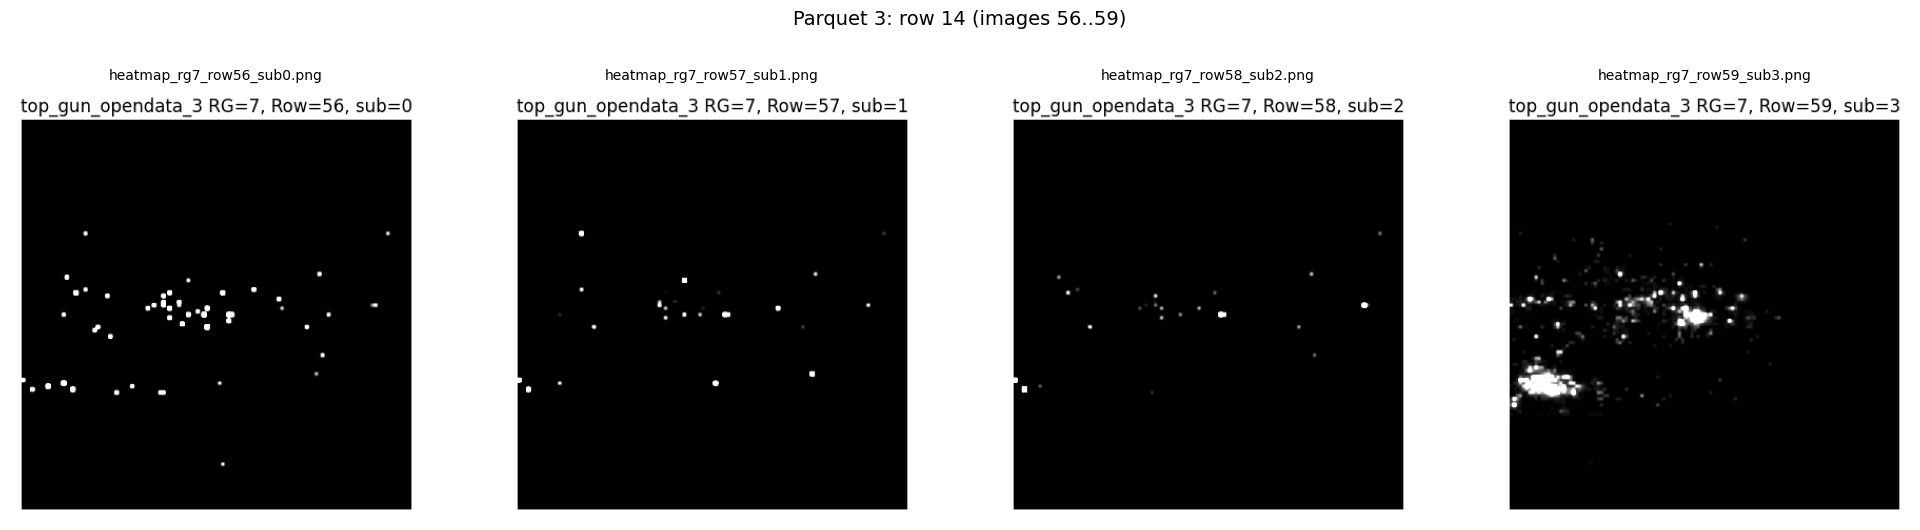

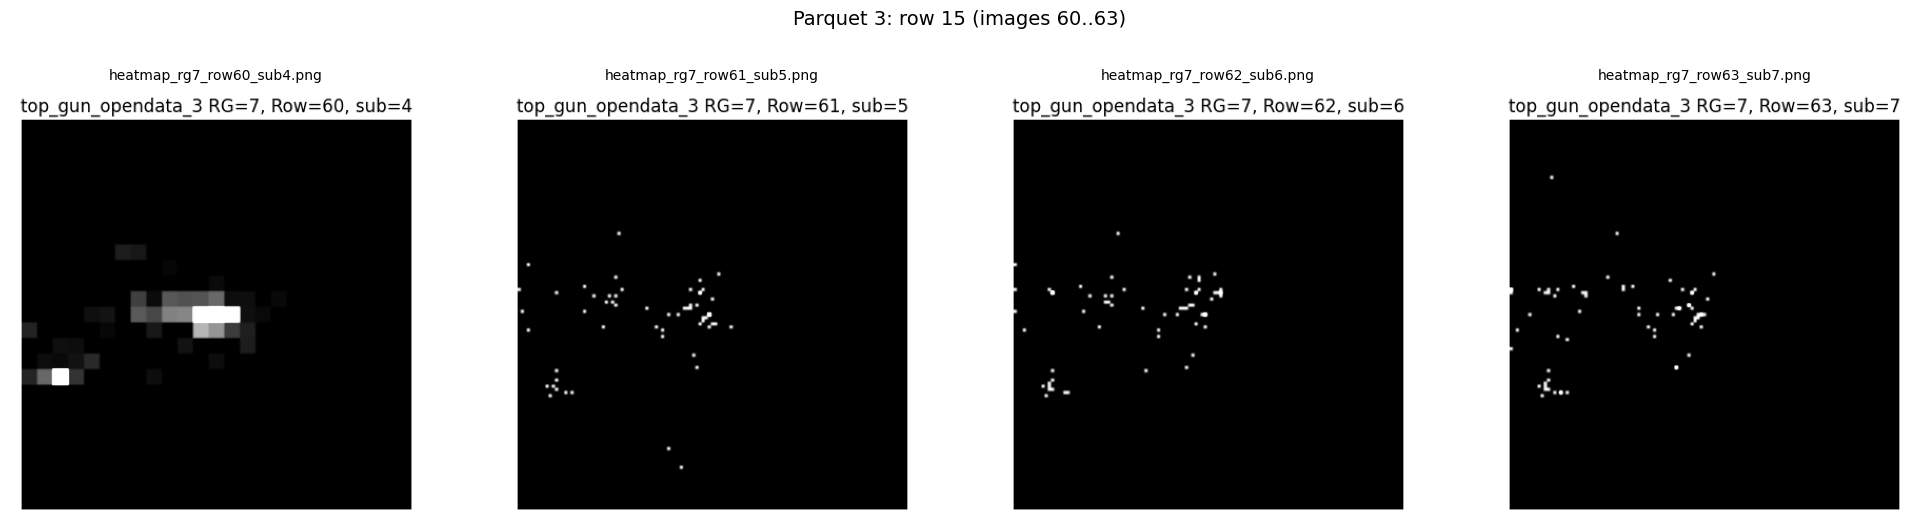

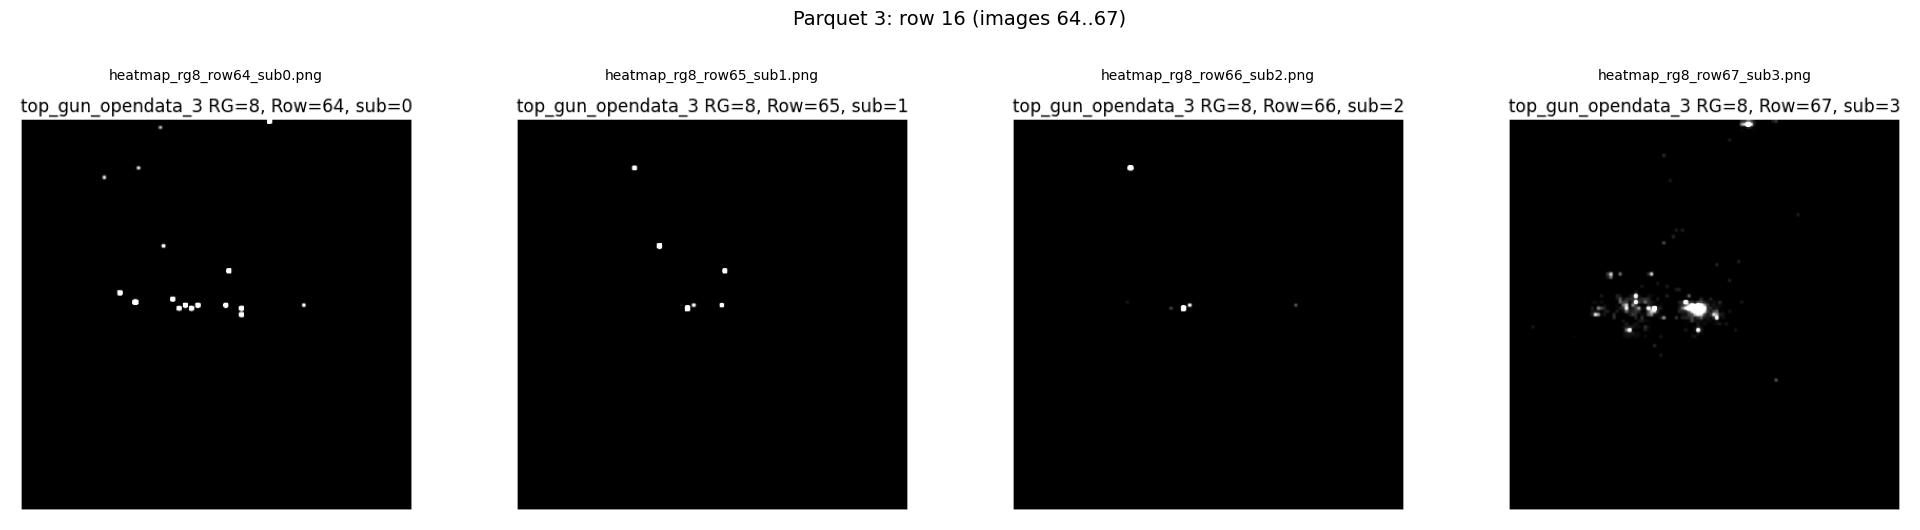

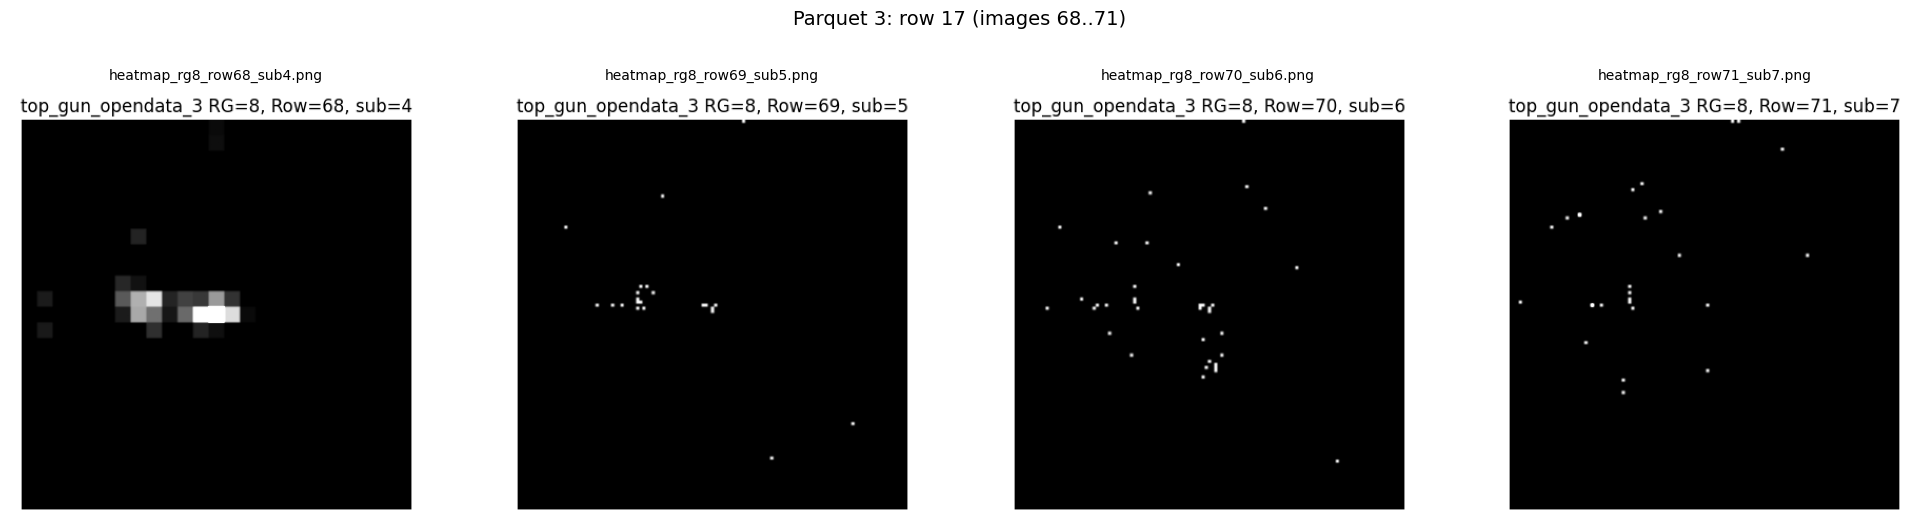

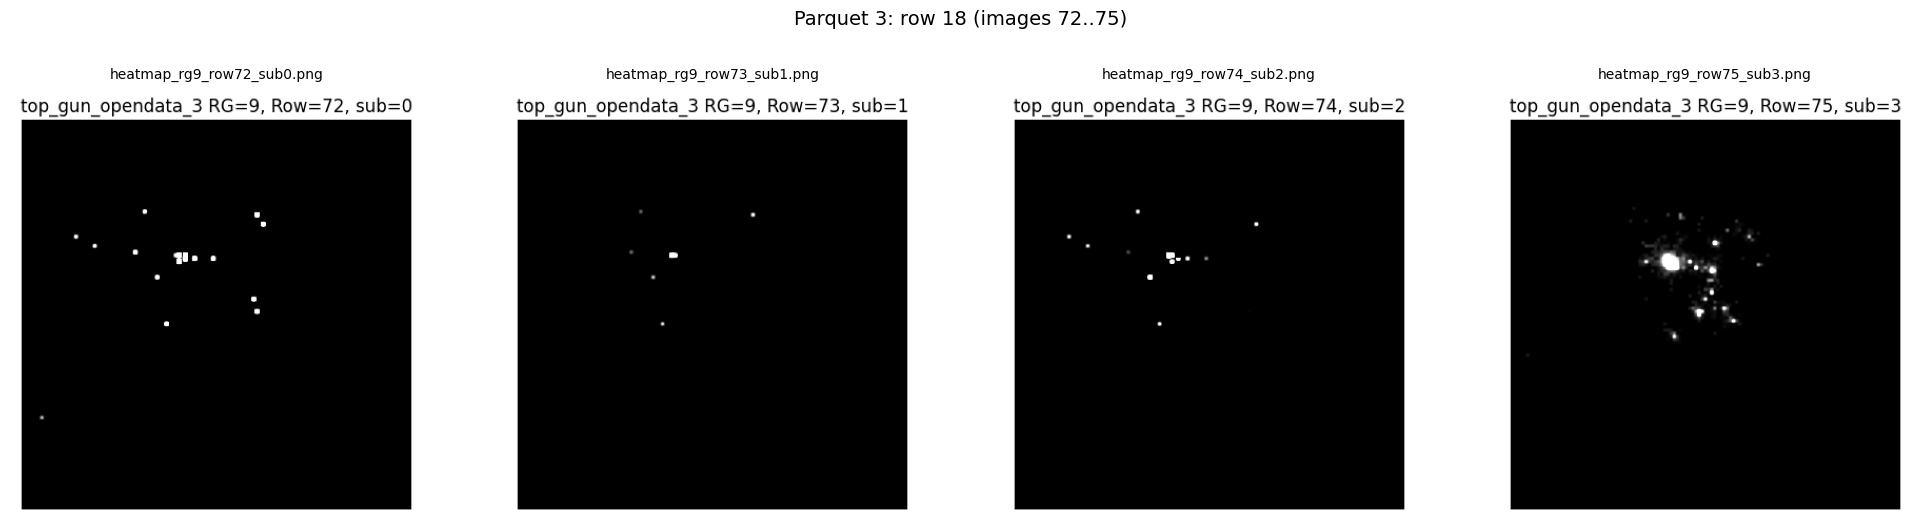

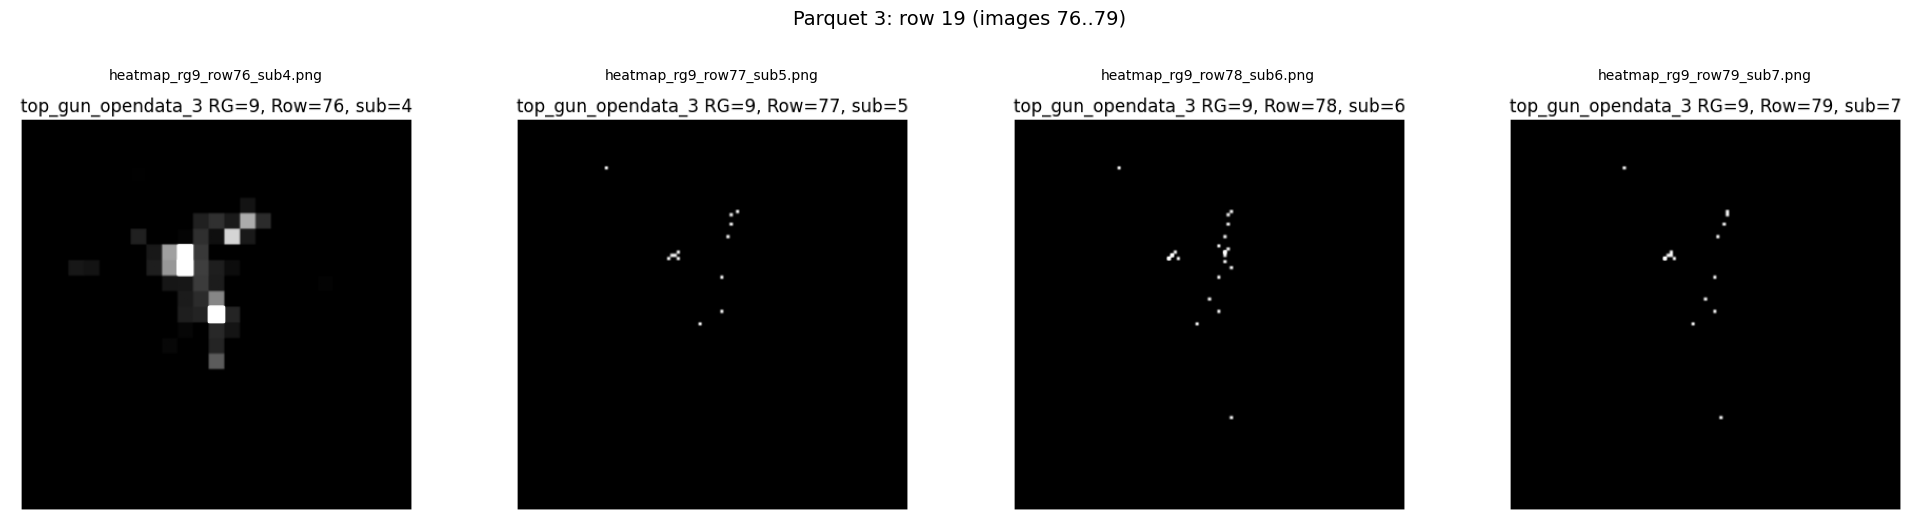


=== Parquet file index 4 ===
Found 80 images in /kaggle/working/top_gun_opendata_4/Images


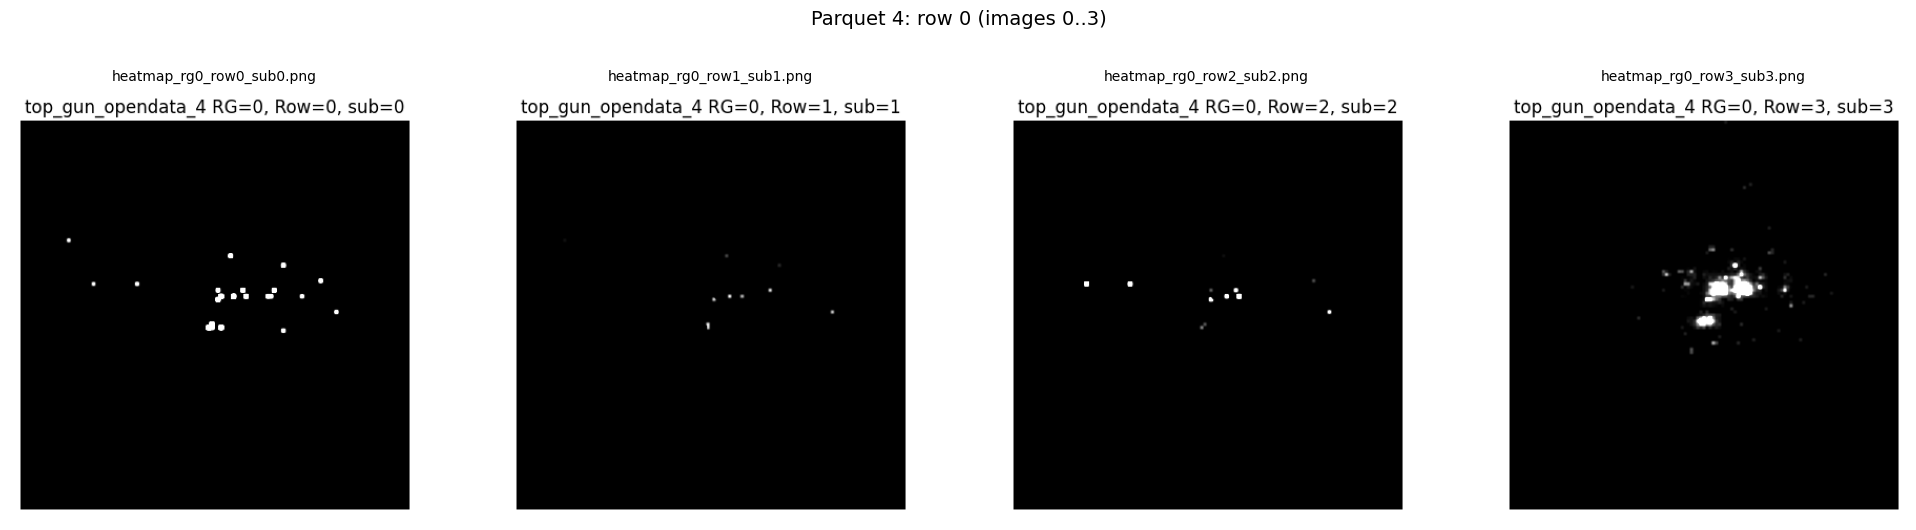

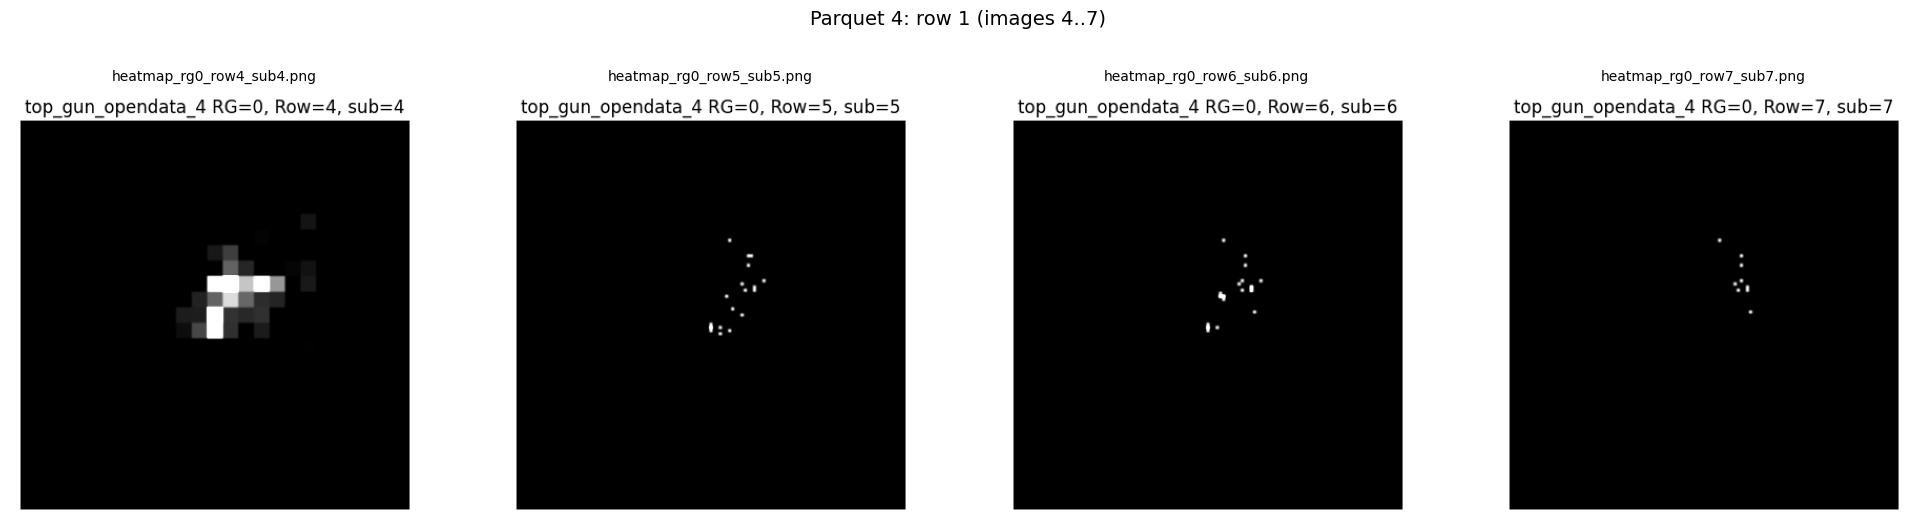

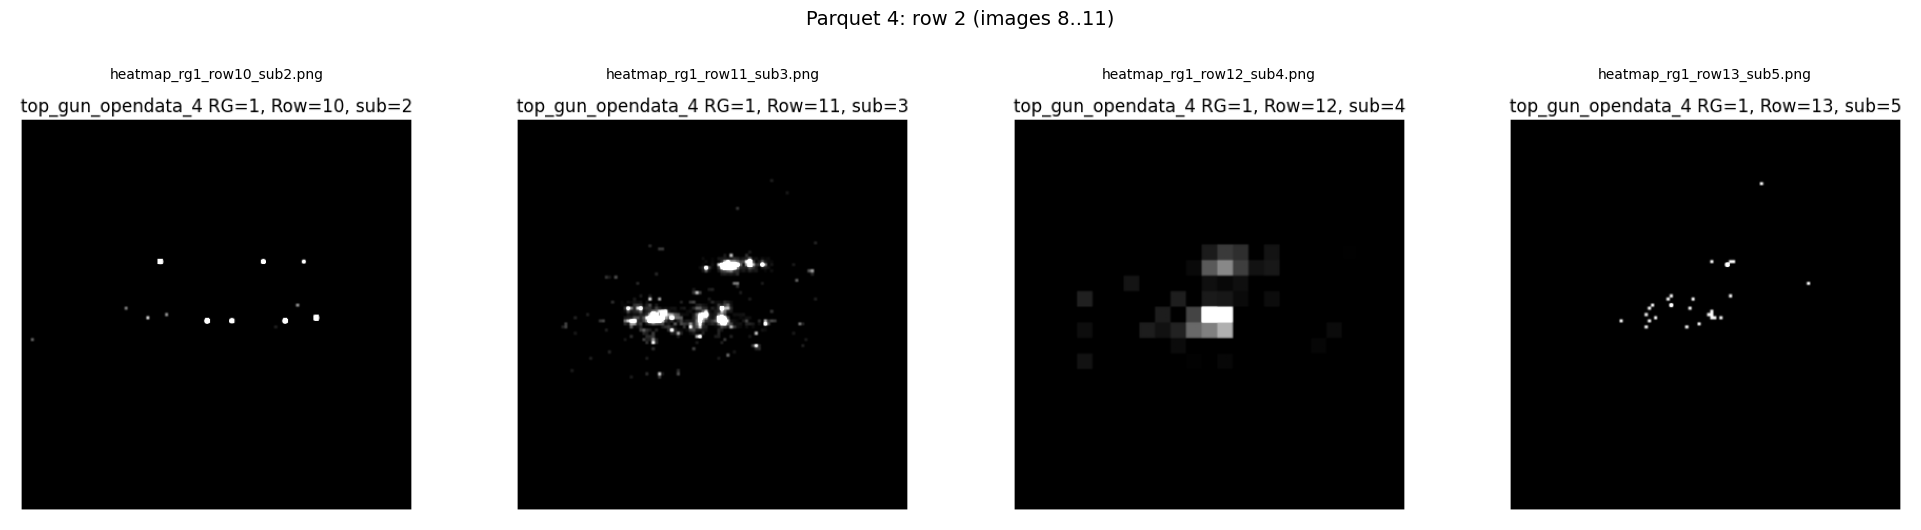

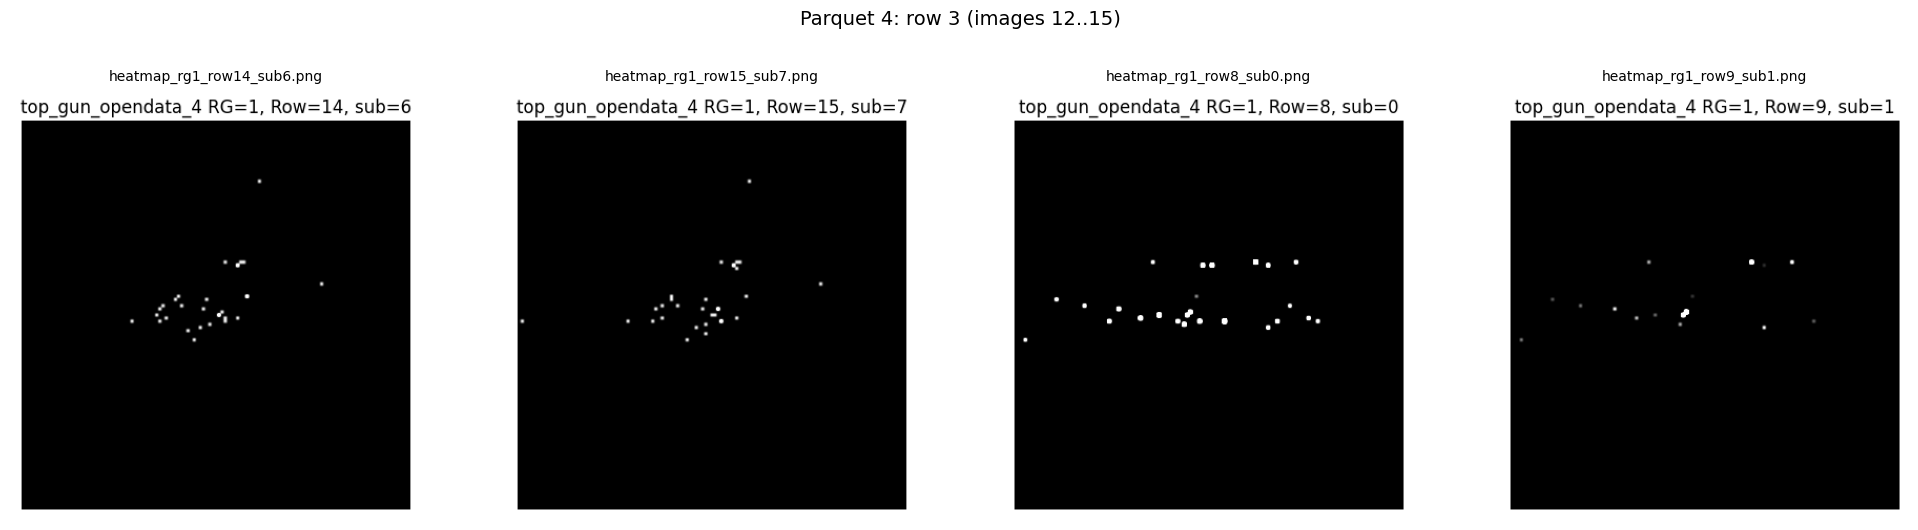

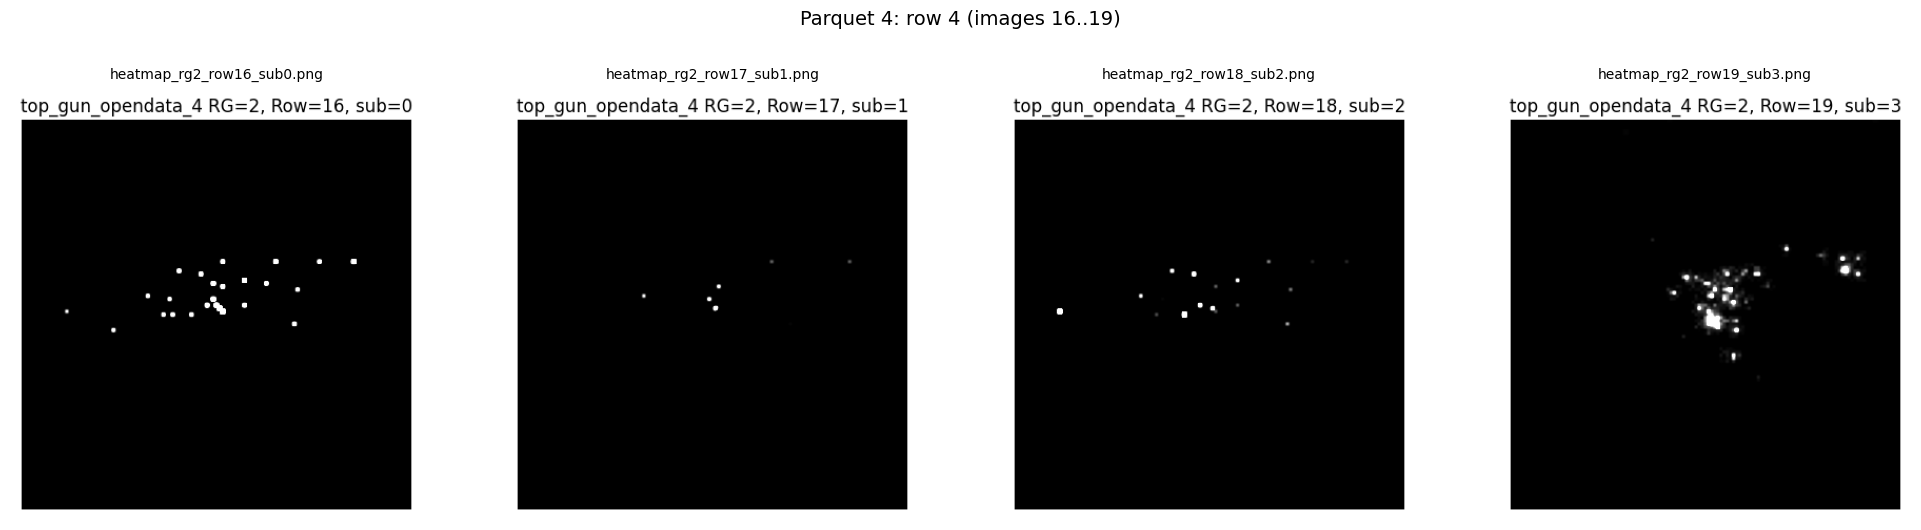

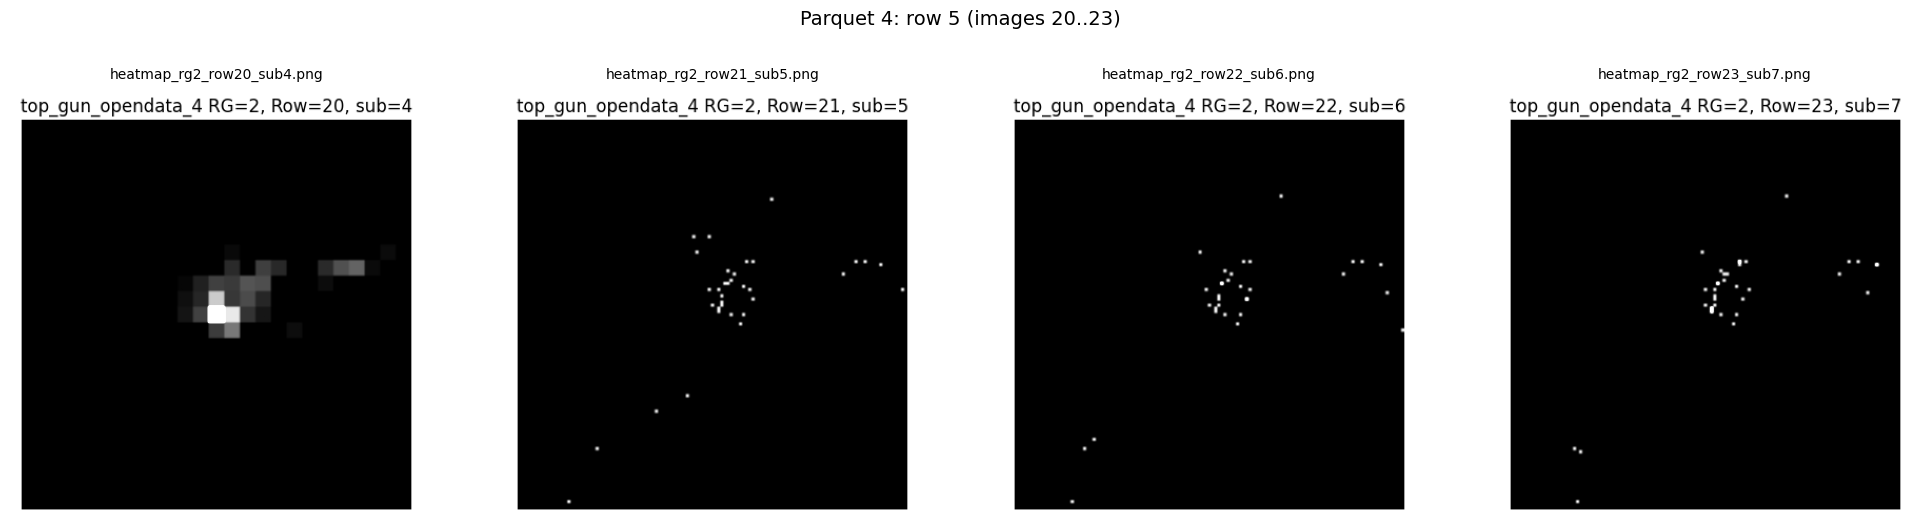

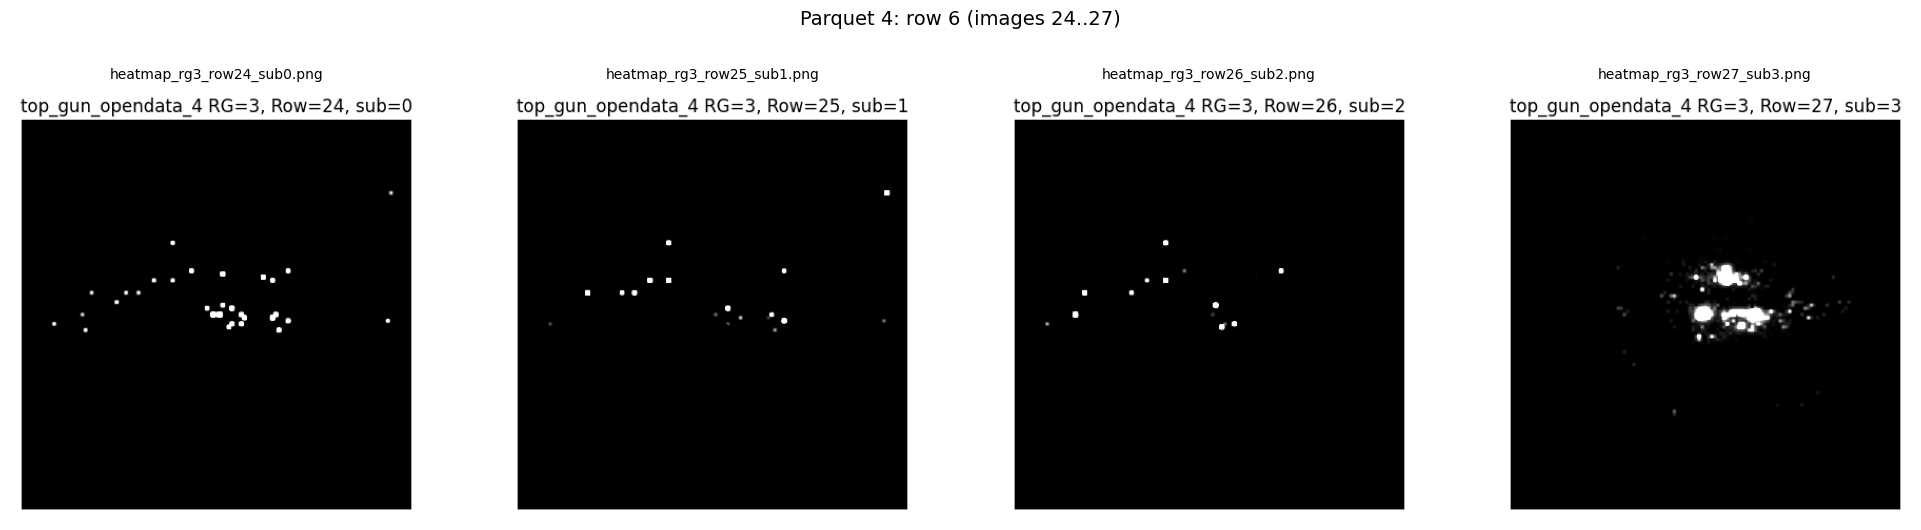

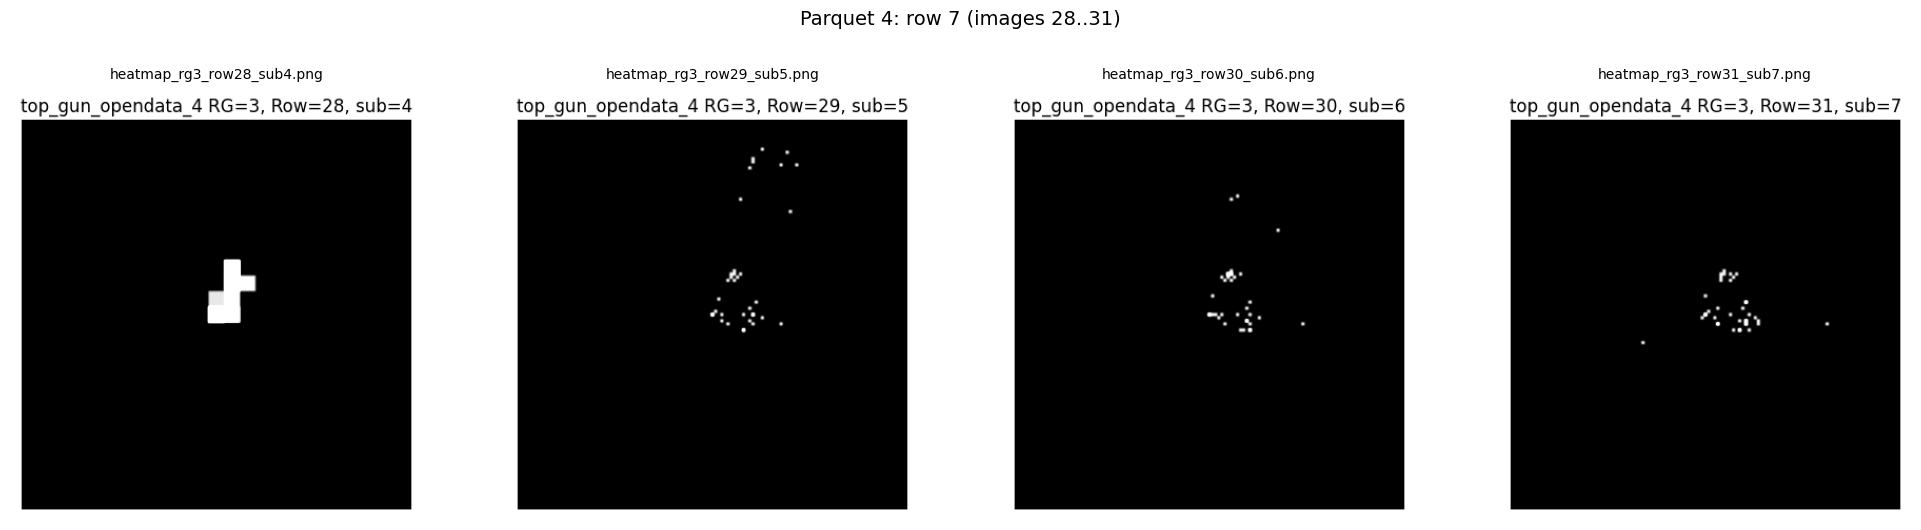

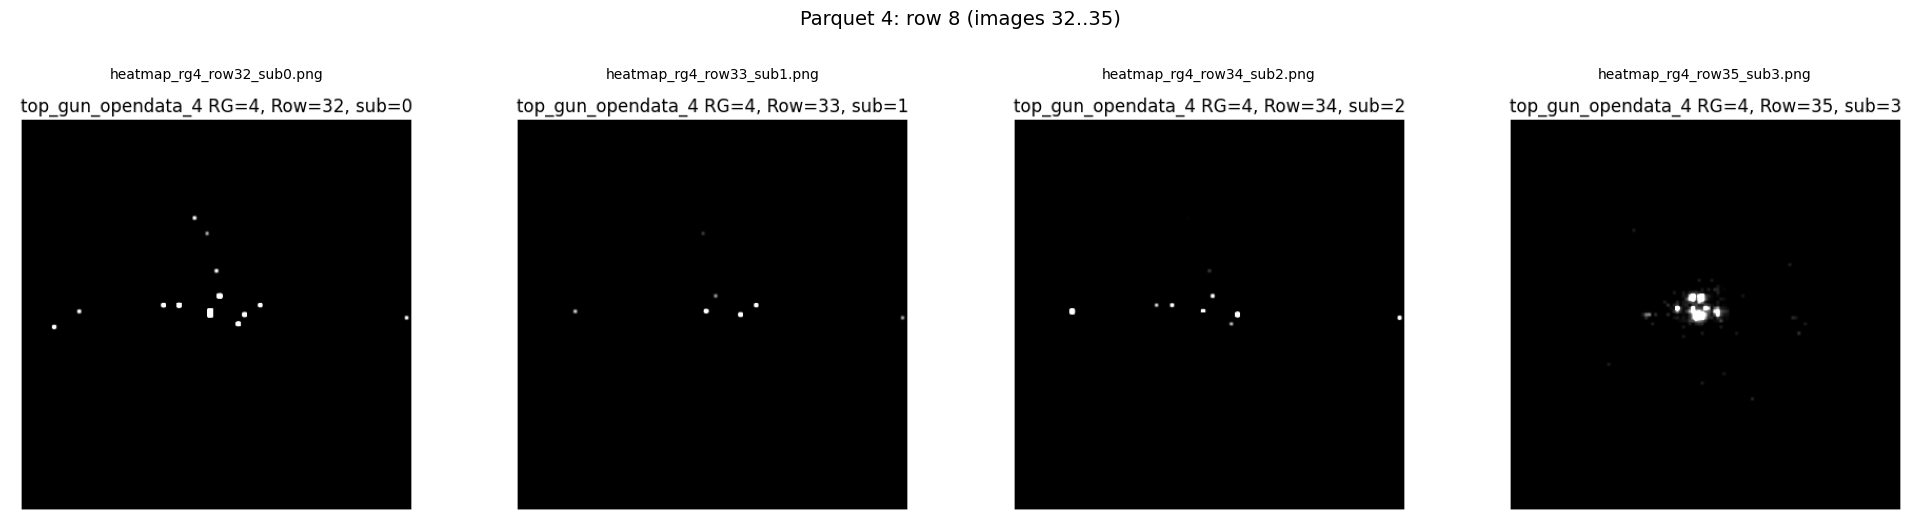

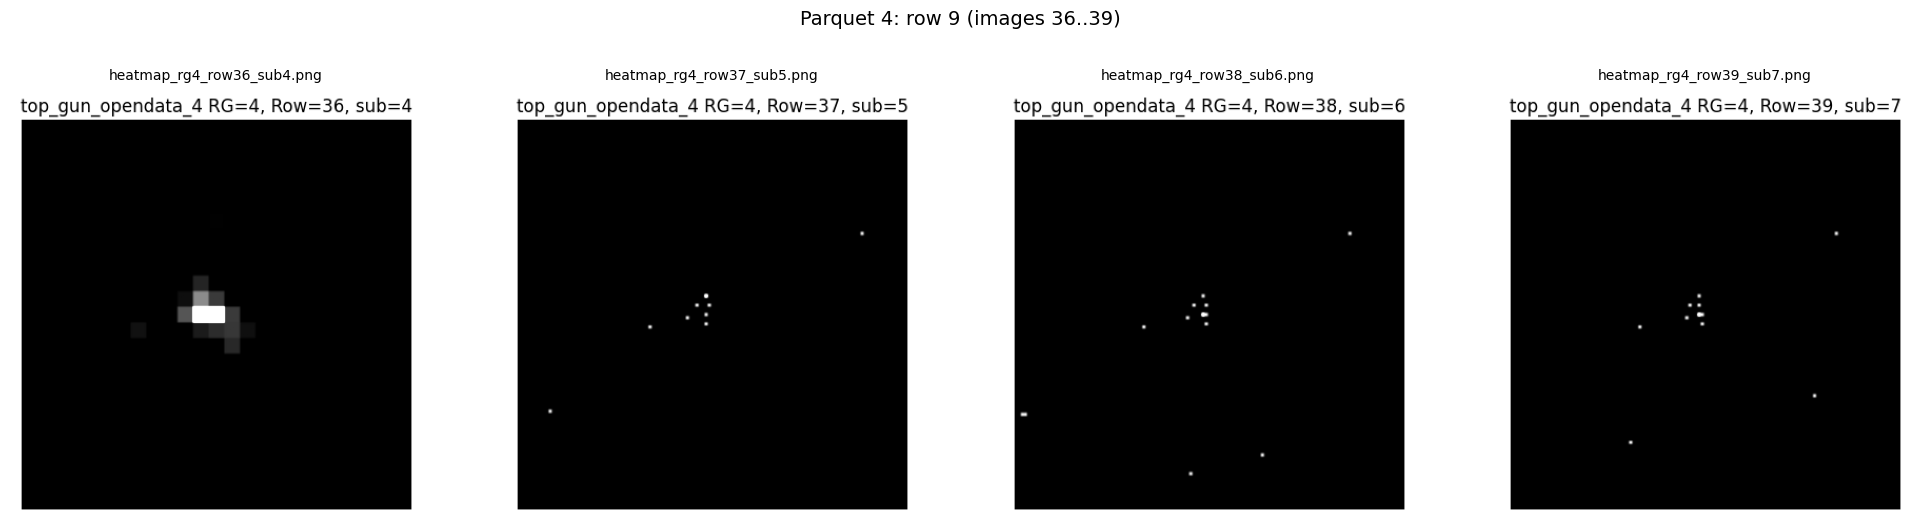

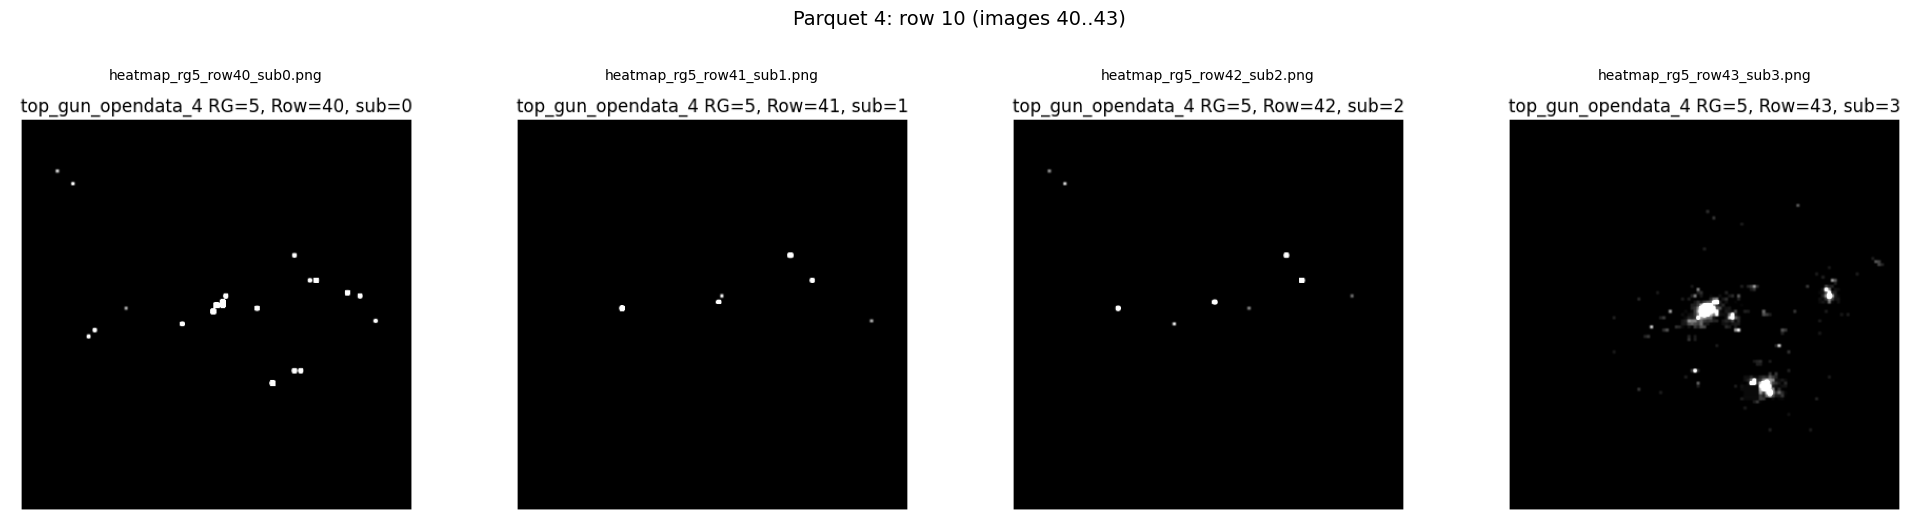

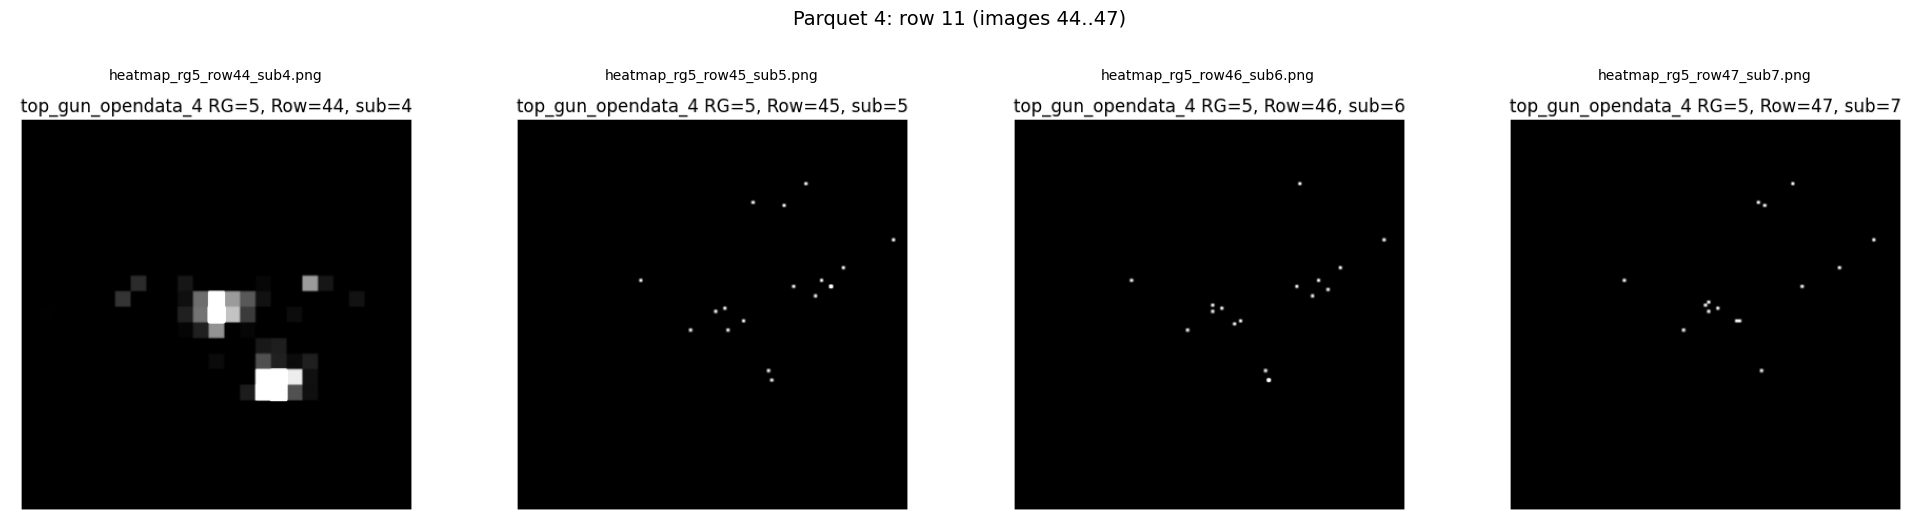

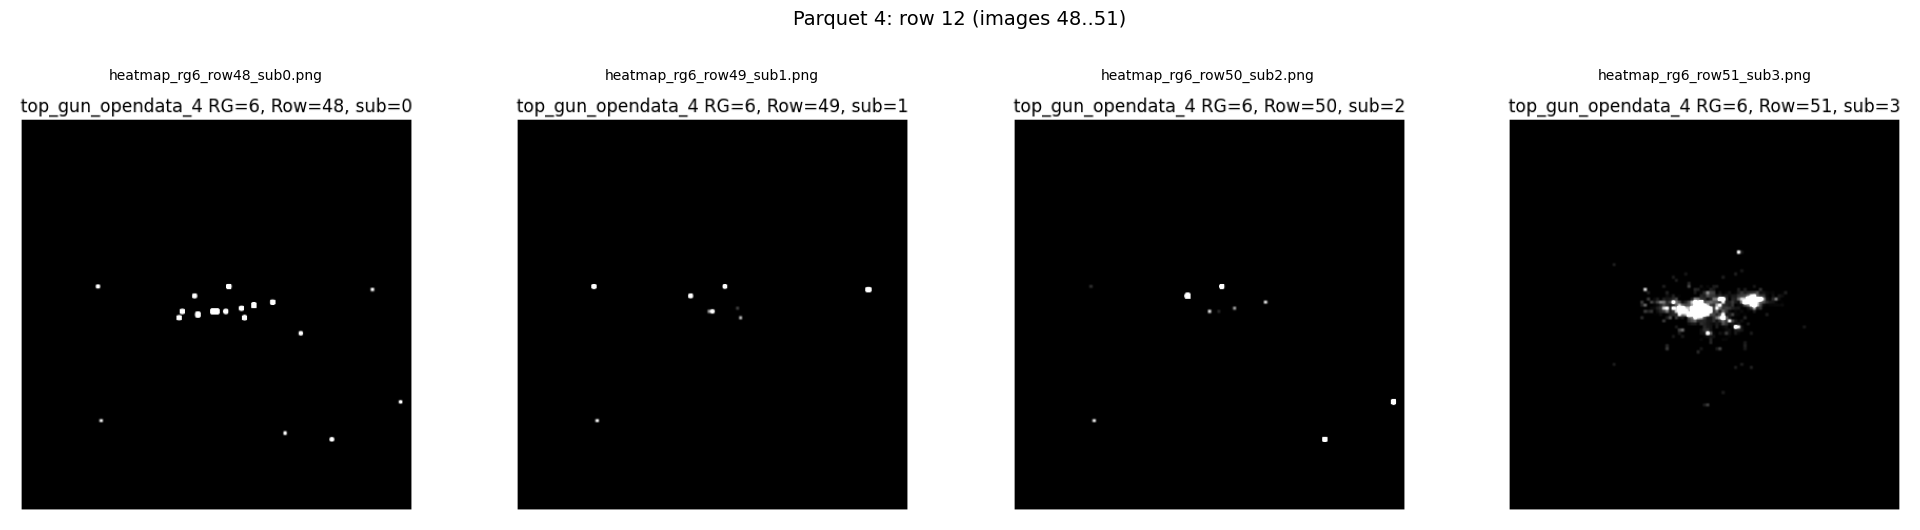

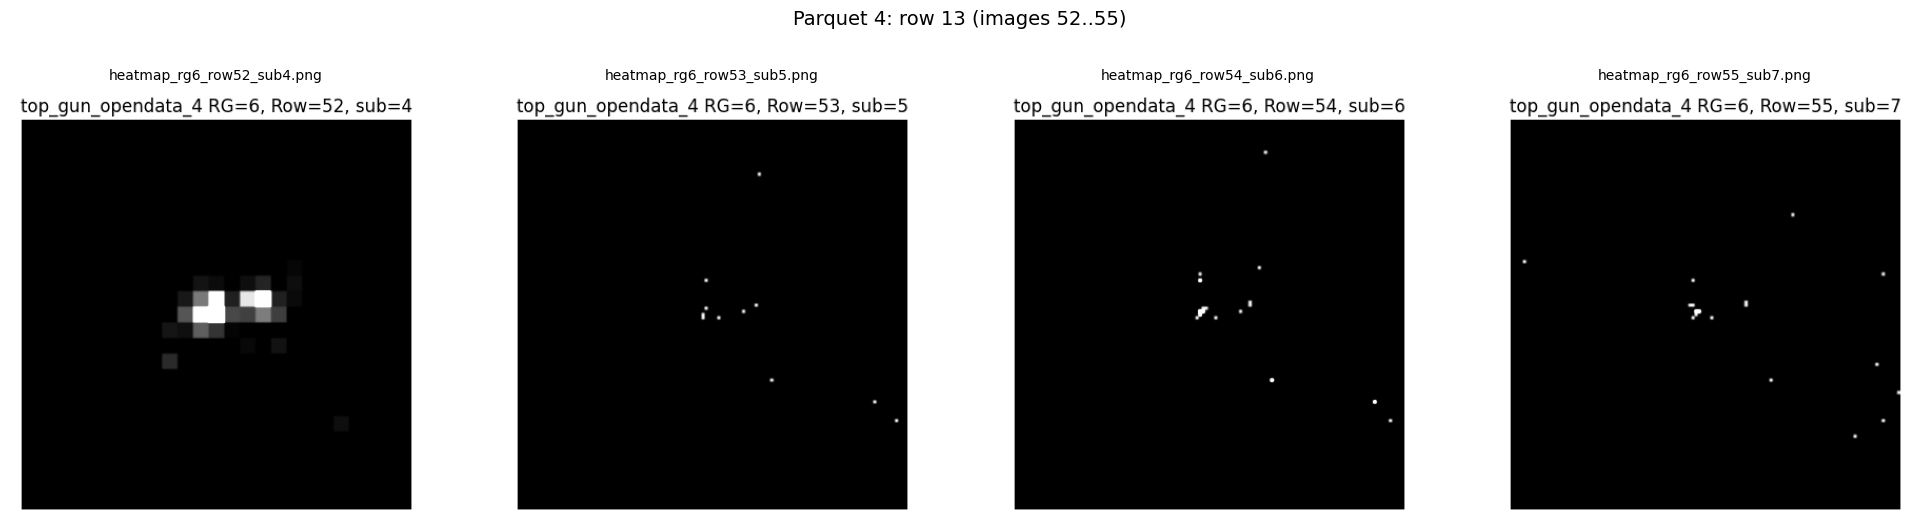

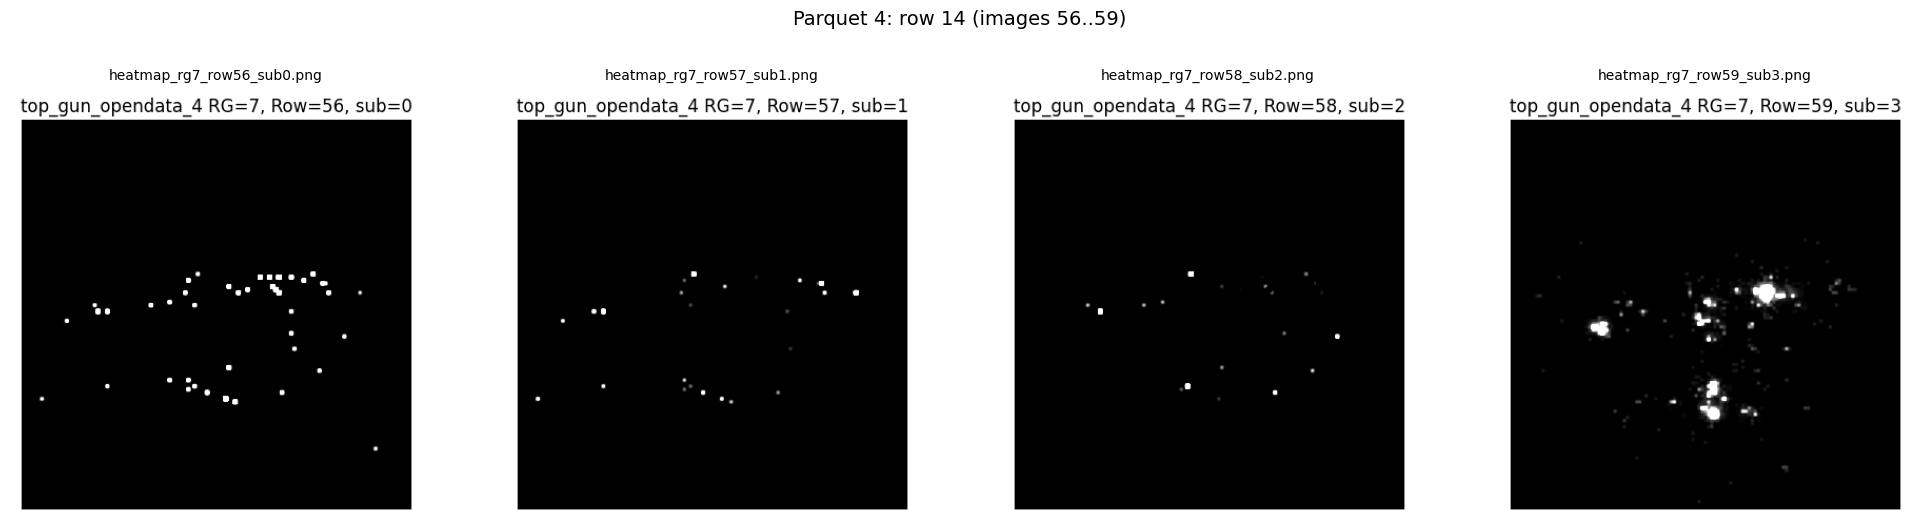

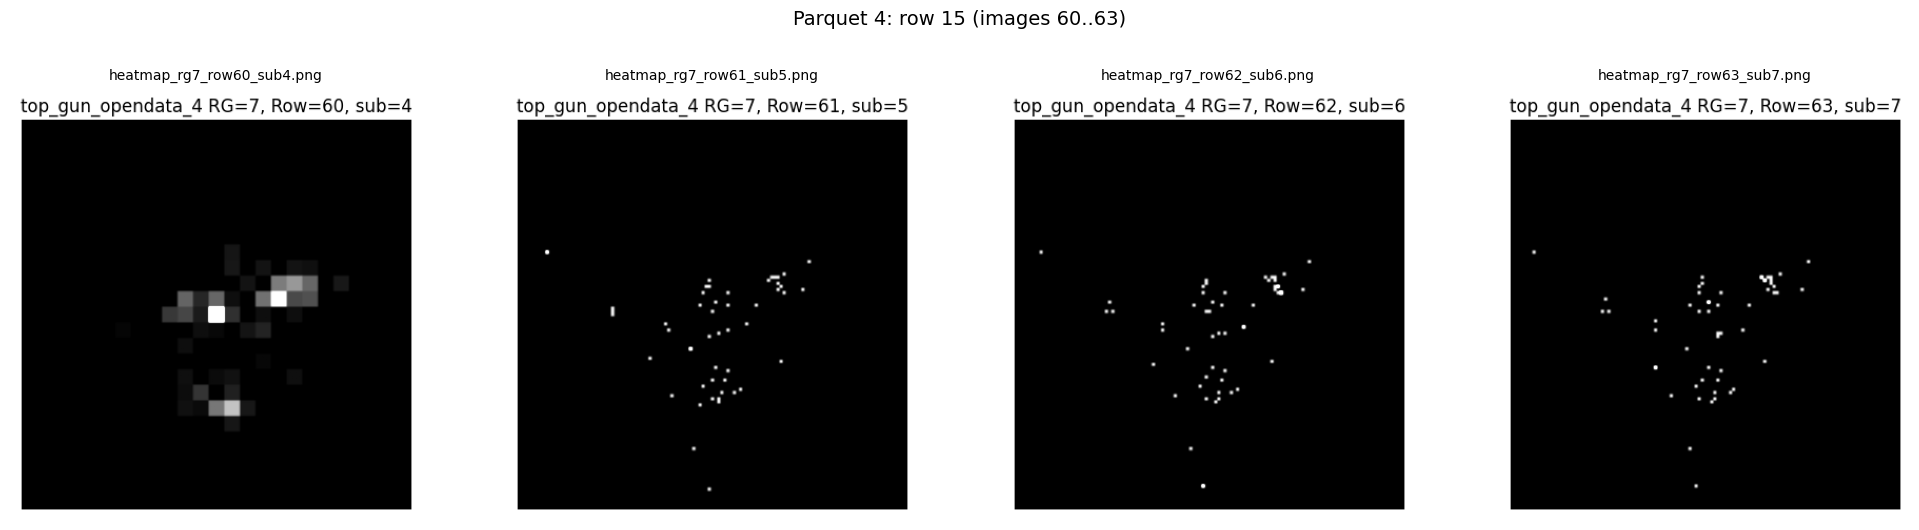

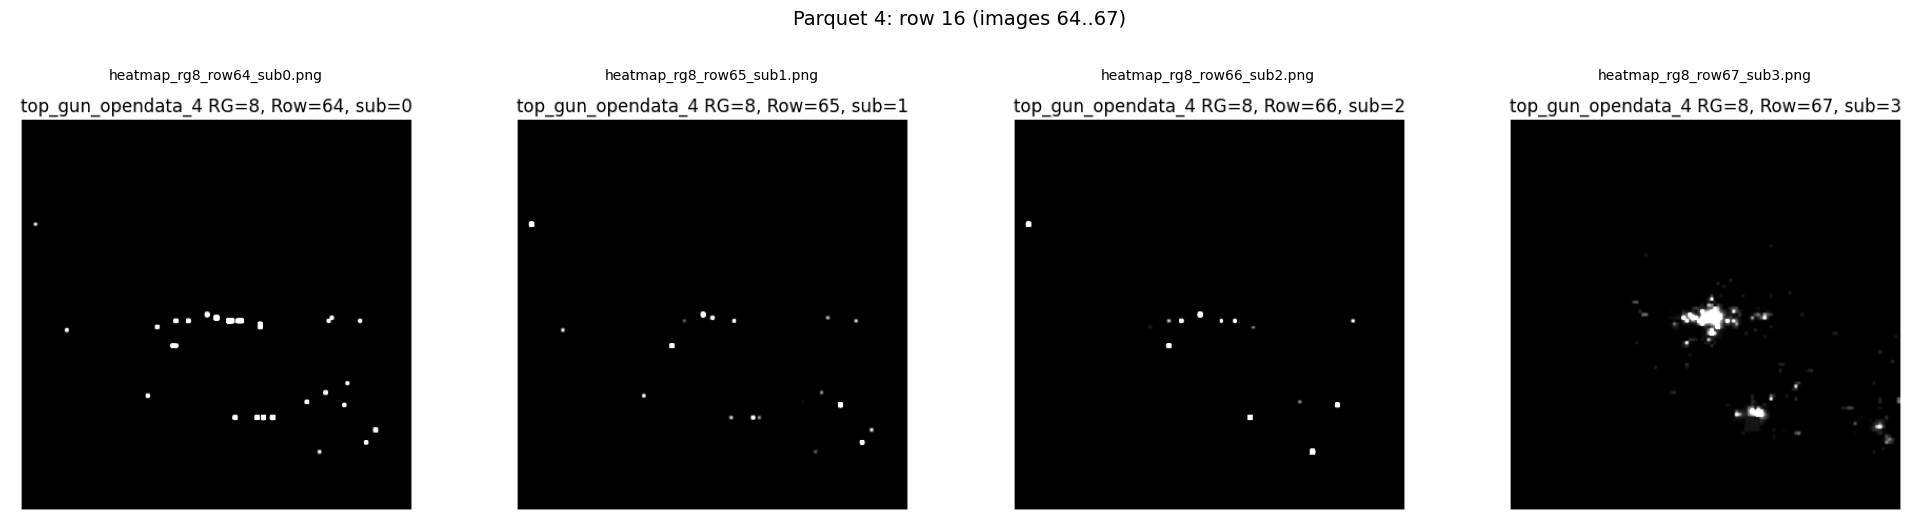

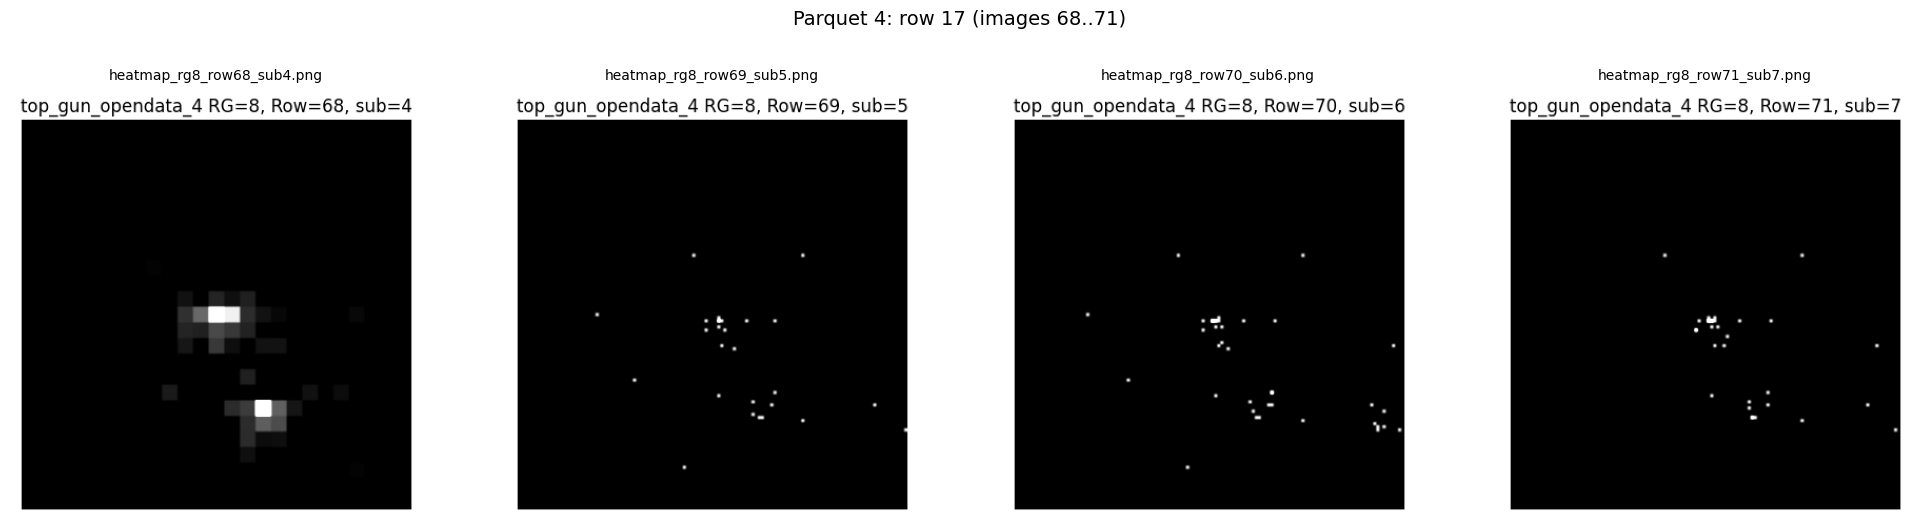

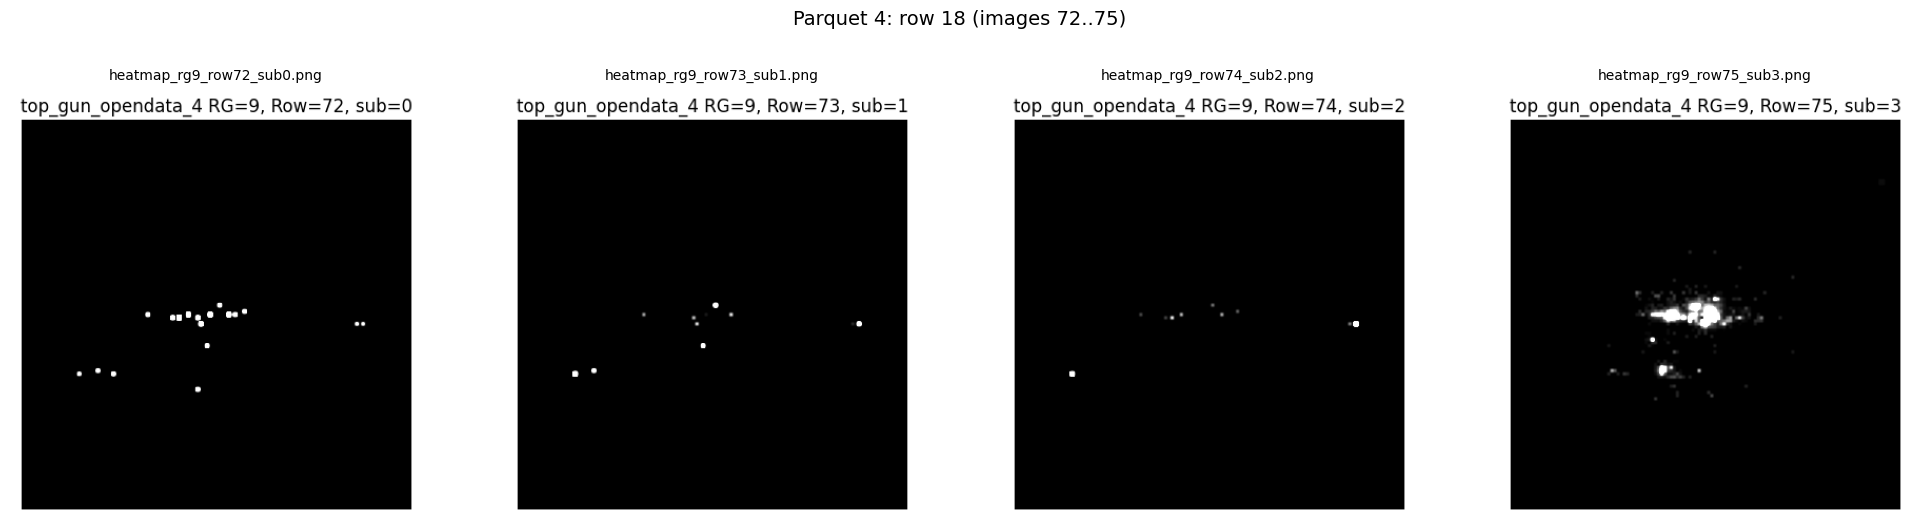

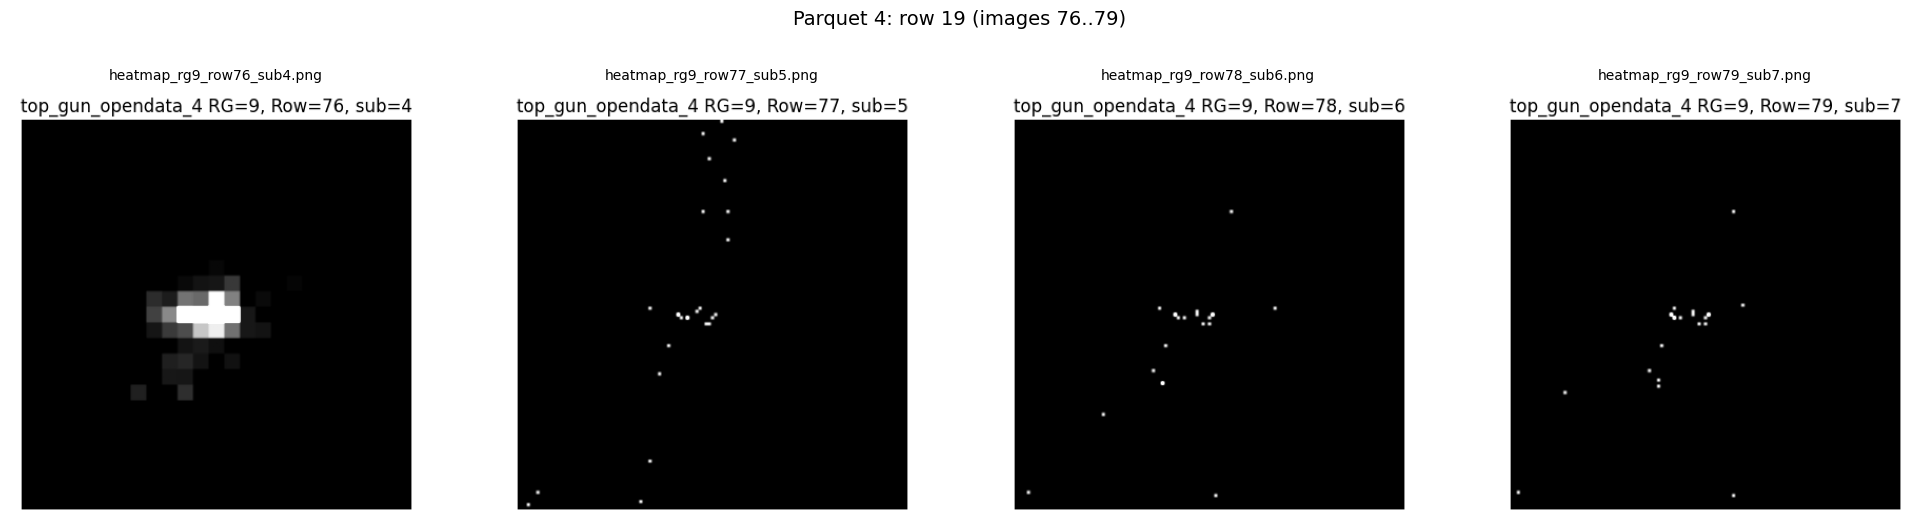

In [7]:
import os
import glob
import math
import matplotlib.pyplot as plt

OUTPUT_DIR    = "/kaggle/working/"
NUM_PARQUETS  = 5
IMAGES_PER_ROW= 4

def display_heatmaps_matplotlib():
    for i in range(NUM_PARQUETS):
        base_name  = f"top_gun_opendata_{i}"
        image_path = os.path.join(OUTPUT_DIR, base_name, "Images")

        # Gather all heatmap PNGs in sorted order
        images = sorted(glob.glob(os.path.join(image_path, "heatmap_*.png")))
        
        # Print a console message (optional)
        print(f"\n=== Parquet file index {i} ===")
        print(f"Found {len(images)} images in {image_path}")
        
        # How many rows do we need if we show 4 images per row?
        row_count = math.ceil(len(images) / IMAGES_PER_ROW)
        
        # Display images row by row
        for r in range(row_count):
            # Extract the 4 images (or fewer if near the end)
            row_images = images[r*IMAGES_PER_ROW : (r+1)*IMAGES_PER_ROW]

            # Create a figure with 4 subplots horizontally
            fig, axes = plt.subplots(1, IMAGES_PER_ROW, figsize=(20, 5))
            
            # If there's only 1–3 images, we still have 4 axes; handle that gracefully
            if IMAGES_PER_ROW == 1:
                axes = [axes]  # so we can index it uniformly
           
            for col, img_path in enumerate(row_images):
                img = plt.imread(img_path)      # read image as a NumPy array
                axes[col].imshow(img, cmap='gray')
                axes[col].axis('off')
                axes[col].set_title(os.path.basename(img_path), fontsize=10)

            # Hide any unused subplots if this row has fewer than 4 images
            for col in range(len(row_images), IMAGES_PER_ROW):
                axes[col].axis('off')

            # A nice title for the row
            plt.suptitle(f"Parquet {i}: row {r} (images {r*IMAGES_PER_ROW}..{(r+1)*IMAGES_PER_ROW - 1})",
                         fontsize=14, y=1.05)
            
            plt.tight_layout()
            plt.show()

# Run the function
display_heatmaps_matplotlib()


In [8]:
import pyarrow.parquet as pq
import pandas as pd

PARQUET0 = "/kaggle/input/topgun0/top_gun_opendata_0.parquet"
pf = pq.ParquetFile(PARQUET0)

# Collect only first 10 rows
chunks = []
count = 0
for rg in range(pf.num_row_groups):
    df_chunk = pf.read_row_group(rg).to_pandas()
    needed = 10 - count
    chunks.append(df_chunk.iloc[:needed])
    count += len(df_chunk.iloc[:needed])
    if count >= 10:
        break

df = pd.concat(chunks, ignore_index=True)
print("Loaded DataFrame shape:", df.shape)


Loaded DataFrame shape: (10, 5)


In [9]:
print(df.columns)
print(df.head())  # shows the first few rows

Index(['X_jet', 'm', 'iphi', 'pt', 'ieta'], dtype='object')
                                               X_jet           m  iphi  \
0  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  291.988312  33.0   
1  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  466.154877  48.0   
2  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  451.912231   0.0   
3  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  393.327454  40.0   
4  [[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  180.342300  19.0   

           pt  ieta  
0  962.311523  16.0  
1  555.076416  36.0  
2  434.385803  19.0  
3  418.650391  21.0  
4  985.945129  16.0  


In [10]:
import numpy as np

arr = np.array(df.iloc[0, 0])
print("Shape of X_jet[0]:", arr.shape)

Shape of X_jet[0]: (8,)


In [11]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1) Read the first 10 rows from the parquet file
PARQUET0 = "/kaggle/input/topgun0/top_gun_opendata_0.parquet"
pf = pq.ParquetFile(PARQUET0)

chunks = []
count = 0
for rg in range(pf.num_row_groups):
    df_chunk = pf.read_row_group(rg).to_pandas()
    needed = 10 - count
    chunks.append(df_chunk.iloc[:needed])
    count += len(df_chunk.iloc[:needed])
    if count >= 10:
        break
        
df = pd.concat(chunks, ignore_index=True)
print("Loaded DataFrame shape:", df.shape)

# Suppose the nested image data is in column "X_jet"
# and the target label is in column "m".
# (Adjust the column names if your DataFrame differs.)

X_list = []
y_list = []

for i in range(len(df)):
    # 2) Extract the nested data for row i
    data = df.iloc[i]["X_jet"]  # or df.iloc[i, <column_index>] if needed
    
    # 3) Convert from nested Python lists → shape (8, 125, 125)
    arr_8ch = np.stack([
        np.stack([np.array(pixel) for pixel in sub], axis=0)
        for sub in data
    ], axis=0)
    
    # 4) Keep only the first 4 channels
    arr_4ch = arr_8ch[:4]  # shape (4, 125, 125)
    
    # 5) Append to our X_list
    X_list.append(arr_4ch)
    
    # 6) Collect the target from the 'm' column
    #    Make sure 'm' actually exists in df.columns
    y_val = df.iloc[i]["m"]
    y_list.append(y_val)

# 7) Stack all rows into one NumPy array: (10, 4, 125, 125) in this example
X_array = np.stack(X_list, axis=0)
y_array = np.array(y_list)

print("Overall shapes:", X_array.shape, y_array.shape)
# Expect: (10, 4, 125, 125) for X_array and (10,) for y_array

# 8) Split train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_array, 
    y_array, 
    test_size=0.2, 
    random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
# Expect: (8, 4, 125, 125), (8,) and (2, 4, 125, 125), (2,) for test


Loaded DataFrame shape: (10, 5)
Overall shapes: (10, 4, 125, 125) (10,)
Training set shape: (8, 4, 125, 125) (8,)
Test set shape: (2, 4, 125, 125) (2,)


In [12]:
import os, pickle
import numpy as np
import pyarrow.parquet as pq
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

INPUT_DIR = "/kaggle/input/topgun0/"
MODEL_DIR = "/kaggle/working/models/"
os.makedirs(MODEL_DIR, exist_ok=True)

def load_xy(path, max_rows=5000):
    pf = pq.ParquetFile(path)
    X, y = [], []
    count = 0

    for rg in range(pf.num_row_groups):
        df = pf.read_row_group(rg).to_pandas()
        for _, row in df.iterrows():
            try:
                # stack 8 sub‑jets → shape (8,125,125)
                arr = np.stack([np.stack(sub) for sub in row["X_jet"]])
                # average across the 8 sub‑jets → (125,125)
                img = arr.mean(axis=0).ravel()
                features = np.concatenate([img, row[["iphi","ieta","pt"]].values])
                X.append(features)
                y.append(row["m"])
            except Exception:
                continue

            count += 1
            if count >= max_rows:
                break
        if count >= max_rows:
            break

    X = np.vstack(X)
    y = np.array(y)
    print(f"Loaded {X.shape[0]} rows, {X.shape[1]} features")
    return X, y

# Initialize incremental regressor
model = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)

for i in range(5):
    parquet_path = os.path.join(INPUT_DIR, f"top_gun_opendata_{i}.parquet")
    print(f"\n▶ Processing file {i}")
    X, y = load_xy(parquet_path)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.partial_fit(X_train, y_train)

    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2  = r2_score(y_test, model.predict(X_test))
    print(f"Parquet {i}: R² train={train_r2:.3f}, test={test_r2:.3f}")

    fname = os.path.join(MODEL_DIR, f"sgd_up_to_{i}.pkl")
    with open(fname, "wb") as f:
        pickle.dump(model, f)
    print(f"💾 Saved model checkpoint → {fname}")

print("\n✅ All five datasets trained and saved.")



▶ Processing file 0
Loaded 5000 rows, 15628 features
Parquet 0: R² train=-363585699979479287349641216.000, test=-13154326298750291835617280.000
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_0.pkl

▶ Processing file 1
Loaded 5000 rows, 15628 features
Parquet 1: R² train=-4631021393719608611962880.000, test=-4848505885985154692808704.000
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_1.pkl

▶ Processing file 2
Loaded 5000 rows, 15628 features
Parquet 2: R² train=-184163194342269460026490880.000, test=-22131002378481021879320576.000
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_2.pkl

▶ Processing file 3
Loaded 5000 rows, 15628 features
Parquet 3: R² train=-64696531681876671352274944.000, test=-847174029496971138433024.000
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_3.pkl

▶ Processing file 4
Loaded 5000 rows, 15628 features
Parquet 4: R² train=-1715733502038422233022464.000, test=-242064442741414854393856.000
💾 Saved model checkpo

In [13]:
import os
import pickle
import numpy as np
import pyarrow.parquet as pq
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

INPUT_DIR = "/kaggle/input/topgun0/"
MODEL_DIR = "/kaggle/working/models/"
os.makedirs(MODEL_DIR, exist_ok=True)

def load_xy(path, max_rows=5000):
    """
    Reads up to `max_rows` rows from the given Parquet file.
    Extracts the first 4 channels (i.e., sub-jets) from 'X_jet',
    takes their mean across channels → a single 125×125 image,
    flattens to 1D, and appends 'iphi', 'ieta', and 'pt' as additional features.
    Returns (X, y) arrays suitable for model training.
    """
    pf = pq.ParquetFile(path)
    X, y = [], []
    count = 0

    for rg in range(pf.num_row_groups):
        df = pf.read_row_group(rg).to_pandas()
        for _, row in df.iterrows():
            try:
                # 1) Convert first 4 channels → shape (4, 125, 125)
                arr_4ch = np.stack([np.stack(sub) for sub in row["X_jet"][:4]])
                
                # 2) Average across the 4 channels → shape (125,125)
                img = arr_4ch.mean(axis=0).ravel()  # flatten to 1D
                
                # 3) Concatenate additional scalar features: iphi, ieta, pt
                scalar_feats = row[["iphi", "ieta", "pt"]].values
                features = np.concatenate([img, scalar_feats])
                
                # 4) Append to lists
                X.append(features)
                y.append(row["m"])  # target
            except Exception:
                # If something goes wrong (e.g. shape mismatch), skip this row
                continue

            count += 1
            if count >= max_rows:
                break
        if count >= max_rows:
            break

    X = np.vstack(X)
    y = np.array(y)
    print(f"Loaded {X.shape[0]} rows, {X.shape[1]} features from {path}")
    return X, y

# Initialize an incremental (online) linear model
model = SGDRegressor(random_state=42, max_iter=1000, tol=1e-3)

# Loop over each of the 5 Parquet files
for i in range(5):
    parquet_path = os.path.join(INPUT_DIR, f"top_gun_opendata_{i}.parquet")
    print(f"\n▶ Processing file {i}: {parquet_path}")
    
    # Load data (X, y)
    X, y = load_xy(parquet_path, max_rows=5000)

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Partial fit on the training split
    model.partial_fit(X_train, y_train)

    # Evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_r2  = r2_score(y_train, y_train_pred)
    test_r2   = r2_score(y_test,  y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test,  y_test_pred)

    print(f"Parquet {i}:")
    print(f"  - R² (train) = {train_r2:.3f},   R² (test) = {test_r2:.3f}")
    print(f"  - MAE (train) = {train_mae:.3f}, MAE (test) = {test_mae:.3f}")

    # Save model checkpoint
    fname = os.path.join(MODEL_DIR, f"sgd_up_to_{i}.pkl")
    with open(fname, "wb") as f:
        pickle.dump(model, f)
    print(f"💾 Saved model checkpoint → {fname}")

print("\n✅ All five datasets trained and saved.")



▶ Processing file 0: /kaggle/input/topgun0/top_gun_opendata_0.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_0.parquet
Parquet 0:
  - R² (train) = -4967159896879740977690968064.000,   R² (test) = -5071399824489175716986880.000
  - MAE (train) = 446111853499072.625, MAE (test) = 224054373677773.125
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_0.pkl

▶ Processing file 1: /kaggle/input/topgun0/top_gun_opendata_1.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_1.parquet
Parquet 1:
  - R² (train) = -5704612737240514284224512.000,   R² (test) = -7422677292604025936543744.000
  - MAE (train) = 226200539073781.250, MAE (test) = 231894553009588.688
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_1.pkl

▶ Processing file 2: /kaggle/input/topgun0/top_gun_opendata_2.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_2.parquet
Parquet 2:
  - R² (train) = -23438190

In [14]:
import os
import pickle
import numpy as np
import pyarrow.parquet as pq

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

INPUT_DIR = "/kaggle/input/topgun0/"
MODEL_DIR = "/kaggle/working/models/"
os.makedirs(MODEL_DIR, exist_ok=True)

def load_xy(path, max_rows=5000):
    """
    Reads up to `max_rows` rows from the Parquet file at `path`.
    - Grabs only the first 4 channels in 'X_jet'.
    - Averages across those channels → single 125×125 matrix.
    - Flattens to 1D → 125*125 = 15625 pixels.
    - Appends 3 scalar features: iphi, ieta, pt → total 15628 features.
    - The target is 'm'.

    Returns:
        X: np.ndarray of shape (num_samples, 15628)
        y: np.ndarray of shape (num_samples,)
    """
    pf = pq.ParquetFile(path)
    X, y = [], []
    count = 0

    for rg in range(pf.num_row_groups):
        df = pf.read_row_group(rg).to_pandas()
        for _, row in df.iterrows():
            try:
                # 1) Convert ONLY the first 4 channels → shape (4, 125, 125)
                arr_4ch = np.stack([np.stack(sub) for sub in row["X_jet"][:4]])
                
                # 2) Average across those 4 channels → shape (125, 125)
                img = arr_4ch.mean(axis=0).ravel()  # Flatten: 125*125 = 15625
                
                # 3) Grab the extra scalar features
                scalar_feats = row[["iphi", "ieta", "pt"]].values  # shape (3,)
                
                # 4) Combine into one feature vector → shape (15628,)
                features = np.concatenate([img, scalar_feats])
                
                # 5) Append to X, and target 'm' to y
                X.append(features)
                y.append(row["m"])
            except Exception:
                # Skip problematic rows
                continue
            
            count += 1
            if count >= max_rows:
                break
        if count >= max_rows:
            break

    X = np.vstack(X)
    y = np.array(y)
    print(f"Loaded {X.shape[0]} rows, {X.shape[1]} features from {path}")
    return X, y


# Instantiate an "online" scaler and SGDRegressor with some conservative parameters
scaler = StandardScaler()
model = SGDRegressor(
    random_state=42,
    max_iter=1000,
    tol=1e-3,
    alpha=1e-3,
    learning_rate='adaptive',
    eta0=1e-3,
    loss="huber"  # more robust to outliers
)

for i in range(5):
    parquet_path = os.path.join(INPUT_DIR, f"top_gun_opendata_{i}.parquet")
    print(f"\n▶ Processing file {i}: {parquet_path}")
    
    # 1) Load data (up to max_rows)
    X, y = load_xy(parquet_path, max_rows=5000)

    # 2) Train/Test Split for each chunk
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # 3) Incrementally update the StandardScaler
    #    We "partial_fit" on the TRAIN split only
    scaler.partial_fit(X_train)
    
    # 4) Transform train & test using the updated scaler
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled  = scaler.transform(X_test)
    
    # 5) Partial fit the model on scaled train data
    model.partial_fit(X_train_scaled, y_train)

    # 6) Evaluate on train & test
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    train_r2  = r2_score(y_train, y_train_pred)
    test_r2   = r2_score(y_test,  y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test,  y_test_pred)

    print(f"Parquet {i}:")
    print(f"  - R² (train) = {train_r2:.3f},   R² (test) = {test_r2:.3f}")
    print(f"  - MAE (train) = {train_mae:.3f}, MAE (test) = {test_mae:.3f}")

    # 7) Save model checkpoint
    fname = os.path.join(MODEL_DIR, f"sgd_up_to_{i}.pkl")
    with open(fname, "wb") as f:
        pickle.dump(model, f)
    print(f"💾 Saved model checkpoint → {fname}")

print("\n✅ All five datasets trained and saved.")



▶ Processing file 0: /kaggle/input/topgun0/top_gun_opendata_0.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_0.parquet
Parquet 0:
  - R² (train) = -6.073,   R² (test) = -5.905
  - MAE (train) = 292.372, MAE (test) = 294.402
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_0.pkl

▶ Processing file 1: /kaggle/input/topgun0/top_gun_opendata_1.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_1.parquet
Parquet 1:
  - R² (train) = -5.910,   R² (test) = -6.324
  - MAE (train) = 293.623, MAE (test) = 297.297
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_1.pkl

▶ Processing file 2: /kaggle/input/topgun0/top_gun_opendata_2.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_2.parquet
Parquet 2:
  - R² (train) = -5.802,   R² (test) = -6.274
  - MAE (train) = 291.494, MAE (test) = 296.104
💾 Saved model checkpoint → /kaggle/working/models/sgd_up_to_2.pkl

▶ Processing

In [15]:
import os
import pickle
import numpy as np
import pyarrow.parquet as pq

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

INPUT_DIR = "/kaggle/input/topgun0/"
MODEL_DIR = "/kaggle/working/models/"
os.makedirs(MODEL_DIR, exist_ok=True)

def load_xy(path, max_rows=5000):
    """
    Reads up to max_rows rows from the Parquet file at `path`.
    - Grabs only the first 4 channels in 'X_jet'.
    - Averages across those channels → single 125×125 matrix.
    - Flattens to 1D → 125*125 = 15625 pixels.
    - Appends 3 scalar features: iphi, ieta, pt → total 15628 features.
    - The target is 'm'.

    Returns:
        X: np.ndarray of shape (num_samples, 15628)
        y: np.ndarray of shape (num_samples,)
    """
    pf = pq.ParquetFile(path)
    X, y = [], []
    count = 0

    for rg in range(pf.num_row_groups):
        df = pf.read_row_group(rg).to_pandas()
        for _, row in df.iterrows():
            try:
                # 1) Convert ONLY the first 4 channels → shape (4, 125, 125)
                arr_4ch = np.stack([np.stack(sub) for sub in row["X_jet"][:4]])

                # 2) Average across the 4 channels → shape (125, 125)
                img = arr_4ch.mean(axis=0).ravel()  # Flatten: 125*125 = 15625

                # 3) Grab the extra scalar features
                scalar_feats = row[["iphi", "ieta", "pt"]].values  # shape (3,)

                # 4) Combine into one feature vector → shape (15628,)
                features = np.concatenate([img, scalar_feats])

                # 5) Append to X, and target 'm' to y
                X.append(features)
                y.append(row["m"])
            except Exception:
                # Skip problematic rows
                continue

            count += 1
            if count >= max_rows:
                break
        if count >= max_rows:
            break

    X = np.vstack(X)
    y = np.array(y)
    print(f"Loaded {X.shape[0]} rows, {X.shape[1]} features from {path}")
    return X, y

for i in range(5):
    parquet_path = os.path.join(INPUT_DIR, f"top_gun_opendata_{i}.parquet")
    print(f"\n▶ Processing file {i}: {parquet_path}")

    # 1) Load data (up to max_rows)
    X, y = load_xy(parquet_path, max_rows=5000)

    # 2) Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 3) Initialize and fit a RandomForestRegressor for THIS chunk
    model = RandomForestRegressor(
        n_estimators=100,
        n_jobs=-1,         # use all cores for speed
        random_state=42
    )
    model.fit(X_train, y_train)

    # 4) Evaluate on train & test
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test,  y_test_pred)

    print(f"Parquet {i}:")
    print(f"  - MSE (train) = {train_mse:.3f},  MSE (test) = {test_mse:.3f}")
    print(f"  - MAE (train) = {train_mae:.3f}, MAE (test) = {test_mae:.3f}")

    # 5) Save the model checkpoint
    fname = os.path.join(MODEL_DIR, f"rf_up_to_{i}.pkl")
    with open(fname, "wb") as f:
        pickle.dump(model, f)
    print(f"💾 Saved model checkpoint → {fname}")

print("\n✅ All five datasets trained and saved.")


▶ Processing file 0: /kaggle/input/topgun0/top_gun_opendata_0.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_0.parquet
Parquet 0:
  - MSE (train) = 1735.973,  MSE (test) = 13010.666
  - MAE (train) = 34.607, MAE (test) = 96.420
💾 Saved model checkpoint → /kaggle/working/models/rf_up_to_0.pkl

▶ Processing file 1: /kaggle/input/topgun0/top_gun_opendata_1.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_1.parquet
Parquet 1:
  - MSE (train) = 1795.046,  MSE (test) = 12554.748
  - MAE (train) = 35.357, MAE (test) = 94.354
💾 Saved model checkpoint → /kaggle/working/models/rf_up_to_1.pkl

▶ Processing file 2: /kaggle/input/topgun0/top_gun_opendata_2.parquet
Loaded 5000 rows, 15628 features from /kaggle/input/topgun0/top_gun_opendata_2.parquet
Parquet 2:
  - MSE (train) = 1774.554,  MSE (test) = 12215.736
  - MAE (train) = 35.231, MAE (test) = 92.933
💾 Saved model checkpoint → /kaggle/working/models/rf_up_to_2.pkl

▶ P